# Setting Up the Problem

#### Objective: Understand and establish the baseline for your chosen dataset

In [1]:
! pip install datasets
import datasets
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## OWN FUNCTIONS
#import support_functions
#from support_functions import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00


In [2]:
# imports for Part II
! pip install transformers==4.37.2
!pip install tensorflow==2.15.0
import transformers
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from transformers import TFDistilBertModel
from keras.utils import custom_object_scope
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus
from scipy.sparse import csr_matrix
import random
from sklearn.metrics import confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy
sp = spacy.load('en_core_web_sm')
from tqdm import tqdm
from tensorflow.keras.optimizers import Adam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found exist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
### Support Functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from spacy.matcher import Matcher
from spacy.matcher import PhraseMatcher
import spacy

#python -m spacy download en_core_web_sm - Run on Terminal
nlp = spacy.load("en_core_web_sm")

# Create a new Matcher
matcher = Matcher(nlp.vocab)


## Class Proportion

def class_prop(label):
    train_class = pd.Series(label).value_counts().reset_index()
    #Rename columns
    train_class.columns = ['class', 'count']
    train_class['total'] = train_class['count'].sum()
    train_class['perc'] = train_class['count']/train_class['total']
    print(train_class[['class','count','perc']].round(4))


## Function for Based-Rule classifier
def classify_text(text):
    doc = nlp(text)
    matches = matcher(doc)
    if matches:
        return matches  # Return the label of the first match
    else:
        return "UNKNOWN"  # If no match found


## Plot Metric Results

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class Metrics:
    def __init__(self):
        self.results = {}

    def run(self, y_true, y_pred, method_name, average='macro'):
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average=average)
        recall = recall_score(y_true, y_pred, average=average)
        f1 = f1_score(y_true, y_pred, average=average)

        # Store results
        self.results[method_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
        }

    def plot(self):
        # Create subplots
        fig, axs = plt.subplots(2, 2, figsize=(15, 10))

        # Plot each metric
        for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
            ax = axs[i//2, i%2]
            values = [res[metric] * 100 for res in self.results.values()]
            ax.bar(self.results.keys(), values)
            ax.set_title(metric)
            ax.set_ylim(0, 100)

            # Add values on the bars
            for j, v in enumerate(values):
                ax.text(j, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

        plt.tight_layout()
        plt.show()


### DATA EXPLORATION

def freq_table(df,label):
    train_class = df[label].value_counts().reset_index()
    #Rename columns
    train_class.columns = ['category', 'count']
    train_class['total'] = train_class['count'].sum()
    train_class['perc'] = train_class['count']/train_class['total']
    return train_class[['category','count','perc']].round(4)

In [4]:
df = load_dataset("carblacac/twitter-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for carblacac/twitter-sentiment-analysis contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/carblacac/twitter-sentiment-analysis
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the ne

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/149985 [00:00<?, ? examples/s]

Map:   0%|          | 0/61998 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/120 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/62 [00:00<?, ?ba/s]

Generating train split:   0%|          | 0/119988 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29997 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/61998 [00:00<?, ? examples/s]

### Characteristics of the dataset

**b. Dataset Description (0.5 points): Provide a brief overview of your dataset, including size, class distribution, and any peculiar characteristics. Include basic descriptive statistics.**

##### TSATC: Twitter Sentiment Analysis Training Corpus     
Original DATASET contains 1,578,627 classified tweets (1 for positive and 0 for negative sentiment).

Our dataset has already been randomly sampled, cleaned, and split into training and testing sets. Both positive and negative classes are well balanced within each subset, and the training subset has been further divided into an 80% training set and a 20% validation set.  

This dataset is an aggregation of two twitter sentiment analysis datasets:  
- University of Michigan Sentiment Analysis competition on Kaggle: https://inclass.kaggle.com/c/si650winter11  
- Twitter Sentiment Corpus by Niek Sanders: http://www.sananalytics.com/lab/twitter-sentiment/

  
Languages: English

In [5]:
import random

## Defining train, validation and test sets
train_data = df['train']['text']
train_labels = df['train']['feeling']

validation_data = df['validation']['text']
validation_labels = df['validation']['feeling']

test_data = df['test']['text']
test_labels = df['test']['feeling']


# Define the percentage of data to use
sample_percentage = 0.05

# Sample 30% of the train data
sample_size = int(len(train_data) * sample_percentage)
train_sample_indices = random.sample(range(len(train_data)), sample_size)
train_data = [train_data[i] for i in train_sample_indices]
train_labels = [train_labels[i] for i in train_sample_indices]

# Sample 30% of the validation data
sample_size = int(len(validation_data) * sample_percentage)
validation_sample_indices = random.sample(range(len(validation_data)), sample_size)
validation_data = [validation_data[i] for i in validation_sample_indices]
validation_labels = [validation_labels[i] for i in validation_sample_indices]

# Sample 30% of the test data
sample_size = int(len(test_data) * sample_percentage)
test_sample_indices = random.sample(range(len(test_data)), sample_size)
test_data = [test_data[i] for i in test_sample_indices]
test_labels = [test_labels[i] for i in test_sample_indices]


## Creating Dataframes
df_train = pd.DataFrame({'text':train_data,'label':train_labels})
df_val = pd.DataFrame({'text':validation_data,'label':validation_labels})
df_test = pd.DataFrame({'text':test_data,'label':test_labels})

df

DatasetDict({
    train: Dataset({
        features: ['text', 'feeling'],
        num_rows: 119988
    })
    validation: Dataset({
        features: ['text', 'feeling'],
        num_rows: 29997
    })
    test: Dataset({
        features: ['text', 'feeling'],
        num_rows: 61998
    })
})

### Dataset size

In [6]:
total_rows = len(train_labels) + len(test_labels) + len(validation_labels)
# Calculate train size including validation
Train_size = len(train_labels) + len(validation_labels)
# Calculate Summary
summary_df = pd.DataFrame({'SET': ['TRAIN','TEST', 'TOTAL'], 'ROWS': [Train_size, len(test_labels), total_rows], 'SPLIT': [Train_size/total_rows, len(test_labels)/total_rows,total_rows/total_rows]})
print('Dataset Split [TRAIN, TEST]')
display(summary_df.round(3))

## TRAIN SPLIT
summary_df_train = pd.DataFrame({'SET': ['train','validation', 'TRAIN'], 'ROWS': [len(train_labels), len(validation_labels), Train_size], 'SPLIT': [len(train_labels)/Train_size, len(validation_labels)/Train_size,Train_size/Train_size]})
print('TRAIN Split [train, validation]')
display(summary_df_train.round(3))

Dataset Split [TRAIN, TEST]


,SET,ROWS,SPLIT
0,TRAIN,7498,0.708
1,TEST,3099,0.292
2,TOTAL,10597,1.000


TRAIN Split [train, validation]


,SET,ROWS,SPLIT
0,train,5999,0.8
1,validation,1499,0.2
2,TRAIN,7498,1.0


### Class distribution

In [7]:
## Class balance of our datasets
print('train')
class_prop(train_labels)
print('validation')
class_prop(validation_labels)
print('test')
class_prop(test_labels)

train
   class  count    perc
0      0   3012  0.5021
1      1   2987  0.4979
validation
   class  count    perc
0      0    750  0.5003
1      1    749  0.4997
test
   class  count    perc
0      1   1560  0.5034
1      0   1539  0.4966


### Distribution of text lengths (train set only)

In [8]:
df_train['text_length']= [len(i.split()) for i in df_train['text']]
df_val['text_length']= [len(i.split()) for i in df_val['text']]
df_test['text_length']= [len(i.split()) for i in df_test['text']]
#Calculating Answer Length

In [9]:
for i in df_train['text'][0:5]:
    print(i.split(),'length: ', len(i.split()) )

['@Enamoredsoul', 'ah', 'no...', 'Not', 'yet', 'but', 'I', 'will', 'eventually', 'when', 'they', 'open', 'up', 'a', 'late', 'night', 'chemist', 'of', 'something', 'near', 'by.'] length:  21
[':', 'more', 'education', 'job', 'cuts...awesome', 'http://bit.ly/lAXfX'] length:  6
['I', 'left', 'my', 'laptop', 'charger', 'at', 'icebar', 'so', "i'm", 'pretty', 'much', 'ready', 'to', 'commit', 'suicide', 'right', 'now....', 'No', 'computer', 'for', 'a', 'few', 'hours'] length:  23
['Was', 'going', 'to', 'go', 'out,', 'but', 'decided', 'to', 'rent', 'a', 'movie', 'instead', 'ROCK', 'N', 'ROLLA!!'] length:  15
['No', 'gym..', 'news:', 'Jon', 'and', 'Kate', 'divorce,', 'RIP', 'Ed', 'McMahon,', 'RIP', 'to', 'lives', 'lost', 'on', 'DC', 'metro...', 'there', 'needs', 'to', 'be', 'some', 'good', 'news', 'in', 'the', 'world...'] length:  27


Summary Statistics of text_length for positive(1) and negative(0) tweets
            mean  median       std  min  max
label                                       
0      13.660027    13.0  6.926043    1   33
1      12.853030    12.0  6.858450    1   33
   
Plot text_length distribution for positive(1) and negative(0) tweets


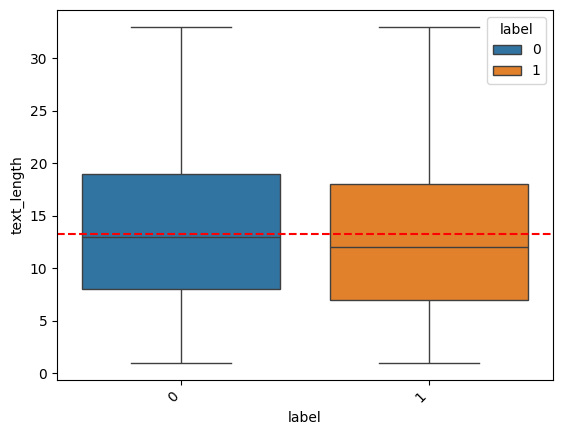

In [10]:
## Summary statistics for text_length
# Calculate multiple statistics
print('Summary Statistics of text_length for positive(1) and negative(0) tweets')
statistics = df_train.groupby('label')['text_length'].agg(['mean', 'median','std', 'min', 'max'])
# Display the result
print(statistics)

print('   ')

print('Plot text_length distribution for positive(1) and negative(0) tweets')
sns.boxplot(data=df_train, x='label', y='text_length',hue = 'label')
#plt.xlim(0, None)
plt.xticks(rotation=45, ha='right')
# Add a horizontal line at the mean of 'reply_length'
mean_reply_length = df_train['text_length'].mean()
plt.axhline(y=mean_reply_length, color='red', linestyle='--', label=f'Mean text Length ({mean_reply_length:.2f})')
# Show the plot
plt.show()

## Data Cleaning
Twitter text requires multiple transformations prior to Preprocessing

In [11]:
! pip install ekphrasis
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons


# Create a TextPreProcessor instance
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
               'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
              'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used for word segmentation
    segmenter="twitter",
    # corpus from which the word statistics are going to be used for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text, with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons],
    #Remove emoticon
    pre_processor=[lambda x: x.replace('＼(^o^)／', '')]
)

# Pre-process the sentence using TextPreProcessor

def extract_clean(text):
    cleaned_text = ' '.join([word.split('<')[0] for word in text])
    return cleaned_text

def extract_emotions(text):
    emoji_expressions = [token for token in text if token in emoticons.values()]
    return emoji_expressions

def clean_string(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    cleaned_text = cleaned_text.strip()
    return cleaned_text

def flatten_emotions(emotion_list):
    # Convert the list of emotions into a string
    emotion_string = ', '.join(emotion_list)
    # Use regular expression to find all words inside angle brackets
    emotions = re.findall(r'<([^>]*)>', emotion_string)
    unique_emotions = list(set(emotions))
    combined_emotions = ', '.join(unique_emotions)
    return combined_emotions


def clean_text(df):
# Pre-process all the sentences in df_train['text']
    df['preprocessed_text'] = [text_processor.pre_process_doc(text) for text in df['text']]
    df['clean_text'] = df['preprocessed_text'].apply(extract_clean).apply(clean_string)

    #Getting Hashtags
    df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
    df['hashtag'] = [' '.join(i) for i in df['hashtag']]

    # Iterate through the preprocessed text
    df['emotions'] = df['preprocessed_text'].apply(extract_emotions)
    df['clean_emotions'] = df['emotions'].apply(flatten_emotions)

    df = df[['text','label','text_length','clean_text','clean_emotions','hashtag']]
    return df

df_train = clean_text(df_train)
df_val = clean_text(df_val)
df_test = clean_text(df_test)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 853.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


## DATA EXPLORATION

#### Hashtags

- 98% of the tweets have no hashtags. Most likely they have been already cleaned.
- Doesn't make sense to keep diving for more insigths.

In [12]:
hashtag_freq = freq_table(df_train,'hashtag')
hashtag_freq = hashtag_freq.sort_values(by='perc',ascending=False)
hashtag_freq['accum'] = hashtag_freq['perc'].cumsum()
print('top 10 hashtags')
display(hashtag_freq[0:10])

top 10 hashtags


,category,count,perc,accum
0,,5853,0.9757,0.9757
1,fb,11,0.0018,0.9775
2,followfriday,8,0.0013,0.9788
3,squarespace,3,0.0005,0.9793
4,FollowFriday,3,0.0005,0.9798
5,haveyouever,3,0.0005,0.9803
6,jonasliveonfb,2,0.0003,0.9806
7,rdg,2,0.0003,0.9809
8,FF,2,0.0003,0.9812
9,ASOT400,2,0.0003,0.9815


#### EMOTIONS

- 98% of the tweets have no emotions. Most likely have been already removed.
- Because they directly express the sentiment of the text, we'll concatenate them to our cleaned tweet corpus.

In [13]:
emotions_freq = freq_table(df_train,'clean_emotions')
emotions_freq = emotions_freq.sort_values(by='perc',ascending=False)
emotions_freq['accum'] = emotions_freq['perc'].cumsum()
print('top 10 emotions')
display(emotions_freq[0:10])

top 10 emotions


,category,count,perc,accum
0,,5891,0.9820,0.9820
1,annoyed,24,0.0040,0.9860
2,wink,23,0.0038,0.9898
3,laugh,20,0.0033,0.9931
4,sad,15,0.0025,0.9956
5,surprise,8,0.0013,0.9969
6,happy,8,0.0013,0.9982
7,tong,7,0.0012,0.9994
8,"happy, sad",1,0.0002,0.9996
9,"wink, kiss",1,0.0002,0.9998


In [14]:
#Concatenate text with emotions
df_train['text_emotion'] = df_train['clean_text']+' '+df_train['clean_emotions']
df_val['text_emotion'] = df_val['clean_text']+' '+df_val['clean_emotions']
df_test['text_emotion'] = df_test['clean_text']+' '+df_test['clean_emotions']


<ipython-input-14-838d5037cb64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text_emotion'] = df_test['clean_text']+' '+df_test['clean_emotions']


### Preprocessor

In [15]:
#Defining preprocessing class to be included in Pipeline later.
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import string
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


## Text mining - Preprocessing, CountVectorizing and tf-idf

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.punctuations = set(string.punctuation)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        preprocessed_texts = []
        for text in X:
            # Convert text to lowercase
            #text = text.lower()
            text = "".join([char.lower() for char in text if char not in string.punctuation])
            # Tokenize text
            tokens = word_tokenize(text)
            # Remove stopwords and apply lemmatization
            filtered_tokens = [self.lemmatizer.lemmatize(word) for word in tokens if word not in self.stop_words]
            # Join tokens back into a string
            preprocessed_text = ' '.join(filtered_tokens)
            preprocessed_texts.append(preprocessed_text)

        return preprocessed_texts


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
sent = ['hello . ! my name is! test .. wuhoo']
pre =TextPreprocessor()
pre.fit(sent)
res = pre.transform(sent)
res

['hello name test wuhoo']

#### Exploring positive and negative words using WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


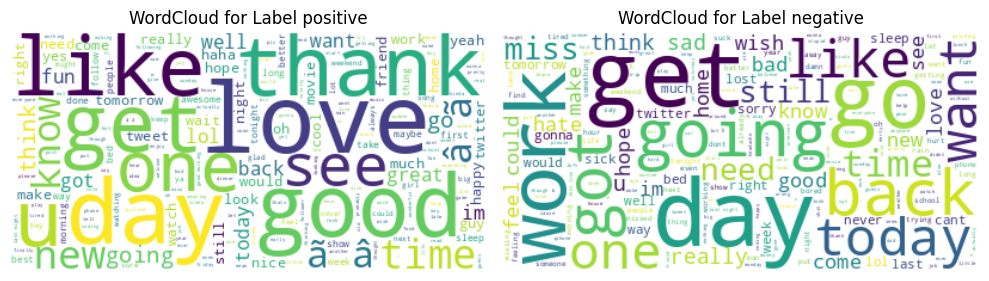

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


labels = {0: 'negative', 1: 'positive'}

# Prepare data for wordclouds
label_data = defaultdict(lambda: '')

for text, label in zip(df_train['clean_text'], df_train['label']):
    label_data[label] += text

# Generate and plot wordclouds for each label
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Create 2x2 subplots
axs = axs.flatten()  # Flatten the axis array

for ax, (label, text) in zip(axs, label_data.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('WordCloud for Label {}'.format(labels.get(label)))
    ax.axis('off')

plt.tight_layout()
plt.show()

## Exploring positive and negative words using TF-IDF + LDA

In [18]:
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train['clean_text'])



Pipeline(steps=[('prepro', TextPreprocessor()),
                ('vect',
                 CountVectorizer(max_df=0.97, min_df=0.005,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1'))])

### TF-IDF Score

In [19]:
def tfidf_term(pipeline,df,sentiment):
# Access the CountVectorizer step from the pipeline
    count_vectorizer = pipeline.named_steps['vect']
    # Fit and transform the data
    tf_idf_pos_matrix = pipeline.transform(df[df['label']==sentiment]['clean_text'])
    # Convert count matrix to DataFrame
    vec_fr_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

    #Creating a dictionary of frequencies for our terms
    feature_names = count_vectorizer.get_feature_names_out()
    # Calculate Term frequency dictionary
    term_tfidf = np.mean(vec_fr_mtx, axis=0)
    #Store in a dictionary
    tfidf_dict = {i: n for i, n in zip(feature_names, term_tfidf)}
    print(len(term_tfidf))
    return feature_names, term_tfidf, tfidf_dict


def transform_to_dataframe(feature_names, score):
    # Create DataFrame with feature names and mean TF-IDF scores
    df = pd.DataFrame({'terms': feature_names, 'score': score})
    # Reset index
    df.reset_index(drop=True, inplace=True)
    return df

# Example usage:
def plot_freq_top(df,top,pos):
    df = df.sort_values(by='score',ascending = False)
    df = df.head(top)
    #We are going to set the

    # Plot the top N terms and their TF-IDF scores
    plt.figure(figsize=(10, 6))
    plt.barh(df['terms'], df['score'], align='center')
    plt.yticks(df['terms'])
    plt.xlabel('Frequency Score')
    plt.title(pos.format(top))
    #plt.xlim(0,0.010)
    plt.gca().invert_yaxis()  # Invert y-axis to display top terms at the top
    plt.show()

260


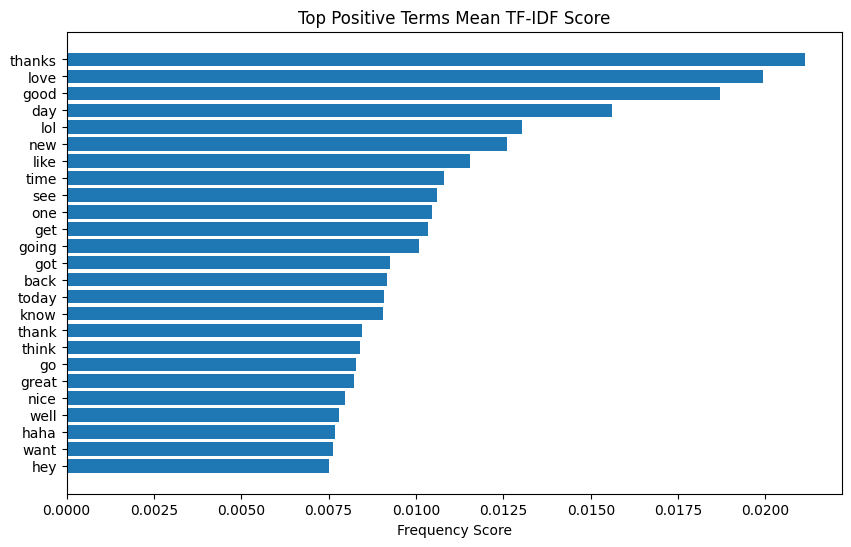

In [20]:
pos = f'Top Positive Terms Mean TF-IDF Score'
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train,1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)
plot_freq_top(pos_tf_idf,25,pos)

260


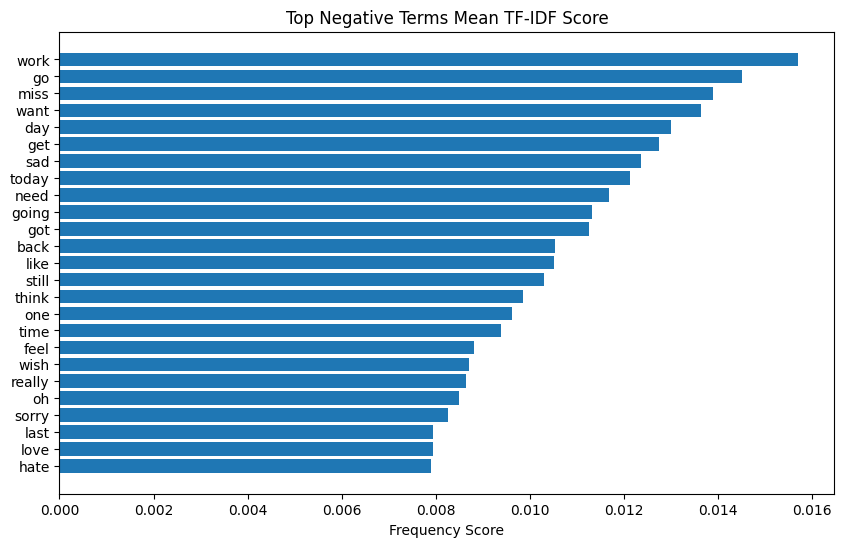

In [21]:
neg = f'Top Negative Terms Mean TF-IDF Score'
## Posive Terms
neg_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train,0)
neg_tf_idf = transform_to_dataframe(neg_feature_names,term_tfidf)
plot_freq_top(neg_tf_idf,25,neg)

### Analyzing Both Positive and Negative Most Common Topics

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
# Specify the number of topics (adjust as needed)
num_topics = 10
# Initialize LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

##Creating matrix
tf_idf_pos_matrix = pipeline.transform(df_train[df_train['label']==1]['clean_text'])
# Convert count matrix to DataFrame
tfidf_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=pos_feature_names)

# Fit the model to your TF-IDF matrix
lda.fit(tfidf_mtx)

LatentDirichletAllocation(random_state=42)

In [23]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


# Print top words for each topic
print_top_words(lda, pos_feature_names, n_top_words=10)

Topic #1: want, work, glad, haha, friend, watch, know, sweet, hi, would
Topic #2: hey, today, go, morning, come, thing, tonight, lot, long, good
Topic #3: nice, night, much, follow, fun, lunch, friday, maybe, making, start
Topic #4: lol, going, see, time, back, think, get, awesome, keep, might
Topic #5: happy, song, amazing, pretty, birthday, ok, getting, food, phone, waiting
Topic #6: got, twitter, look, one, big, always, first, never, everyone, ur
Topic #7: new, thank, day, yes, watching, wait, love, video, dinner, hour
Topic #8: thanks, great, yay, like, show, sunday, following, ah, house, best
Topic #9: good, oh, tweet, cool, movie, weekend, picture, home, people, made
Topic #10: love, yeah, hope, well, girl, done, please, luck, omg, dont


In [24]:
def get_top_words(model, feature_names, n_top_words):
    top_words_per_topic = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_words_per_topic.append(top_words)
    return top_words_per_topic

# Get top words for each topic
top_words_per_topic = get_top_words(lda, pos_feature_names, n_top_words=10)
# Extract words from list of lists
top_pos_words = [word for sublist in top_words_per_topic for word in sublist]

# Remove duplicates using set()
unique_pos = set(top_pos_words)

In [25]:
# Specify the number of topics (adjust as needed)
num_topics = 10
# Initialize LDA model
lda2 = LatentDirichletAllocation(n_components=num_topics, random_state=42)

##Creating matrix
tf_idf_neg_matrix = pipeline.transform(df_train[df_train['label']==0]['clean_text'])
# Convert count matrix to DataFrame
tfidf_mtx = pd.DataFrame(data=tf_idf_neg_matrix.toarray(), columns=neg_feature_names)

# Fit the model to your TF-IDF matrix
lda2.fit(tfidf_mtx)

LatentDirichletAllocation(random_state=42)

In [26]:
# Print top words for each topic
print_top_words(lda2, neg_feature_names, n_top_words=10)

Topic #1: want, miss, work, oh, know, ugh, boo, game, picture, trying
Topic #2: hurt, today, na, tonight, feeling, way, summer, use, gon, yet
Topic #3: need, come, lol, missing, take, bored, tired, day, since, car
Topic #4: think, going, im, bad, back, get, year, really, nothing, guess
Topic #5: last, sleep, night, never, phone, bed, getting, rain, house, went
Topic #6: got, one, twitter, sick, yeah, people, monday, someone, soon, aww
Topic #7: still, go, hate, sorry, home, suck, working, say, please, hour
Topic #8: feel, like, good, time, though, morning, help, right, dont, find
Topic #9: wish, would, damn, could, aw, away, new, without, wanted, hair
Topic #10: sad, love, school, lost, already, next, thought, ever, well, everyone


In [27]:
# Get top words for each topic
topneg_words_per_topic = get_top_words(lda2, pos_feature_names, n_top_words=10)
# Extract words from list of lists
top_neg_words = [word for sublist in topneg_words_per_topic for word in sublist]

# Remove duplicates using set()
unique_neg = set(top_neg_words)

## Random Classifier Performance

Random Classifier Performance (0.25 points): Calculate the expected performance of a random classifier for your dataset to set a benchmark. The calculation should include an implementation.

**pending**: include preprocessing in the pipeline to properly treat tweets.

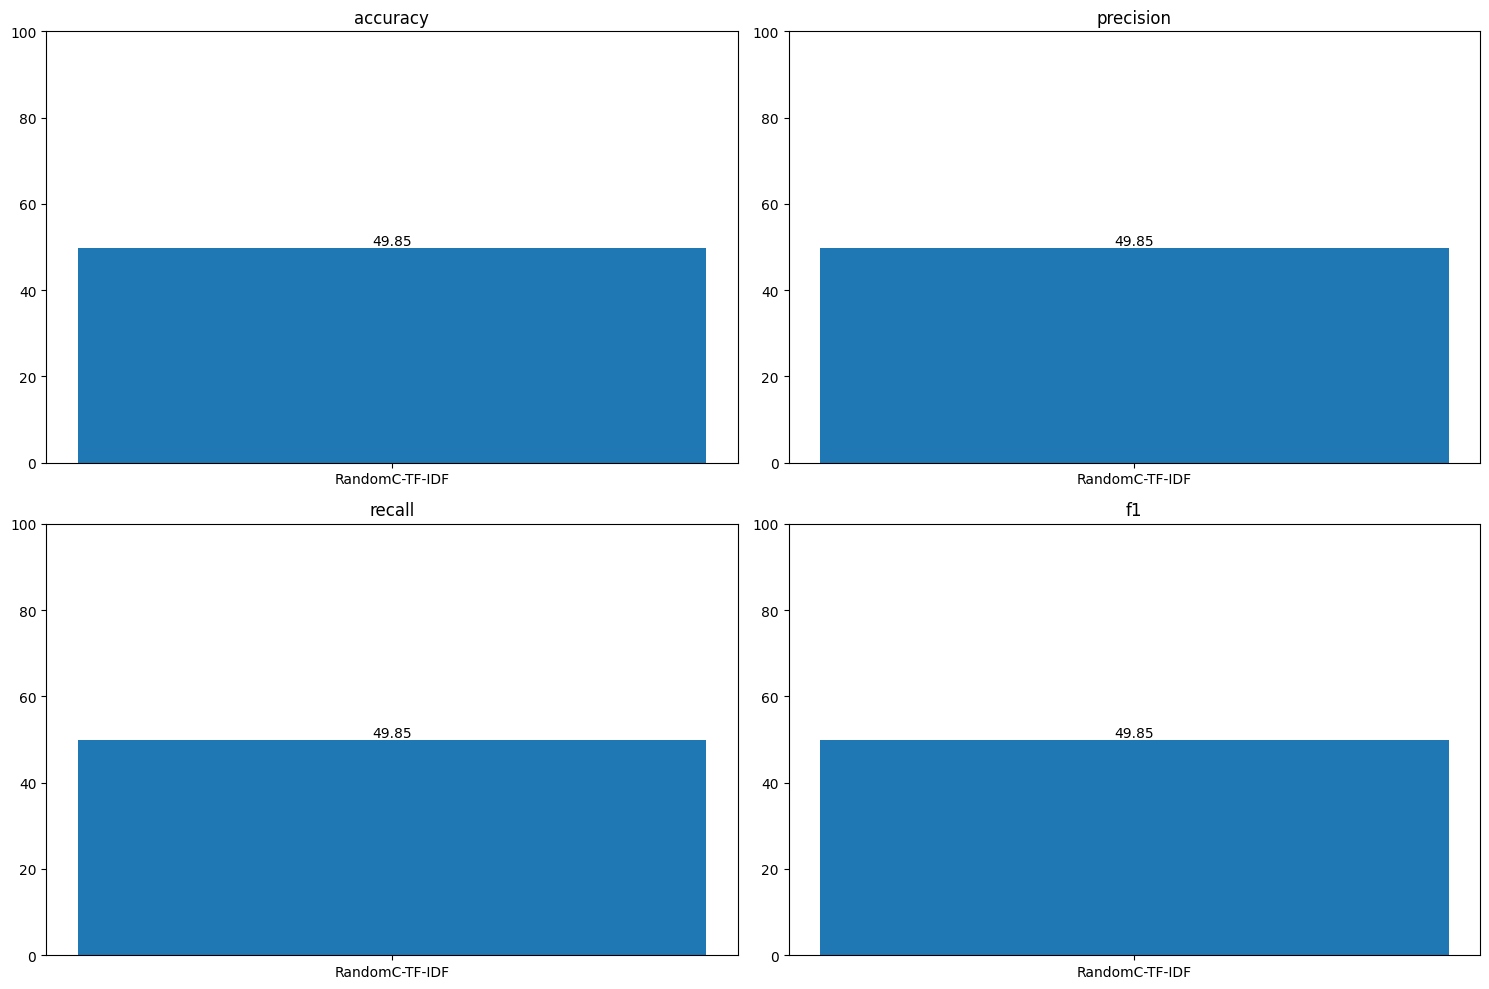

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the classifier to the training data
pipeline.fit(df_train['clean_text'])
##Creating matrix
tf_idf_matrix = pipeline.transform(df_train['clean_text'])
val_idf_matrix = pipeline.transform(df_test['clean_text']) #Changed validation for test
# Convert count matrix to DataFrame
tfidf_mtx = pd.DataFrame(data=tf_idf_matrix.toarray(), columns=pipeline.named_steps['vect'].get_feature_names_out())
val_mtx = pd.DataFrame(data=val_idf_matrix.toarray(), columns=pipeline.named_steps['vect'].get_feature_names_out())

##Innitializing RandomClassifier
dummy_classifier = DummyClassifier(strategy='uniform')
# Fit the classifier to the training data
dummy_classifier.fit(tfidf_mtx, df_train['label'])

# Make predictions on the testing data
y_pred = dummy_classifier.predict(val_mtx)

# Calculate accuracy (or any other metric)
metrics_val= Metrics()
metrics_val.run(test_labels, y_pred, "RandomC-TF-IDF")
metrics_val.plot()


## Baseline Implementation

Baseline Implementation (0.5 points): Develop a rule-based classifier as a baseline. Discuss its performance in the context of the dataset's complexity and compare it with human-level performance if available.

### Rule-Based using Spacy Matcher

In [29]:
## Call positive words from Positive LDA
print(unique_pos)

{'sunday', 'glad', 'know', 'sweet', 'best', 'today', 'oh', 'look', 'yay', 'done', 'song', 'movie', 'yeah', 'watching', 'night', 'luck', 'please', 'like', 'first', 'ur', 'awesome', 'dont', 'house', 'nice', 'people', 'hope', 'phone', 'cool', 'omg', 'great', 'thanks', 'amazing', 'wait', 'going', 'would', 'home', 'friend', 'girl', 'go', 'keep', 'picture', 'long', 'fun', 'lunch', 'lol', 'weekend', 'hour', 'ok', 'hi', 'haha', 'day', 'work', 'got', 'twitter', 'dinner', 'follow', 'come', 'one', 'much', 'waiting', 'might', 'food', 'never', 'happy', 'hey', 'watch', 'lot', 'yes', 'ah', 'tweet', 'want', 'think', 'show', 'morning', 'always', 'well', 'maybe', 'friday', 'new', 'thing', 'time', 'good', 'big', 'made', 'see', 'get', 'start', 'pretty', 'everyone', 'video', 'making', 'love', 'tonight', 'following', 'birthday', 'thank', 'back', 'getting'}


In [30]:
## Get all the most relevant positive terms
positives = ['cute','aw','best','happy','haha',
             'amazing','fun','great','yay','love',
             'lol','excited','awesome','wow','nice','beautiful',
             'cool','glad','good']

print(positives)

['cute', 'aw', 'best', 'happy', 'haha', 'amazing', 'fun', 'great', 'yay', 'love', 'lol', 'excited', 'awesome', 'wow', 'nice', 'beautiful', 'cool', 'glad', 'good']


In [31]:
## Call negative words from Negative LDA
print(unique_neg)

{'know', 'bored', 'oh', 'today', 'monday', 'sick', 'suck', 'aw', 'yeah', 'ever', 'really', 'help', 'night', 'could', 'tired', 'please', 'like', 'without', 'sorry', 'dont', 'right', 'find', 'house', 'na', 'people', 'car', 'phone', 'sad', 'though', 'ugh', 'away', 'going', 'would', 'home', 'picture', 'take', 'go', 'went', 'missing', 'feel', 'lol', 'nothing', 'way', 'boo', 'already', 'hour', 'yet', 'use', 'sleep', 'day', 'work', 'bad', 'gon', 'game', 'miss', 'got', 'twitter', 'rain', 'come', 'one', 'bed', 'school', 'year', 'never', 'since', 'soon', 'feeling', 'someone', 'want', 'think', 'hurt', 'say', 'last', 'morning', 'hair', 'well', 'new', 'time', 'working', 'good', 'wish', 'need', 'trying', 'aww', 'wanted', 'lost', 'hate', 'get', 'im', 'guess', 'thought', 'everyone', 'still', 'love', 'damn', 'tonight', 'summer', 'next', 'back', 'getting'}


In [32]:
## Get all the most relevant negative terms
negatives = ['sick','hurt','tired','hate','bad',
             'damn','never','miss','suck','sorry',
             'ugh','sad','lost', 'bored']

print(negatives)

['sick', 'hurt', 'tired', 'hate', 'bad', 'damn', 'never', 'miss', 'suck', 'sorry', 'ugh', 'sad', 'lost', 'bored']


### Implement rule-based conditions for our baseline model

In [33]:
import spacy
from spacy.matcher import Matcher

#loading and initializing nlp object
nlp = spacy.load('en_core_web_sm')
## Initializing Matcher
matcher = Matcher(nlp.vocab)

In [34]:
## Initializing Matcher
matcher = Matcher(nlp.vocab)

# based on word cloud
positive_patterns = [
    [{'LOWER': 'cute'}],
    [{'LOWER': 'aw'}],
    [{'LOWER': 'best'}],
    [{'LOWER': 'happy'}],
    [{'LOWER': 'haha'}],
    [{'LOWER': 'amazing'}],
    [{'LOWER': 'fun'}],
    [{'LOWER': 'great'}],
    [{'LOWER': 'yay'}],
    [{'LOWER': 'love'}],
    [{'LOWER': 'lol'}],
    [{'LOWER': 'excited'}],
    [{'LOWER': 'awesome'}],
    [{'LOWER': 'wow'}],
    [{'LOWER': 'nice'}],
    [{'LOWER': 'beautiful'}],
    [{'LOWER': 'cool'}],
    [{'LOWER': 'glad'}],
    [{'LOWER': 'good'}]
]


# based on word cloud
negative_patterns = [
    [{'LOWER': 'sick'}],
    [{'LOWER': 'hurt'}],
    [{'LOWER': 'tired'}],
    [{'LOWER': 'hate'}],
    [{'LOWER': 'bad'}],
    [{'LOWER': 'damn'}],
    [{'LOWER': 'never'}],
    [{'LOWER': 'miss'}],
    [{'LOWER': 'suck'}],
    [{'LOWER': 'sorry'}],
    [{'LOWER': 'ugh'}],
    [{'LOWER': 'sad'}],
    [{'LOWER': 'lost'}],
    [{'LOWER': 'bored'}]
]


## Adding patterns to matcher
matcher.add('positives',positive_patterns)
matcher.add('negatives',negative_patterns)


In [35]:
#Matching elements in documents
## Matching VALIDATION
docs_v = [nlp(doc) for doc in df_test['clean_text']]
matches_v = [matcher(d) for d in docs_v]

In [36]:
def matching_func(d,ms):
    #Return the index and the total number of matches per row
    rows_data = []
    for (i, match),doc in zip(enumerate(ms),d):
        #variables for defining current row/index
        row = 0
        row=i
        # positive variables
        positives = 0
        pos_w = []
        # negative variables
        negatives = 0
        neg_w = []

        diction = {'index':0,'total':0, 'positive':0 ,'negative':0,'pos_words':[],'neg_words':[]}
        # Filling dictionary
        diction['index'] = row
        diction['total'] = len(match)

        for match_id, start, end in match:
            if nlp.vocab.strings[match_id] == "positives":
                # store positive matched words
                pos_words = doc[start:end].text
                pos_w.append(pos_words)
                #diction['pos_words'] = pos_w
                # store number of positive words
                positives = len(pos_w)
                diction['positive'] = positives
            elif nlp.vocab.strings[match_id] == "negatives":
                # store negative matched words
                neg_words = doc[start:end].text
                neg_w.append(neg_words)
                #diction['neg_words'] = neg_w
                # store number of negative words
                negatives = len(neg_w)
                diction['negative'] = negatives

        #Add words matched to dictionary
        diction['pos_words'] = pos_w
        #diction['positive'] = positives
        diction['neg_words'] = neg_w
        #diction['negative'] = negatives

        diction = {k: np.nan if (not v and v != 0) else v for k, v in diction.items()}

        rows_data.append(diction)

    df = pd.DataFrame(rows_data)
    return df
        #print(diction['index'],' ',diction['total'],' ',diction['pos_words'],' ',diction['positive'],' ',diction['neg_words'],' ',diction['negative'])

In [37]:

va_df = matching_func(docs_v,matches_v)
va_df

,index,total,positive,negative,pos_words,neg_words
0,0,0,0,0,NaN,NaN
1,1,0,0,0,NaN,NaN
2,2,0,0,0,NaN,NaN
3,3,0,0,0,NaN,NaN
4,4,0,0,0,NaN,NaN
...,...,...,...,...,...,...
3094,3094,0,0,0,NaN,NaN
3095,3095,1,1,0,[cool],NaN
3096,3096,0,0,0,NaN,NaN
3097,3097,0,0,0,NaN,NaN


In [38]:
# Create a new column 'proba' where 1 is returned if positives are greater than negatives, else 0
threshold = 0.5

va_df['proba'] = np.where(va_df['total'] != 0, (va_df['positive'] / va_df['total']) > threshold, 0)
va_df

,index,total,positive,negative,pos_words,neg_words,proba
0,0,0,0,0,NaN,NaN,0
1,1,0,0,0,NaN,NaN,0
2,2,0,0,0,NaN,NaN,0
3,3,0,0,0,NaN,NaN,0
4,4,0,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...
3094,3094,0,0,0,NaN,NaN,0
3095,3095,1,1,0,[cool],NaN,1
3096,3096,0,0,0,NaN,NaN,0
3097,3097,0,0,0,NaN,NaN,0


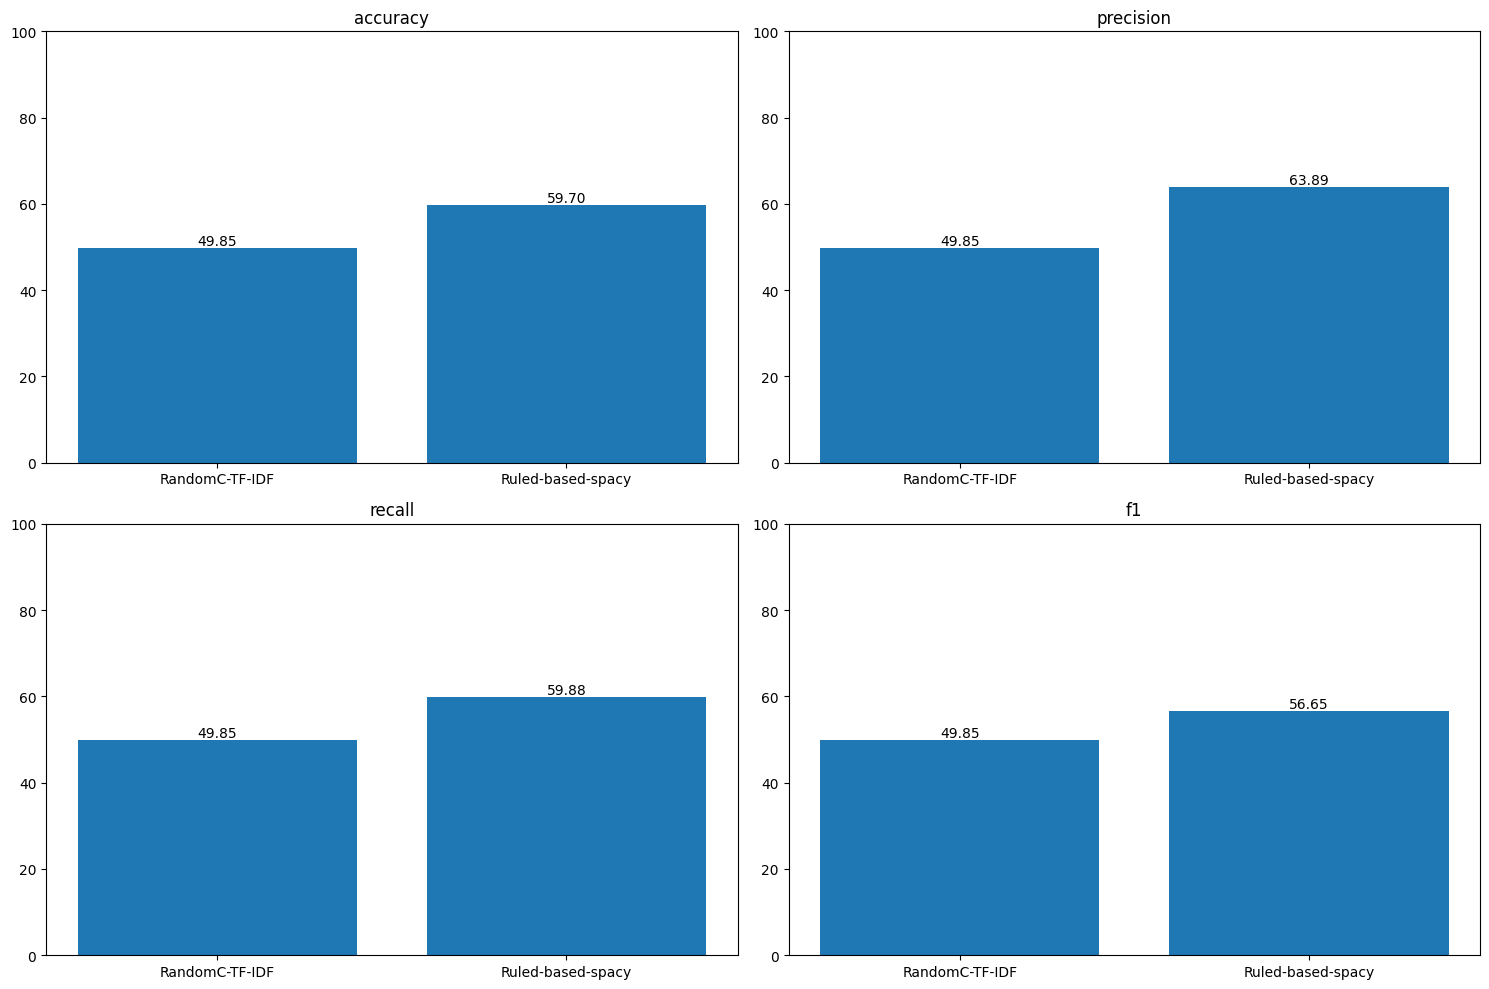

In [39]:
## Comparing with real

metrics_val.run(test_labels, va_df['proba'], "Ruled-based-spacy")
metrics_val.plot()

### Error Analysis

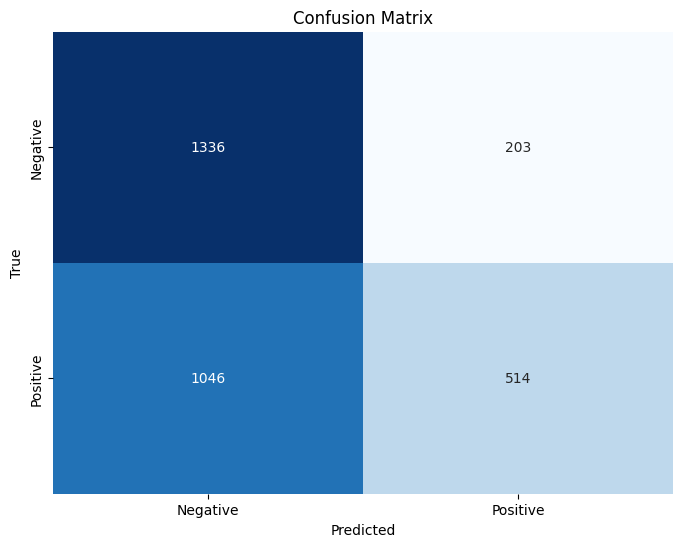

In [40]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(test_labels, va_df['proba'])

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [41]:
df_val2 = df_test.copy()

#Create an index column to join with our prediction results
df_val2 = df_val2.reset_index()

## Merge with new data
merged_data = df_val2.merge(va_df[['index','proba']],how='left',left_on='index',right_on='index',suffixes=['_tr','_df'])
merged_data.head()

,index,text,label,text_length,clean_text,clean_emotions,hashtag,text_emotion,proba
0,0,Can someone tell me how to change Canvas Size ...,1,14,can someone tell me how to change canvas size ...,,,can someone tell me how to change canvas size ...,0
1,1,Is up WAY too late again.,0,6,is up way too late again .,,,is up way too late again .,0
2,2,final exam... i wish i could skip it,0,8,final exam . i wish i could skip it,,,final exam . i wish i could skip it,0
3,3,@baldeggie its working fine for me. *after 2 b...,0,11,its working fine for me . * after battery pulls *,,,its working fine for me . * after battery pull...,0
4,4,@LBsoundsystem Me too! The job market sucks ri...,0,9,me too ! the job market sucks right now,,,me too ! the job market sucks right now,0


In [42]:
## Printing False Negatives
print('MISSCLASSIFIED TWEETS EXPLORATION')
for i in merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['clean_text'][0:25]:
    print(i)

MISSCLASSIFIED TWEETS EXPLORATION
can someone tell me how to change canvas size in adobe photoshop cs4 ?
patiently awaiting my visitor at work .
hey thank you , i still pop in every now and again - how is the jewellery going
angryalien . com beats it anytime .
super fab weekend !
can not sleep . watching panic room on tnt . so young to be sharing the screen with jodie foster .
ã  â ® ã  ë  ã  â ¯ ã  â  ¦ ã  ë  ã  â²ã  å  ã  â § ã  â ¯ ã  â § ã  â ° ã  å  ã  âª ã  â  ã  â © ã  â ± ã  â ¯ ã  â  ¦ . ã  â ® ã  å  ã  â   ã  å  ã  â³ã  â § ã  â ¯ ã  â  ¡ ã  â ¨ ã  â  ¡ ã  â § ã  â³ã  âªã  â § ã  â ¯ ã  â ¯ ã  ? ã  âªã  â  ¦ ã  â  ã  â  ¡ ã  âºã  â   ã  â · ã  å  ã  â ¨ ã  â © ã  â  ã  â  ¦ ã  â ¢ ã  â ® ã  â ± ã  âªã  â ± ã  â  ¦ ã  å  ã  å ¸ : ã  â ¯ ã  å  history of mathematics
think imma go to the bank later this week . ri . dic . u . lous . off to the gym
oops . almost spilled my iced tea .
why thank you . t

#### How can we reduce the amount of false negatives?

Twitter data presents certain challenges:

- Frequently, we encounter questions that lack clear sentiment expression.
- Sometimes, the count of positive and negative instances is equal, leading to classification as negatives based on our threshold.
- Given the intricate variety of positive patterns, we won't be able to cover all possibilities, therefore increasing the number of false negatives.
- Positive and negative sarcasm further complicates accurate classification, as seen in examples like: "I live in a basement. That's why I am so mysterious."


Proposal to reduce False negatives  

To address the issue of false negatives, we suggest a strategy suited to the complexity of tweets, characterized by informal language. Our plan involves conducting regular error analyses and augmenting our matcher patterns with new positive patterns. This iterative approach aims to develop a robust classifier capable of capturing all positive patterns accurately over time. However, we must also devise methods to handle neutral tweets and positive/negative sarcasm.

- Our initial step entails identifying missing positive patterns within misclassified tweets and incorporating them into our matcher.





260


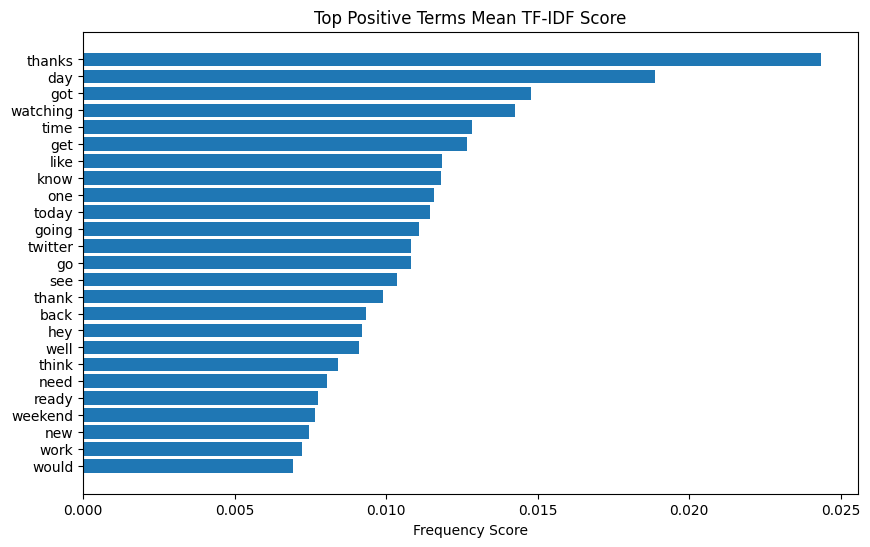

In [43]:
## Plot TFIDF identify missing positive patterns
pos = f'Top Positive Terms Mean TF-IDF Score'
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)],1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)
plot_freq_top(pos_tf_idf,25,pos)

In [44]:
#Identifying positive patterns:

positives2 = ['thanks','new','like','thank','well']

print(positives2)

['thanks', 'new', 'like', 'thank', 'well']


In [45]:
## Adding new patterns to matcher
# based on word cloud
positive_patterns2 = [
    [{'LOWER': 'thanks'}],
    [{'LOWER': 'new'}],
    [{'LOWER': 'like'}],
    [{'LOWER': 'thank'}],
    [{'LOWER': 'well'}]
]

## Adding patterns to matcher
matcher.add('positives',positive_patterns2)

In [46]:
#Matching elements in documents
## Matching VALIDATION
docs_v2 = [nlp(doc) for doc in merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['clean_text']]
matches_v2 = [matcher(d) for d in docs_v2]

In [47]:
va_df2 = matching_func(docs_v2,matches_v2)
va_df2

,index,total,positive,negative,pos_words,neg_words
0,0,0,0,0,NaN,NaN
1,1,0,0,0,NaN,NaN
2,2,1,1,0,[thank],NaN
3,3,0,0,0,NaN,NaN
4,4,0,0,0,NaN,NaN
...,...,...,...,...,...,...
1041,1041,0,0,0,NaN,NaN
1042,1042,0,0,0,NaN,NaN
1043,1043,0,0,0,NaN,NaN
1044,1044,0,0,0,NaN,NaN


In [48]:
va_df2['proba'] = np.where(va_df2['total'] != 0, (va_df2['positive'] / va_df2['total']) > threshold, 0)
va_df2

,index,total,positive,negative,pos_words,neg_words,proba
0,0,0,0,0,NaN,NaN,0
1,1,0,0,0,NaN,NaN,0
2,2,1,1,0,[thank],NaN,1
3,3,0,0,0,NaN,NaN,0
4,4,0,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...
1041,1041,0,0,0,NaN,NaN,0
1042,1042,0,0,0,NaN,NaN,0
1043,1043,0,0,0,NaN,NaN,0
1044,1044,0,0,0,NaN,NaN,0


In [49]:
## Checking That lens for both results match
print(len(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['proba']) == len(va_df2['proba']))
print(len(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['proba']))
print(len(va_df2['proba']))


True
1046
1046


In [50]:
#check if missing values
print(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['proba'].isna().mean())
print(va_df2['proba'].isna().mean())


0.0
0.0


In [51]:
# Different indexes
print(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)].index)
print(va_df2.index)

Int64Index([   0,    6,    9,   12,   14,   15,   16,   17,   19,   21,
            ...
            3071, 3073, 3076, 3083, 3088, 3089, 3090, 3093, 3096, 3097],
           dtype='int64', length=1046)
RangeIndex(start=0, stop=1046, step=1)


In [52]:
# Make copies of the dataframes
merged_data_copy = merged_data.copy()
va_df2_copy = va_df2.copy()

# Find the subset indices in the copied dataframe


df_merge = pd.DataFrame({'index':merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)].index,
                         'proba1':(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['proba']).tolist(),
                         'proba2':va_df2['proba'].tolist()
                         })

df_merge['proba3'] = np.where(df_merge['proba1'] != df_merge['proba2'], df_merge['proba2'], df_merge['proba1'])
df_merge.set_index('index', inplace=True)
df_merge


,proba1,proba2,proba3
index,,,
0,0,0,0
6,0,0,0
9,0,1,1
12,0,0,0
14,0,0,0
...,...,...,...
3089,0,0,0
3090,0,0,0
3093,0,0,0


In [53]:
#Now that we made sure that indexes will match, replace in merged data:
for index, value in zip(merged_data_copy[(merged_data_copy['label'] == 1) & (merged_data_copy['proba'] == 0)].index, df_merge['proba3']):
    merged_data_copy.loc[index, 'proba'] = value

---

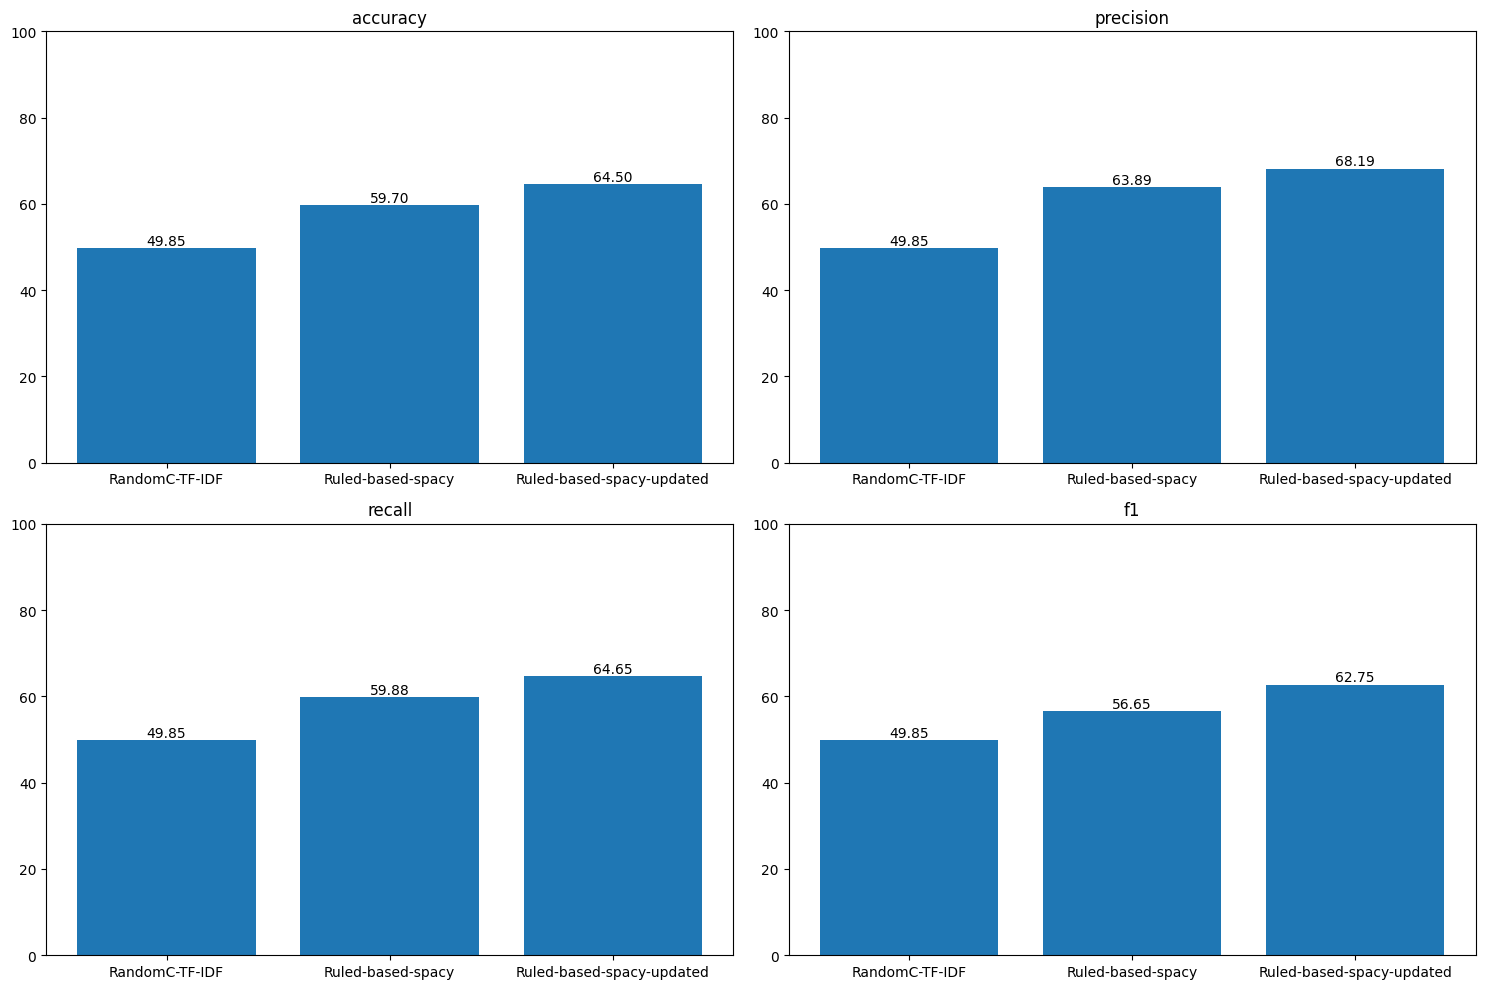

In [54]:
metrics_val.run(test_labels, merged_data_copy['proba'], "Ruled-based-spacy-updated")
metrics_val.plot()

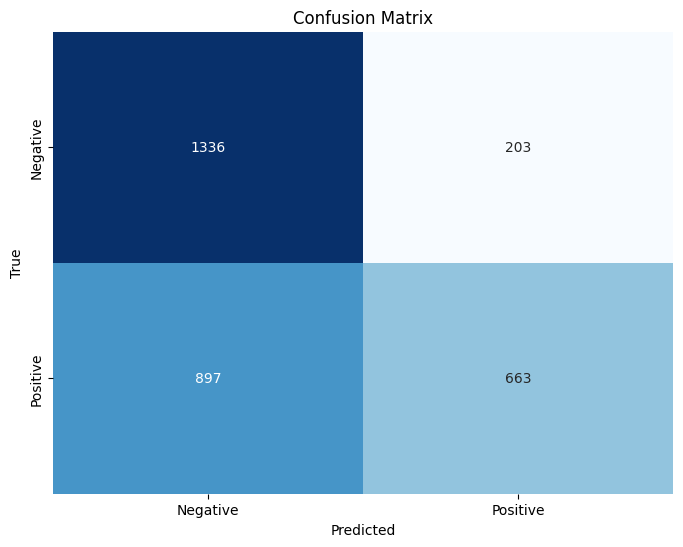

In [55]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels,  merged_data_copy['proba'])

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [56]:
## Reduction of False Negatives
((17495 / 20656) -1) * 100

-15.303059643687067

#### We managed to reduce the number of false negatives by 15% after incorporating the new batch of positive patterns learned from the error analysis

### Rule-Based Benchmark with Vader

In [57]:
# Initialize the SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

# Apply lambda function to get compound scores.
function = lambda title: vader.polarity_scores(title)['compound']

# Calculate compound score and get tweet length
df_test['sentiment'] = df_test['clean_text'].apply(function)
df_test['clean_length'] = [len(i.split()) for i in df_test['clean_text']]

test = df_test[['clean_text','clean_length','sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [58]:
#Adding Sentiment Label
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

df_test['sentiment_label'] = df_test['sentiment'].apply(getAnalysis)

#Scaling score to the length of the review
df_test.head(5)

,text,label,text_length,clean_text,clean_emotions,hashtag,text_emotion,sentiment,clean_length,sentiment_label
0,Can someone tell me how to change Canvas Size ...,1,14,can someone tell me how to change canvas size ...,,,can someone tell me how to change canvas size ...,0.0000,14,Neutral
1,Is up WAY too late again.,0,6,is up way too late again .,,,is up way too late again .,0.0000,7,Neutral
2,final exam... i wish i could skip it,0,8,final exam . i wish i could skip it,,,final exam . i wish i could skip it,0.4019,9,Positive
3,@baldeggie its working fine for me. *after 2 b...,0,11,its working fine for me . * after battery pulls *,,,its working fine for me . * after battery pull...,0.2023,11,Positive
4,@LBsoundsystem Me too! The job market sucks ri...,0,9,me too ! the job market sucks right now,,,me too ! the job market sucks right now,-0.4199,9,Negative


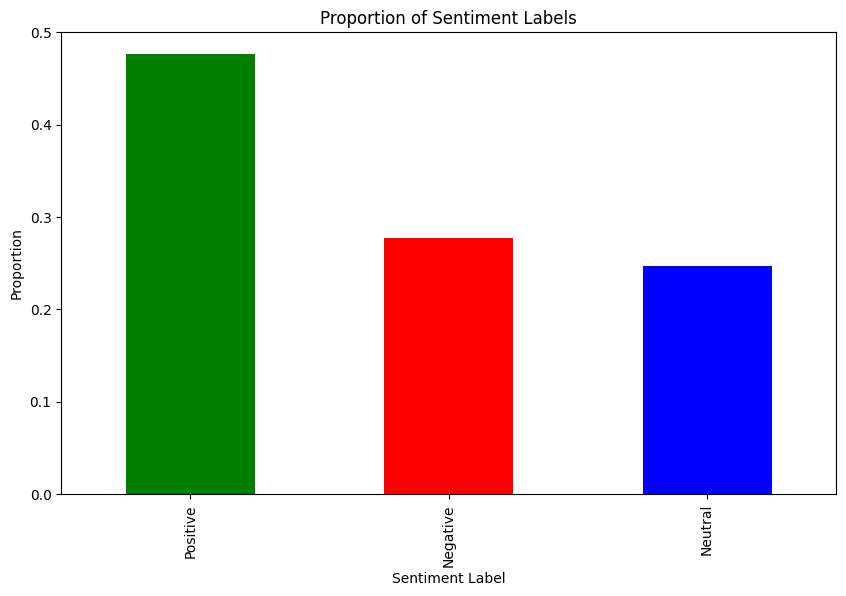

In [59]:
import matplotlib.pyplot as plt

# Get counts of each category in 'sentiment_label'
sentiment_counts = df_test['sentiment_label'].value_counts()

# Calculate proportion of each category
total_samples = len(df_test)
sentiment_proportions = sentiment_counts / total_samples

# Define colors for each sentiment
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Plot bar chart with colors
sentiment_proportions.plot(kind='bar', figsize=(10, 6), color=[colors[label] for label in sentiment_proportions.index])

# Set labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Proportion')
plt.title('Proportion of Sentiment Labels')

# Show plot
plt.show()


## Looking at WordCloud for inspection of Neutral Words

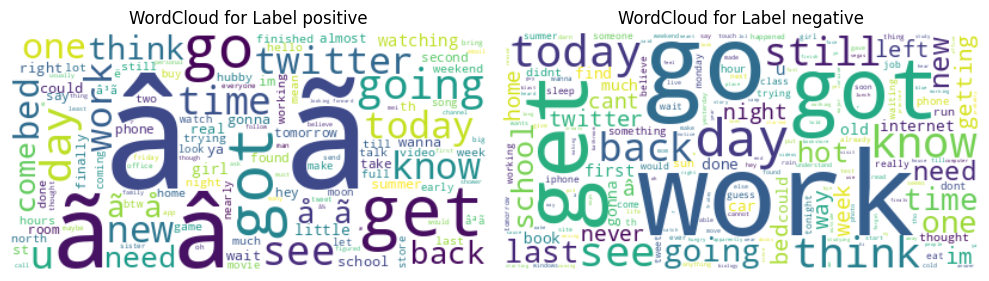

In [60]:
## Looking at a WordCloud to inspect the words in neutral

labels = {0: 'negative', 1: 'positive'}

# Prepare data for wordclouds
label_data = defaultdict(lambda: '')

for text, label in zip(df_test[df_test['sentiment_label']=='Neutral']['clean_text'], df_test[df_test['sentiment_label']=='Neutral']['label']):
    label_data[label] += text

# Generate and plot wordclouds for each label
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Create 2x2 subplots
axs = axs.flatten()  # Flatten the axis array

for ax, (label, text) in zip(axs, label_data.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('WordCloud for Label {}'.format(labels.get(label)))
    ax.axis('off')

plt.tight_layout()
plt.show()

### Classifying Neutral tweets

In [61]:
#Clasifying neutral
# Iterate over rows of DataFrame where 'sentiment_label' is 'Neutral'
for index, row in df_test[df_test['sentiment_label'] == 'Neutral'].iterrows():
    # Analyze sentiment of the text
    score = vader.polarity_scores(row['clean_text'])
    if score['compound'] == 0:  # Positive sentiment
        df_test.at[index, 'sentiment_label'] = 'Negative' ##Any tweet that has no good emotion will be treated as negative
    else:  # Neutral sentiment
        df_test.at[index, 'sentiment_label'] = 'Positive'


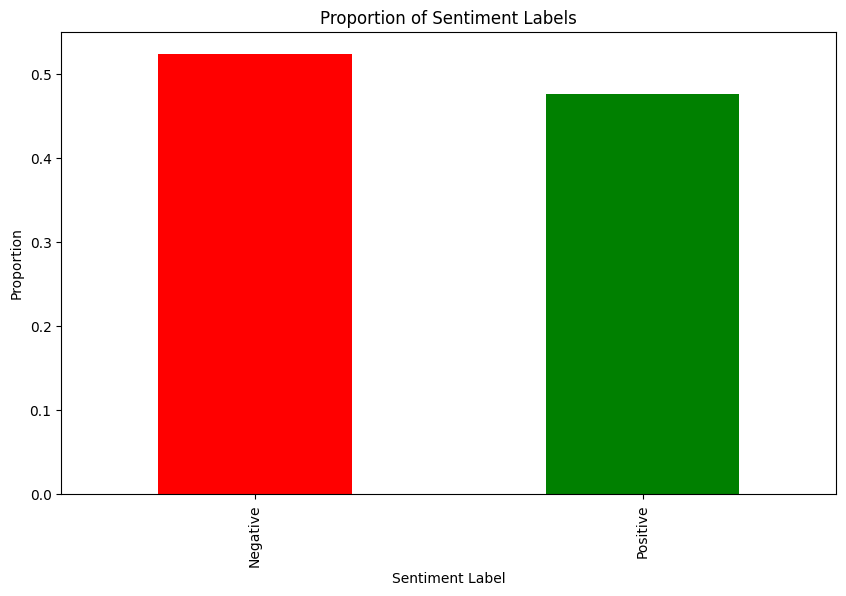

In [62]:
# Get counts of each category in 'sentiment_label'
sentiment_counts = df_test['sentiment_label'].value_counts()

# Calculate proportion of each category
total_samples = len(df_test)
sentiment_proportions = sentiment_counts / total_samples

# Define colors for each sentiment
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Plot bar chart with colors
sentiment_proportions.plot(kind='bar', figsize=(10, 6), color=[colors[label] for label in sentiment_proportions.index])

# Set labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Proportion')
plt.title('Proportion of Sentiment Labels')

# Show plot
plt.show()

### Rule-Based Model Performance

In [63]:
#Convert to binary
df_test['sentiment_label'] = [1 if x == 'Positive' else 0 for x in df_test['sentiment_label']]
y_pred = df_test['sentiment_label']
original_labels = df_test['label']

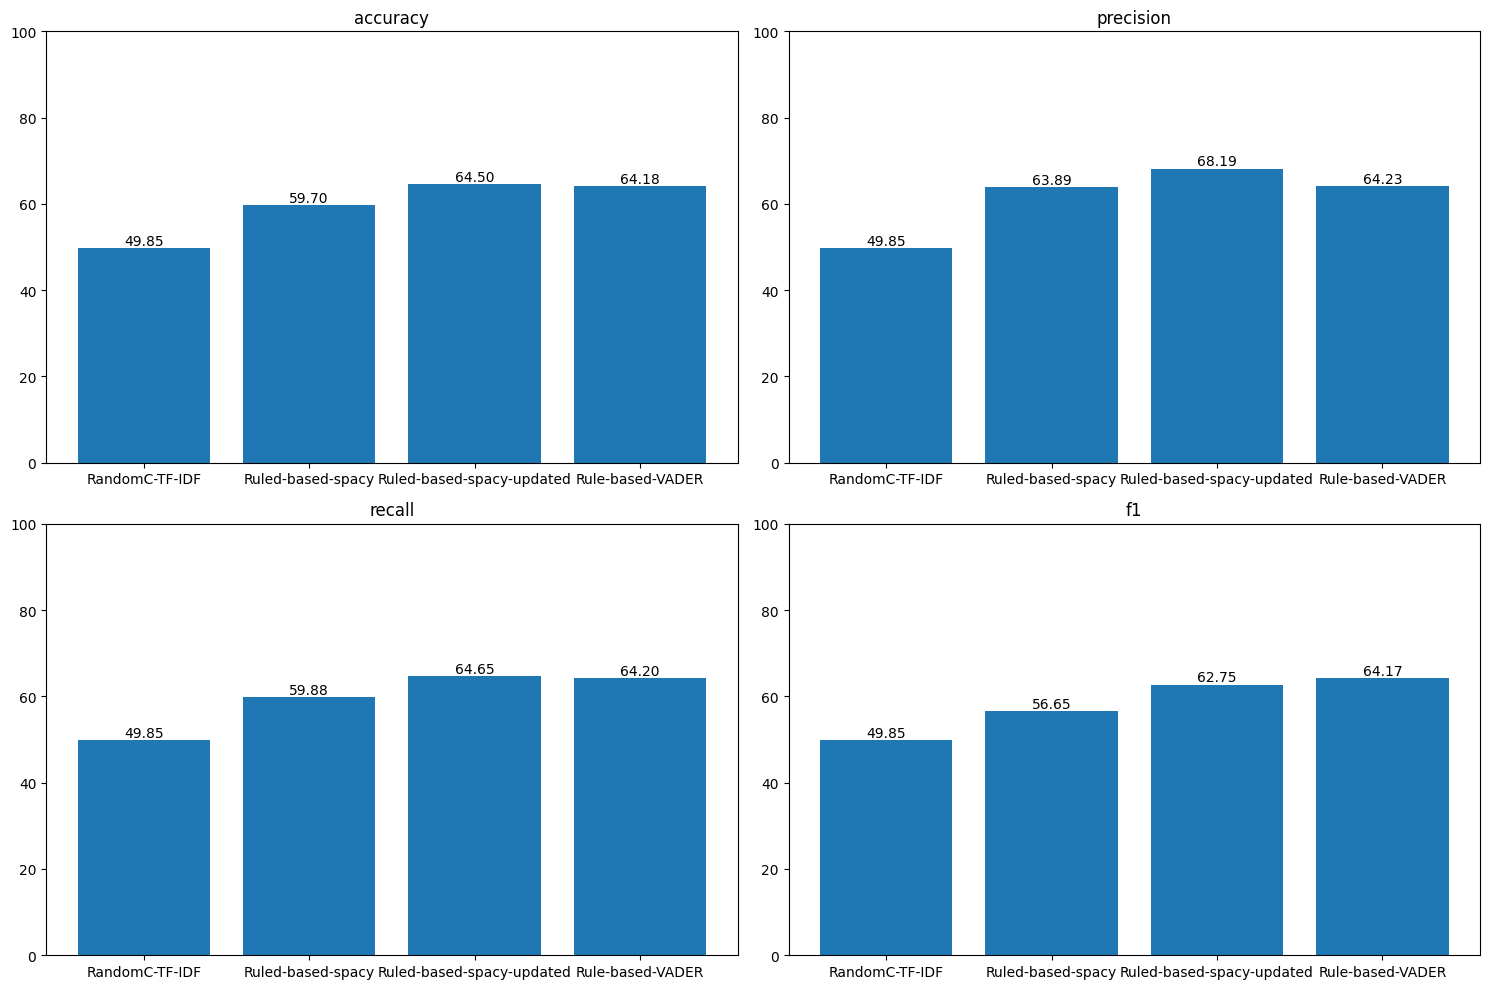

In [64]:
## Model Performance

metrics_val.run(original_labels, y_pred, "Rule-based-VADER")
metrics_val.plot()

---

# BERT Model with Limited Data (0.5 points)

#### Train a BERT-based model using only 32 labeled examples and assess its performance.

In the following exercises we will work with clean text.

In [65]:
train_data_clean = df_train['clean_text']
validation_data_clean = df_val['clean_text']
test_data_clean = df_test['clean_text']

In [66]:
# Set the seed for reproducibility
np.random.seed(42)

# First, we'll select 32 random rows from the DataFrame using the sample method.
df_train_32 = df_train.sample(n=32)

In [67]:
train_data_32 = df_train_32['clean_text']
train_labels_32 = df_train_32['label']

### BERT SETUP

In [68]:
checkpoint="cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModel.from_pretrained(checkpoint)

batch_size=8 # impossible to have bigger batch as far as we have just 32 observations in the train
max_length=40 # fine for the length of the sentences in our dataset - changed it according to the distribution
rate = 0.5 # dropout parameters - tried different options, 0.5 still performs better
num_labels = len(np.unique(validation_labels))

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/499M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaModel.

All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [69]:
## Input
input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')

# Embedding layers
embedding_layer = model(input_ids=input_ids_in, attention_mask=input_masks_in)
# we need only the first token representation nothing else from the last layer
final_embedding_layer = embedding_layer[0] #last layer of BERT
# Extract only the [CLS] token's embeddings
cls_token_embeddings = final_embedding_layer[:, 0, :]
# First dimension is the number of rows
# Second dimension is the number of tokens (in our case 64)
# The last dimension is the embedding size, in this case 768

# Let's add some dropout to reduce overfitting
output_layer = tf.keras.layers.Dropout(rate, name='do_layer')(cls_token_embeddings)

# One dense layer to process the last layer
output = tf.keras.layers.Dense(num_labels,
                               kernel_initializer="glorot_uniform",
                               activation='softmax')(output_layer)


bert_model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = output)

bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 40)]                 0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 40)]                 0         []                            
                                                                                                  
 tf_roberta_model (TFRobert  TFBaseModelOutputWithPooli   1246456   ['input_token[0][0]',         
 aModel)                     ngAndCrossAttentions(last_   32         'masked_token[0][0]']        
                             hidden_state=(None, 40, 76                                           
                             8),                                                              

In [70]:
def get_batches(X_train, y_train, tokenizer, batch_size, max_length):
    """
    Objective: Create a generator that yields batches of tokenized text and corresponding labels.
               The data is shuffled and looped through indefinitely.

    Inputs:
        - X_train (np.array): Array of text data (features).
        - y_train (np.array): Array of labels.
        - tokenizer (DistilBertTokenizer): Tokenizer for text data.
        - batch_size (int): Size of each batch.
        - max_length (int): Maximum length of tokenized sequences.
    Outputs:
        - Generator yielding batches of (inputs, targets).
    """

    # Pre-tokenize the entire dataset
    inputs = tokenizer.batch_encode_plus(list(X_train), add_special_tokens=True, max_length=max_length,
                                         padding='max_length', return_attention_mask=True,
                                         return_token_type_ids=True, truncation=True,
                                         return_tensors="np")

    input_ids = np.asarray(inputs['input_ids'], dtype='int32')
    attention_masks = np.asarray(inputs['attention_mask'], dtype='int32')

    # Shuffle and yield batches
    while True:
        X_train, y_train, input_ids, attention_masks = shuffle(X_train, y_train, input_ids, attention_masks, random_state=11)

        for i in range(0, len(X_train), batch_size):
            yield [input_ids[i:i + batch_size], attention_masks[i:i + batch_size]], y_train[i:i + batch_size]

In [71]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(train_labels_32).reshape(-1, 1)).toarray()

In [72]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(train_data_32)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
bert_model.fit(batches_with_progress, epochs=2, steps_per_epoch=steps_per_epoch)


Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/2


Epoch:  25%|██▌       | 1/4 [00:30<01:31, 30.53s/it]

1/4 [======>.......................] - ETA: 1:34 - loss: 1.1932 - recall: 0.5000 - precision: 0.5000

Epoch:  75%|███████▌  | 3/4 [00:31<00:08,  8.29s/it]

2/4 [==============>...............] - ETA: 1s - loss: 0.9377 - recall: 0.6250 - precision: 0.6250  

Epoch: 100%|██████████| 4/4 [00:32<00:00,  5.71s/it]

3/4 [=====================>........] - ETA: 0s - loss: 0.7628 - recall: 0.7083 - precision: 0.7083

Epoch: 5it [00:33,  4.10s/it]                       

4/4 [==============================] - 34s 830ms/step - loss: 0.7416 - recall: 0.7188 - precision: 0.7188
Epoch 2/2


Epoch: 6it [00:34,  3.05s/it]

1/4 [======>.......................] - ETA: 2s - loss: 0.1291 - recall: 1.0000 - precision: 1.0000

Epoch: 7it [00:34,  2.35s/it]

2/4 [==============>...............] - ETA: 1s - loss: 0.3043 - recall: 0.8750 - precision: 0.8750

Epoch: 8it [00:35,  1.86s/it]

3/4 [=====================>........] - ETA: 0s - loss: 0.6075 - recall: 0.8333 - precision: 0.8333

Epoch: 9it [00:36,  1.54s/it]

4/4 [==============================] - 3s 778ms/step - loss: 0.6483 - recall: 0.8125 - precision: 0.8125


In [73]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data_clean),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


97/97 [==============================] - 42s 404ms/step


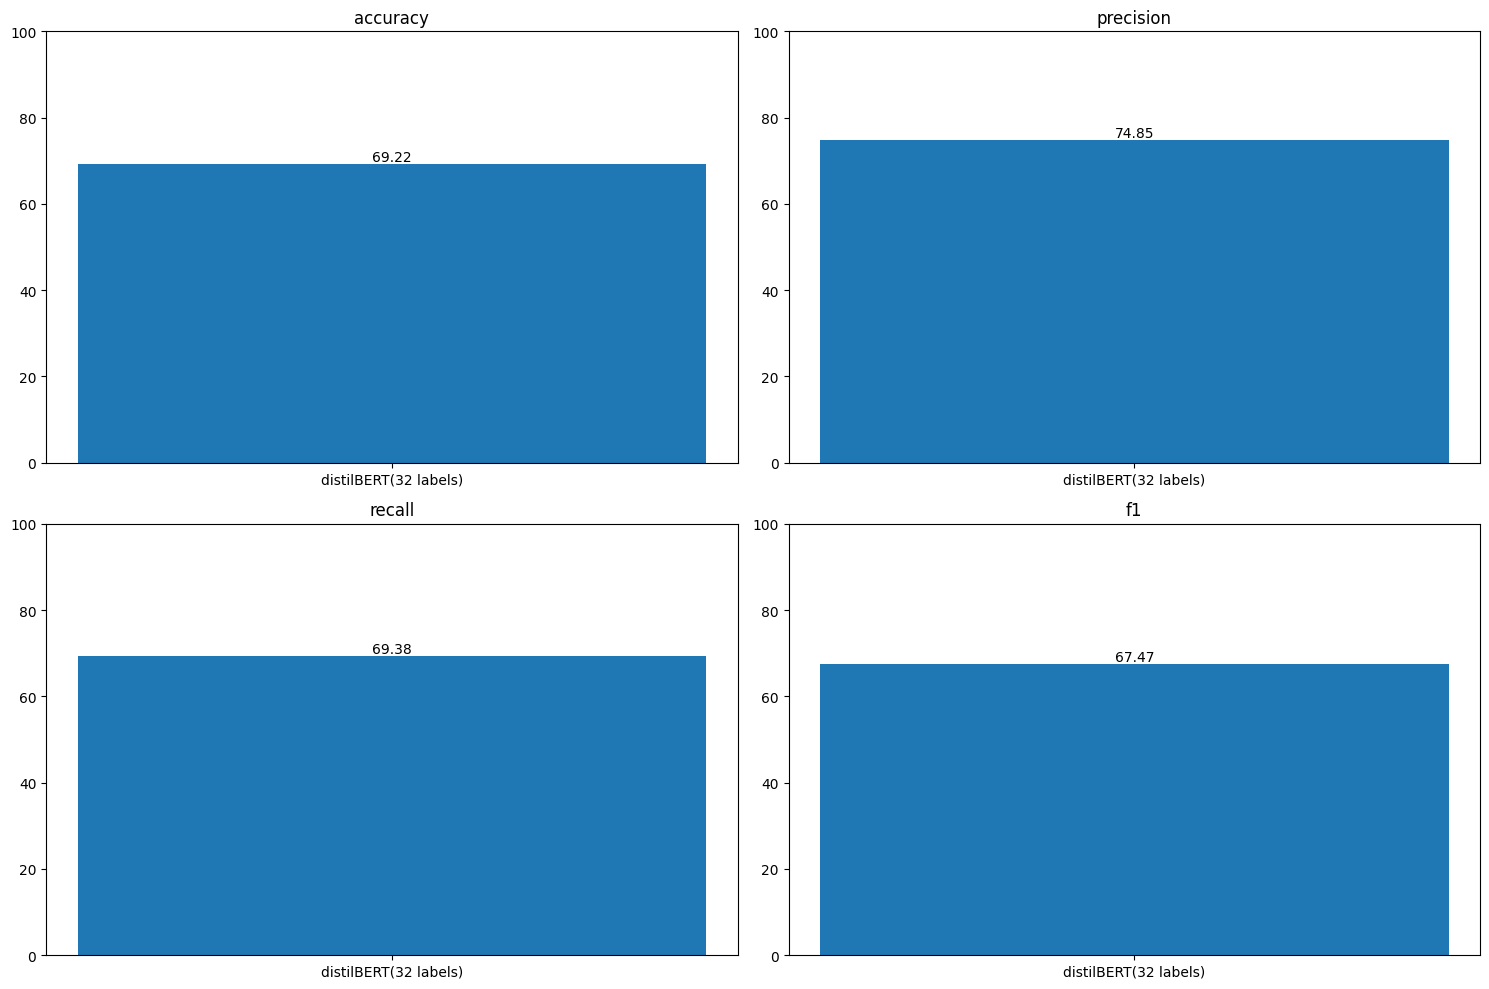

In [74]:
# get the final metrics
metrics_val= Metrics()
metrics_val.run(test_labels, valid_preds, "distilBERT(32 labels)")
metrics_val.plot()

As we see, BERT trained on 32 labels performs slightly better than random. Note that metrics vary in the range [0.52, 0.62], depending on the run, as all batches are randomly assigned.

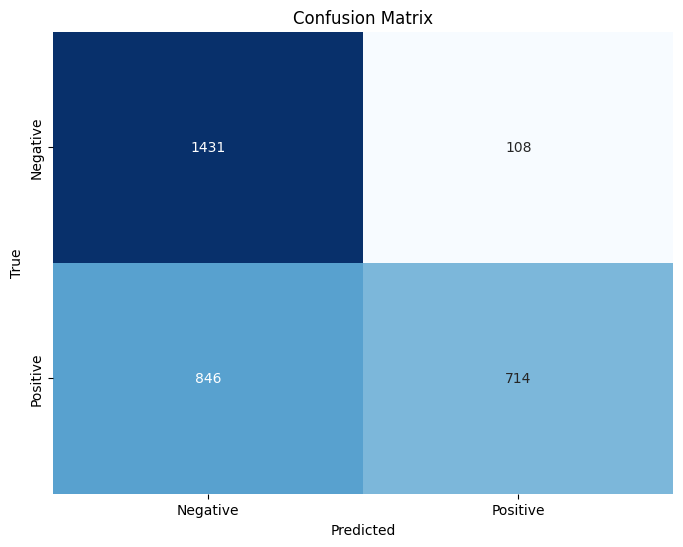

In [75]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels, valid_preds)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [76]:
import tensorflow.keras.backend as K

# Clear the Keras session
K.clear_session()

# Dataset Augmentation (1 point)

#### Experiment with an automated technique to increase your dataset size without using LLMs. Evaluate the impact on model performance.

In [77]:
# This function should be moved to the top of the notebook (Mikel used it in the first exercise)
# Function for data preprocessing

#getting a library of stopwords and defining a lemmatizer
porter=SnowballStemmer("english")
lmtzr = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

#additional functions

def strip(word):
    mod_string = re.sub(r'\W+', '', word)
    return mod_string

#the following leaves in place two or more capital letters in a row
#will be ignored when using standard stemming
def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

#modular pipeline for stemming, lemmatizing and lowercasing
#note this is NOT lemmatizing using grammar pos

def tokenize(text, modulation):
    if modulation<2:
        tokens = re.split(r'\W+', text)
        stems = []
        # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        for token in tokens:
            lowers=abbr_or_lower(token)
            if lowers not in stop_words:
                if re.search('[a-zA-Z]', lowers):
                    if modulation==0:
                        stems.append(lowers)
                    if modulation==1:
                        stems.append(porter.stem(lowers))
    else:
        sp_text=sp(text)
        stems = []
        lemmatized_text=[]
        for word in sp_text:
            lemmatized_text.append(word.lemma_)
        stems = [abbr_or_lower(strip(w)) for w in lemmatized_text if (abbr_or_lower(strip(w))) and (abbr_or_lower(strip(w)) not in stop_words)]
    return " ".join(stems)


def vectorize(tokens, vocab):
    vector=[]
    for w in vocab:
        vector.append(tokens.count(w))
    return vector

Text data augmentation approaches include:

+ Synonym Replacement: Replace words with their synonyms.
+ Random Insertion: Insert random words into the text.
+ Random Deletion: Randomly delete words from the text.
+ Random Swap: Swap two words randomly in the text.
+ Text Masking: Replace words or phrases with a mask token.

As far as we have very small dataset (DTM is of shape 32:305) I chose not to work with deletion or masking, but rather with synonyms. I thought of two approaches to do so:

### Data Augmentation: Manually Gathered Synonyms

First approach was to analyse the most common words associated with positive and negative sentiments and manually create a dictionary with synonyms. Then, I augmented data with 50 (tried more, but performance was worse, probably bacause of the limited variety of the changes and the fact, that probably misclassified observations could be misclassified now twice) observations and trained the same BERT with augmented data.

In [78]:
# I had slightly different approach, but changed it to Mikel's so to have the same logic throughout the notebook. Will have to move this and next cell to the first exercise later on.
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train_32['clean_text'])

Pipeline(steps=[('prepro', TextPreprocessor()),
                ('vect',
                 CountVectorizer(max_df=0.97, min_df=0.005,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1'))])

In [79]:
def tfidf_term(pipeline,df,sentiment):
# Access the CountVectorizer step from the pipeline
    count_vectorizer = pipeline.named_steps['vect']
    # Fit and transform the data
    tf_idf_pos_matrix = pipeline.transform(df[df['label']==sentiment]['clean_text'])
    # Convert count matrix to DataFrame
    vec_fr_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

    #Creating a dictionary of frequencies for our terms
    feature_names = count_vectorizer.get_feature_names_out()
    # Calculate Term frequency dictionary
    term_tfidf = np.mean(vec_fr_mtx, axis=0)
    #Store in a dictionary
    tfidf_dict = {i: n for i, n in zip(feature_names, term_tfidf)}
    print(len(term_tfidf))
    return feature_names, term_tfidf, tfidf_dict


def transform_to_dataframe(feature_names, score):
    # Create DataFrame with feature names and mean TF-IDF scores
    df = pd.DataFrame({'terms': feature_names, 'score': score})
    # Reset index
    df.reset_index(drop=True, inplace=True)
    return df


# Example usage:
def plot_freq_top(df,top,pos):
    df = df.sort_values(by='score',ascending = False)
    df = df.head(top)
    #We are going to set the

    # Plot the top N terms and their TF-IDF scores
    plt.figure(figsize=(10, 6))
    plt.barh(df['terms'], df['score'], align='center')
    plt.yticks(df['terms'])
    plt.xlabel('Frequency Score')
    plt.title(pos.format(top))
    #plt.xlim(0,0.010)
    plt.gca().invert_yaxis()  # Invert y-axis to display top terms at the top
    plt.show()

337


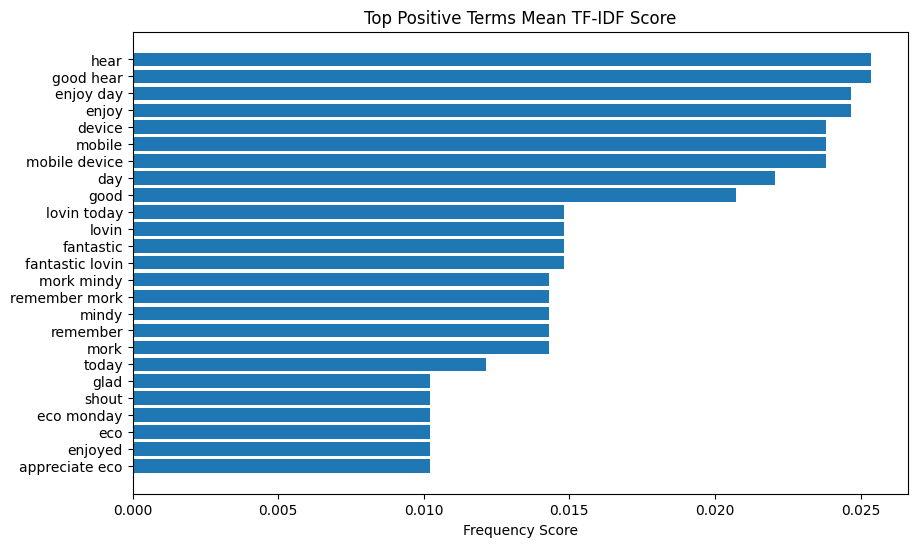

In [80]:
pos = f'Top Positive Terms Mean TF-IDF Score'
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)
plot_freq_top(pos_tf_idf,25,pos)

337


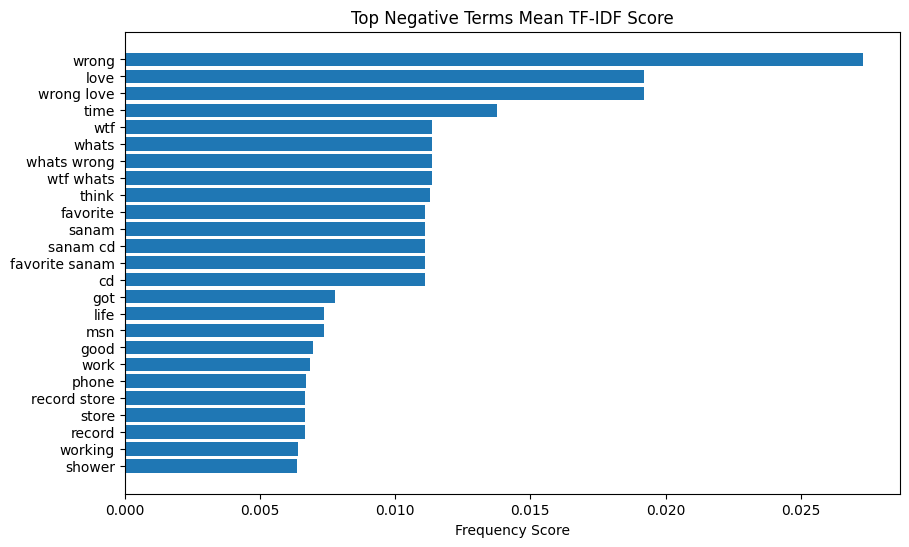

In [81]:
neg = f'Top Negative Terms Mean TF-IDF Score'
## Posive Terms
neg_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,0)
neg_tf_idf = transform_to_dataframe(neg_feature_names,term_tfidf)
plot_freq_top(neg_tf_idf,25,neg)

I got top 'most positive' and 'most negative' terms, manually chose some of them and assigned synonyms.

In [82]:
# Sort the dataframe by the 'score' column in decreasing order
neg_tf_idf_sorted = neg_tf_idf.sort_values(by='score', ascending=False)
pos_tf_idf_sorted = pos_tf_idf.sort_values(by='score', ascending=False)

# Extract the top 25 terms from the sorted dataframe
top_terms_neg = neg_tf_idf_sorted['terms'].head(25).tolist()
top_terms_pos = pos_tf_idf_sorted['terms'].head(25).tolist()

# Print the list of top 25 terms
print(top_terms_neg)
print(top_terms_pos)

['wrong', 'love', 'wrong love', 'time', 'wtf', 'whats', 'whats wrong', 'wtf whats', 'think', 'favorite', 'sanam', 'sanam cd', 'favorite sanam', 'cd', 'got', 'life', 'msn', 'good', 'work', 'phone', 'record store', 'store', 'record', 'working', 'shower']
['hear', 'good hear', 'enjoy day', 'enjoy', 'device', 'mobile', 'mobile device', 'day', 'good', 'lovin today', 'lovin', 'fantastic', 'fantastic lovin', 'mork mindy', 'remember mork', 'mindy', 'remember', 'mork', 'today', 'glad', 'shout', 'eco monday', 'eco', 'enjoyed', 'appreciate eco']


In [83]:
synonyms = {
    'school': ['education', 'academy'],
    'complicated': ['complex', 'difficult'],
    'bad': ['poor', 'negative', 'awful', 'lousy', 'rough'],
    'love': ['affection', 'adore', 'care for', 'like'],
    'guilty': ['regret', 'remorse'],
    'feel': ['emotion', 'vibe'],
    'oh': ['ah', 'ahh', 'oops'],
    'miss': ['long for', 'crave', 'feel loss'],
    'going': ['departing', 'leaving', 'traveling'],
    'dear': ['beloved', 'darling', 'precious'],
    'busy': ['occupied', 'engaged'],
    'working': ['laboring', 'employed'],
    'time': ['period', 'duration', 'interval'],
    'would': ['could', 'might', 'will'],
    'look': ['gaze', 'observe', 'glance'],
    'bed time': ['sleep time', 'rest time', 'night time'],
    'song': ['music', 'melody', 'tune'],
    'hi': ['hello', 'hey', 'greetings'],
    'love song': ['romantic music', 'passionate tune'],
    'want': ['desire', 'wish for', 'crave'],
    'please': ['kindly', 'if you please'],
}

In [84]:
# Function to replace key word with a random synonym
def replace_with_synonym(text, synonyms_dict):
    words = text.split()
    for i, word in enumerate(words):
        if word in synonyms_dict:
            synonyms = synonyms_dict[word]
            # Randomly select a synonym
            new_word = random.choice(synonyms)
            # Replace the key word with the selected synonym
            words[i] = new_word
    return ' '.join(words)

# Initialize an empty DataFrame to store new observations
new_rows = pd.DataFrame(columns=df_train_32.columns)

# Generate additional 50 rows
while len(new_rows) < 50:
    # Identify rows with words from synonyms dictionary
    relevant_rows = df_train_32[df_train_32['clean_text'].apply(lambda x: any(word in synonyms for word in x.split()))]
    # Duplicate each relevant row and replace key word with synonym
    for idx, row in relevant_rows.iterrows():
        new_row = row.copy()
        new_row['clean_text'] = replace_with_synonym(row['clean_text'], synonyms)
        new_rows = new_rows.append(new_row, ignore_index=True)
        if len(new_rows) >= 50:
            break

# Display the new DataFrame with 50 new rows
print(new_rows)


                                                 text label text_length  \
0   @JuliaBeverly oh snap...i'll finally get my si...     1          19   
1   @jazzy2fresh the life of property management j...     0          16   
2   little to no grass, and what is there is cover...     0          23   
3   @oldstorm I am lost. Please help me find a goo...     0          11   
4   We went to the city late arvo,checked out new ...     1          25   
5   Playing MSN games w Kaifeng, too bad, Gopets c...     0          10   
6   @SherieheartsRob yay! i think it does! oh...di...     0          16   
7   I am without internet for some time. Twitter o...     0          14   
8       shower, pizza, party  i wish at the same time     0           9   
9   @Lil_Shawn when do you go back home? Want to s...     1          15   
10                   @tokyohanna  what's wrong, love?     0           4   
11  Time to spend time with Mom and the rest of th...     1          23   
12  going to cinema now w

<ipython-input-84-5dc4f9f0cb87>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


In [85]:
# Add new_rows to df_train_32
augmented_df = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame shape
print(augmented_df.shape)

(82, 7)


In [86]:
# Define data and labels
augmented_df_data = augmented_df['clean_text']
augmented_df_label = augmented_df['label']

Note, that we will work with the same BERT model, so I will not change anything in the model architecture.

In [87]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_df_label).reshape(-1, 1)).toarray()

In [88]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_df_data)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

from keras.callbacks import EarlyStopping
bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# # Now, pass the wrapped generator to fit
history = bert_model.fit(batches_with_progress, epochs=2, steps_per_epoch=steps_per_epoch)



Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/2



Epoch:  10%|█         | 1/10 [00:31<04:39, 31.01s/it]

 1/10 [==>...........................] - ETA: 4:46 - loss: 0.3546 - recall: 0.8750 - precision: 0.8750


Epoch:  30%|███       | 3/10 [00:31<00:58,  8.38s/it]

 2/10 [=====>........................] - ETA: 6s - loss: 0.7603 - recall: 0.7500 - precision: 0.7500  


Epoch:  40%|████      | 4/10 [00:32<00:34,  5.75s/it]

 3/10 [========>.....................] - ETA: 5s - loss: 0.6551 - recall: 0.7917 - precision: 0.7917


Epoch:  50%|█████     | 5/10 [00:33<00:20,  4.12s/it]

 4/10 [===========>..................] - ETA: 4s - loss: 0.6411 - recall: 0.8125 - precision: 0.8125


Epoch:  60%|██████    | 6/10 [00:34<00:12,  3.04s/it]

 5/10 [==============>...............] - ETA: 3s - loss: 0.5348 - recall: 0.8500 - precision: 0.8500


Epoch:  70%|███████   | 7/10 [00:35<00:07,  2.34s/it]

 6/10 [=================>............] - ETA: 3s - loss: 0.4728 - recall: 0.8750 - precision: 0.8750


Epoch:  80%|████████  | 8/10 [00:35<00:03,  1.87s/it]

 7/10 [====================>.........] - ETA: 2s - loss: 0.4314 - recall: 0.8929 - precision: 0.8929


Epoch:  90%|█████████ | 9/10 [00:36<00:01,  1.57s/it]

 8/10 [=======================>......] - ETA: 1s - loss: 0.3784 - recall: 0.9062 - precision: 0.9062


Epoch: 100%|██████████| 10/10 [00:37<00:00,  1.34s/it]

 9/10 [==========================>...] - ETA: 0s - loss: 0.3567 - recall: 0.9028 - precision: 0.9028


Epoch: 11it [00:38,  1.19s/it]                        

10/10 [==============================] - 39s 819ms/step - loss: 0.3342 - recall: 0.9000 - precision: 0.9000
Epoch 2/2



Epoch: 12it [00:39,  1.08s/it]

 1/10 [==>...........................] - ETA: 5s - loss: 0.0039 - recall: 1.0000 - precision: 1.0000


Epoch: 13it [00:39,  1.06it/s]

 2/10 [=====>........................] - ETA: 6s - loss: 0.0027 - recall: 1.0000 - precision: 1.0000


Epoch: 14it [00:40,  1.09it/s]

 3/10 [========>.....................] - ETA: 5s - loss: 0.0129 - recall: 1.0000 - precision: 1.0000


Epoch: 15it [00:41,  1.12it/s]

 4/10 [===========>..................] - ETA: 5s - loss: 0.0272 - recall: 1.0000 - precision: 1.0000


Epoch: 16it [00:42,  1.14it/s]

 5/10 [==============>...............] - ETA: 4s - loss: 0.0230 - recall: 1.0000 - precision: 1.0000


Epoch: 17it [00:43,  1.20it/s]

 6/10 [=================>............] - ETA: 3s - loss: 0.0662 - recall: 0.9762 - precision: 0.9762


Epoch: 18it [00:43,  1.24it/s]

 7/10 [====================>.........] - ETA: 2s - loss: 0.0807 - recall: 0.9600 - precision: 0.9600


Epoch: 19it [00:44,  1.22it/s]

 8/10 [=======================>......] - ETA: 1s - loss: 0.0876 - recall: 0.9483 - precision: 0.9483


Epoch: 20it [00:45,  1.24it/s]

 9/10 [==========================>...] - ETA: 0s - loss: 0.0770 - recall: 0.9545 - precision: 0.9545


Epoch: 21it [00:46,  1.25it/s]

10/10 [==============================] - 8s 803ms/step - loss: 0.0692 - recall: 0.9595 - precision: 0.9595


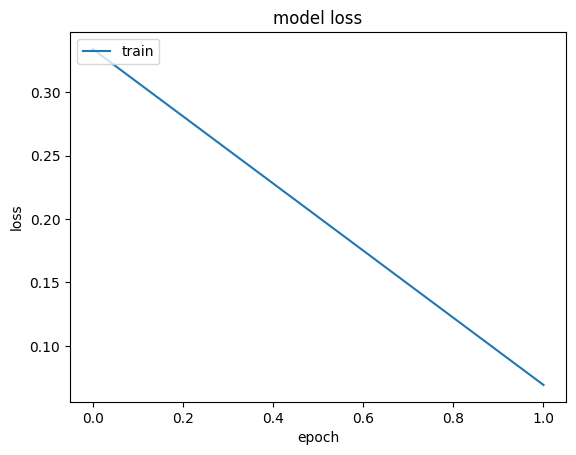

In [89]:
# Skip the first 10 epochs (index 0 to 9) and start plotting from the 11th epoch (index 10)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# Adjusted the legend to include both 'train' and 'val' for clarity
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [90]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


97/97 [==============================] - 43s 408ms/step


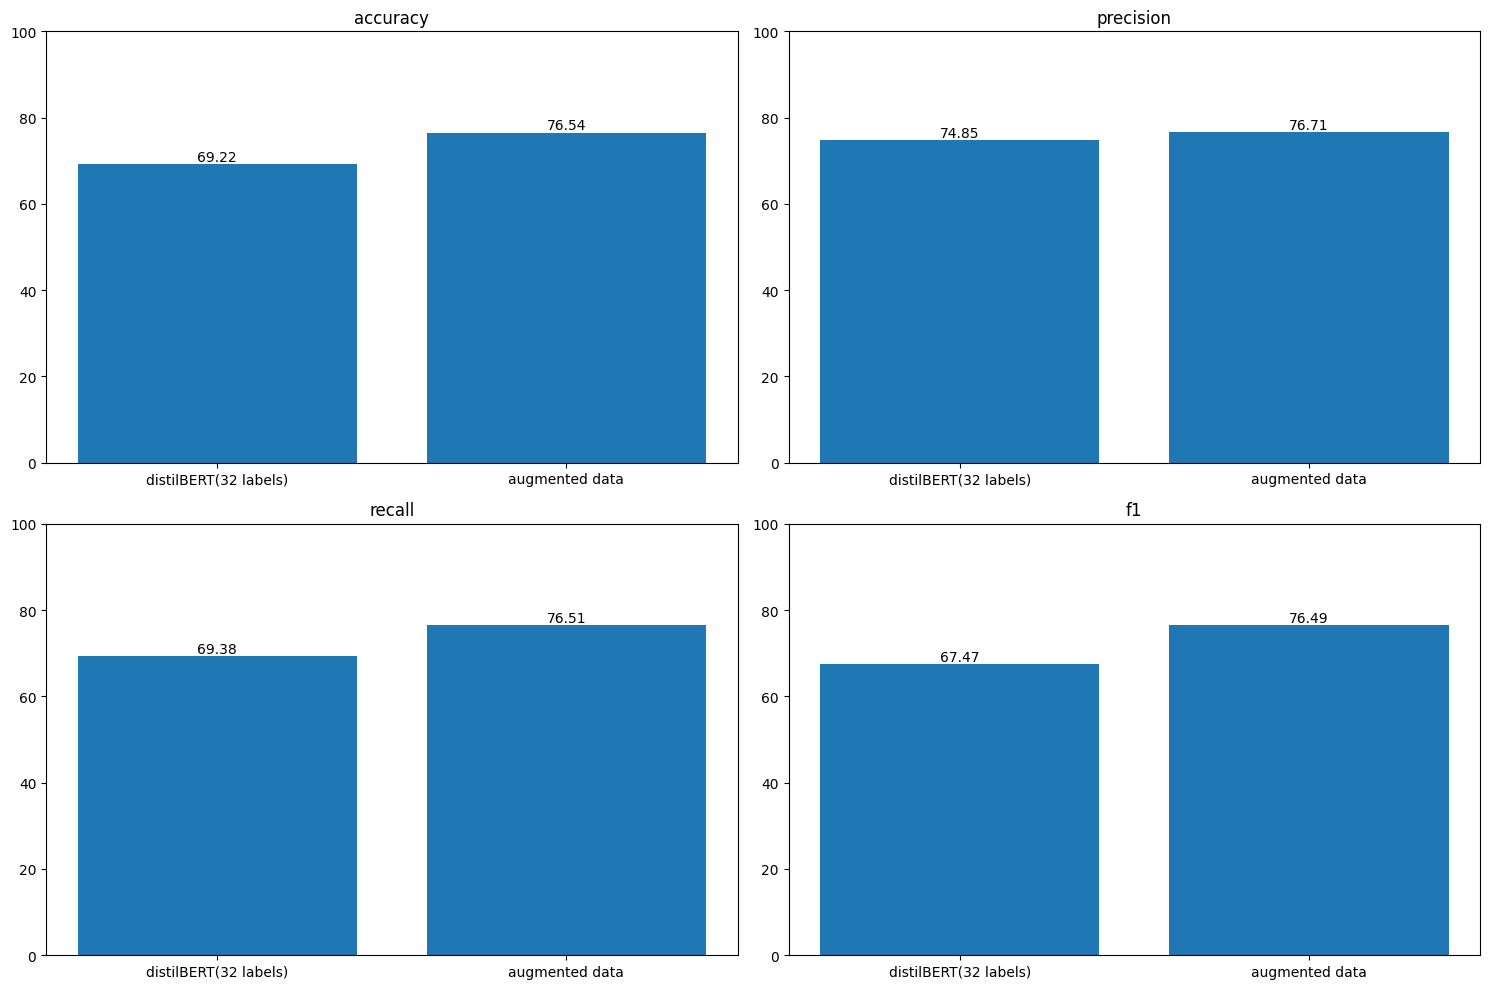

In [91]:
# get the final metrics
metrics_val.run(test_labels, valid_preds, "augmented data")
metrics_val.plot()

In [92]:
# Clear the Keras session
K.clear_session()

### Data Augmentation: Synonyms from WordNet

I didn't choose to work with WordNet packages in the beginning, as far as synonyms look kind of random and don't usually properly reflect the meaning of the word (probably because of multiple meanings) and don't consider the context. But as far as I couldn't manually assign synonyms to all (or at least many) tokens, I decided to try WordNet as well.

So the second approach is to rendomly change 30% of the tokens in the comments (I tried different shares, 30% performed better) and add 32*20 (tried different numbers as well) new rows.

In [93]:
# Function to get synonyms from WordNet
def get_wordnet_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to replace random words with WordNet synonyms
def replace_with_synonym_wordnet(text):
    words = text.split()
    for i, word in enumerate(words):
        # Randomly decide whether to replace the word with a synonym
        if random.random() < 0.3:  # Adjust the probability as needed
            # Get WordNet synonyms for the word
            synonyms = get_wordnet_synonyms(word)
            if synonyms:
                # Randomly select a synonym
                new_word = random.choice(synonyms)
                # Replace the word with the selected synonym
                words[i] = new_word
    return ' '.join(words)

# Duplicate each row and replace random words with WordNet synonyms
new_rows = pd.DataFrame(columns=df_train_32.columns)
for idx, row in df_train_32.iterrows():
    for _ in range(20):  # Duplicate 20 times - can be adjusted as needed
        # Duplicate the row
        new_row = row.copy()
        # Replace random words in the 'clean_text' column with WordNet synonyms
        new_row['clean_text'] = replace_with_synonym_wordnet(row['clean_text'])
        # Append the new row to the DataFrame
        new_rows = new_rows.append(new_row, ignore_index=True)

# Display the new DataFrame with duplicated rows and random word replacements
print(new_rows.head())


<ipython-input-93-a44f8c0859a0>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


                                                text label text_length  \
0  Studying in Starbucks and sipping on an amazin...     1          10   
1  Studying in Starbucks and sipping on an amazin...     1          10   
2  Studying in Starbucks and sipping on an amazin...     1          10   
3  Studying in Starbucks and sipping on an amazin...     1          10   
4  Studying in Starbucks and sipping on an amazin...     1          10   

                                          clean_text clean_emotions hashtag  \
0  study in starbucks and sip along an amazing ca...                          
1  studying in starbucks and sip on an amazing ca...                          
2  meditate in starbucks and sip on AN amazing ca...                          
3  studying in starbucks and sipping on an amazin...                          
4  contemplate in starbucks and sipping on AN ama...                          

                                        text_emotion  
0  studying in starbucks 

From the printed first rows you actually may see (comparing text and clean text, which was duplicated), that synonyms are kind of weird.

In [94]:
# Add new_rows to df_train_32
augmented_df_wn = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame
print(augmented_df_wn.shape)

(672, 7)


In [95]:
augmented_df_data_wn = augmented_df['clean_text']
augmented_df_label_wn = augmented_df['label']

In [96]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_df_label_wn).reshape(-1, 1)).toarray()

In [97]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_df_data_wn)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
#bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)

history = bert_model.fit(batches_with_progress, epochs=2, steps_per_epoch=steps_per_epoch)




Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/2




Epoch:  10%|█         | 1/10 [00:31<04:41, 31.27s/it]

 1/10 [==>...........................] - ETA: 4:47 - loss: 0.0936 - recall: 1.0000 - precision: 1.0000



Epoch:  30%|███       | 3/10 [00:32<00:58,  8.38s/it]

 2/10 [=====>........................] - ETA: 6s - loss: 0.0490 - recall: 1.0000 - precision: 1.0000  



Epoch:  40%|████      | 4/10 [00:32<00:34,  5.78s/it]

 3/10 [========>.....................] - ETA: 6s - loss: 0.0334 - recall: 1.0000 - precision: 1.0000



Epoch:  50%|█████     | 5/10 [00:33<00:20,  4.17s/it]

 4/10 [===========>..................] - ETA: 5s - loss: 0.0252 - recall: 1.0000 - precision: 1.0000



Epoch:  60%|██████    | 6/10 [00:34<00:12,  3.11s/it]

 5/10 [==============>...............] - ETA: 4s - loss: 0.0265 - recall: 1.0000 - precision: 1.0000



Epoch:  70%|███████   | 7/10 [00:35<00:07,  2.38s/it]

 6/10 [=================>............] - ETA: 3s - loss: 0.0586 - recall: 0.9792 - precision: 0.9792



Epoch:  80%|████████  | 8/10 [00:36<00:03,  1.89s/it]

 7/10 [====================>.........] - ETA: 2s - loss: 0.0557 - recall: 0.9821 - precision: 0.9821



Epoch:  90%|█████████ | 9/10 [00:37<00:01,  1.56s/it]

 8/10 [=======================>......] - ETA: 1s - loss: 0.0497 - recall: 0.9844 - precision: 0.9844



Epoch: 100%|██████████| 10/10 [00:37<00:00,  1.33s/it]

 9/10 [==========================>...] - ETA: 0s - loss: 0.0448 - recall: 0.9861 - precision: 0.9861



Epoch: 11it [00:38,  1.22s/it]                        

10/10 [==============================] - 40s 862ms/step - loss: 0.0405 - recall: 0.9875 - precision: 0.9875
Epoch 2/2




Epoch: 12it [00:39,  1.15s/it]

 1/10 [==>...........................] - ETA: 5s - loss: 5.9551e-04 - recall: 1.0000 - precision: 1.0000



Epoch: 13it [00:40,  1.01it/s]

 2/10 [=====>........................] - ETA: 6s - loss: 8.2199e-04 - recall: 1.0000 - precision: 1.0000



Epoch: 14it [00:41,  1.06it/s]

 3/10 [========>.....................] - ETA: 5s - loss: 0.0011 - recall: 1.0000 - precision: 1.0000    



Epoch: 15it [00:42,  1.09it/s]

 4/10 [===========>..................] - ETA: 4s - loss: 0.0017 - recall: 1.0000 - precision: 1.0000



Epoch: 16it [00:42,  1.14it/s]

 5/10 [==============>...............] - ETA: 4s - loss: 0.0147 - recall: 1.0000 - precision: 1.0000



Epoch: 17it [00:43,  1.17it/s]

 6/10 [=================>............] - ETA: 3s - loss: 0.0120 - recall: 1.0000 - precision: 1.0000



Epoch: 18it [00:44,  1.21it/s]

 7/10 [====================>.........] - ETA: 2s - loss: 0.0151 - recall: 1.0000 - precision: 1.0000



Epoch: 19it [00:45,  1.23it/s]

 8/10 [=======================>......] - ETA: 1s - loss: 0.0220 - recall: 1.0000 - precision: 1.0000



Epoch: 20it [00:46,  1.23it/s]

 9/10 [==========================>...] - ETA: 0s - loss: 0.0194 - recall: 1.0000 - precision: 1.0000



Epoch: 21it [00:46,  1.22it/s]

10/10 [==============================] - 8s 813ms/step - loss: 0.0176 - recall: 1.0000 - precision: 1.0000


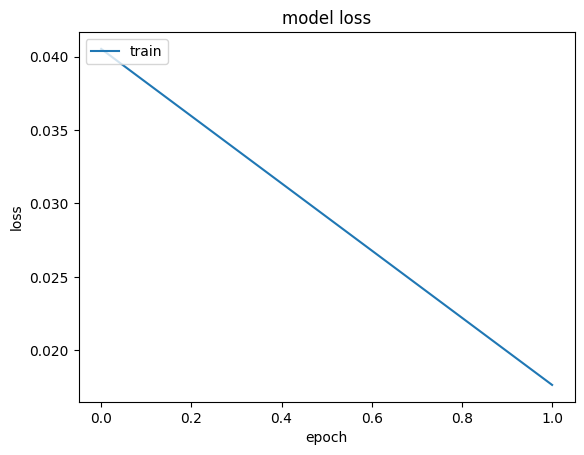

In [98]:
# Skip the first 10 epochs (index 0 to 9) and start plotting from the 11th epoch (index 10)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# Adjusted the legend to include both 'train' and 'val' for clarity
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [99]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


97/97 [==============================] - 42s 399ms/step


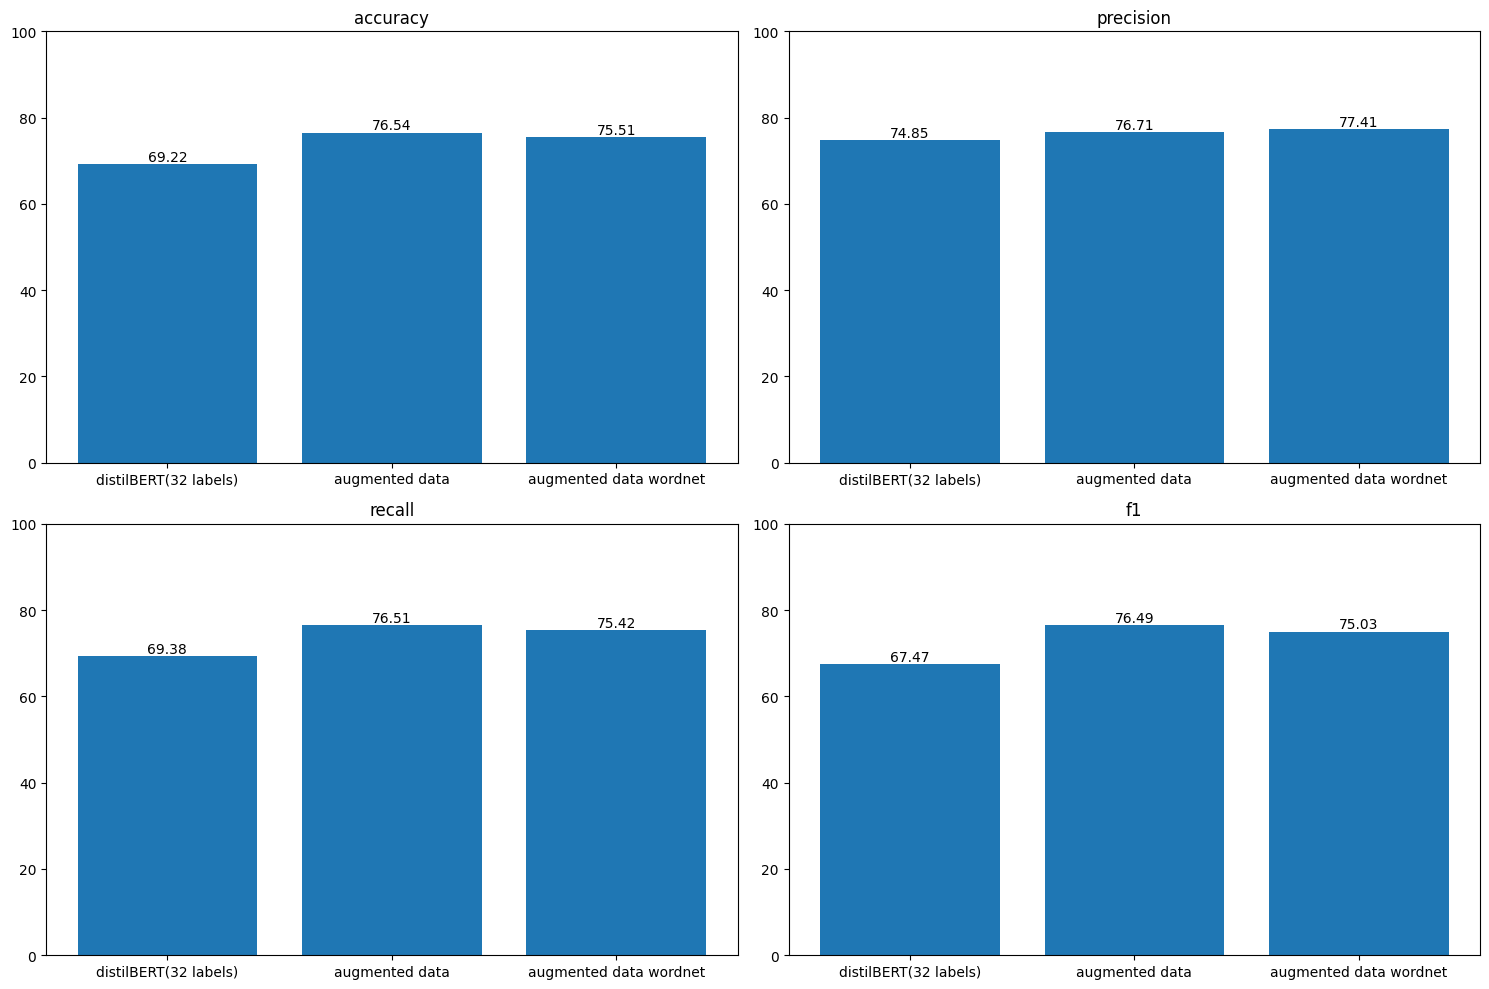

In [100]:
# get the final metrics
metrics_val.run(test_labels, valid_preds, "augmented data wordnet")
metrics_val.plot()

In [101]:
# Clear the Keras session
K.clear_session()

---

# Zero-Shot Learning with LLM

In [102]:
import random
from transformers import pipeline

model_name = "facebook/bart-large-mnli"  # Adjust model name as needed

df_val_sampled = df_val.sample(n=300, random_state=42)
sampled_list1 = (df_val_sampled['text']).tolist()

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model=model_name)

# Define the candidate labels
candidate_labels = ['positive', 'negative']

# Store the predictions for each item in a list
predictions = []

# Iterate over each text sample in test_data
for text_sample in sampled_list1:
    # Use the classifier pipeline to predict the label
    result = classifier(text_sample, candidate_labels)

    # Get the label with the highest score
    if result['scores'][0] >= result['scores'][1]:
        predicted_label = result['labels'][0]
    else:
        predicted_label = result['labels'][1]

    # Append the predicted label to the predictions list
    predictions.append(predicted_label)

# Print the predictions
print(predictions)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

['negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'po

In [103]:
zero_predictions = [1 if prediction == 'positive' else 0 for prediction in predictions]

# Update the "label" column with values from sampled_list2
df_val_sampled['label'] = zero_predictions

# Display the updated DataFrame
print(df_val_sampled.head())

                                                   text  label  text_length  \
1116  I think someone should keep me updated on the ...      0           16   
1395  @eleynish Yes, that's her! Hahaha! We have one...      1           16   
422   @craftmastere thx. it's definitely a relief to...      1           19   
413   At a 60's party that's kinda boring!! Ughh I w...      0           11   
451                        umms i miss micheal and noah      0            6   

                                             clean_text clean_emotions  \
1116  i think someone should keep me updated on the ...                  
1395  yes , that ' s her ! hahaha ! we have one cute...                  
422   thx . it ' s definitely a relief to have a pla...                  
413   at a ' s party that ' s kinda boring ! ughh i ...                  
451                        umms i miss micheal and noah                  

     hashtag                                       text_emotion  
1116          

In [104]:
# Add new_rows to df_train_32
augmented_zero_df = pd.concat([df_train_32, df_val_sampled], ignore_index=True)

# Display the augmented DataFrame
print(augmented_zero_df.shape)

(332, 7)


In [105]:
augmented_zero_df_data = augmented_zero_df['clean_text']
augmented_zero_df_label = augmented_zero_df['label']

In [106]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_zero_df_label).reshape(-1, 1)).toarray()

In [107]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_zero_df_data)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
bert_model.fit(batches_with_progress, epochs=2, steps_per_epoch=steps_per_epoch)





Epoch:   0%|          | 0/41 [00:00<?, ?it/s]

Epoch 1/2





Epoch:   2%|▏         | 1/41 [00:29<19:55, 29.89s/it]

 1/41 [..............................] - ETA: 20:20 - loss: 0.6521 - recall: 0.7500 - precision: 0.7500




Epoch:   7%|▋         | 3/41 [00:30<05:05,  8.03s/it]

 2/41 [>.............................] - ETA: 31s - loss: 0.9453 - recall: 0.7500 - precision: 0.7500  




Epoch:  10%|▉         | 4/41 [00:31<03:24,  5.53s/it]

 3/41 [=>............................] - ETA: 30s - loss: 1.1731 - recall: 0.7500 - precision: 0.7500




Epoch:  12%|█▏        | 5/41 [00:32<02:22,  3.96s/it]

 4/41 [=>............................] - ETA: 29s - loss: 0.9050 - recall: 0.8125 - precision: 0.8125




Epoch:  15%|█▍        | 6/41 [00:33<01:42,  2.94s/it]

 5/41 [==>...........................] - ETA: 28s - loss: 0.7262 - recall: 0.8500 - precision: 0.8500




Epoch:  17%|█▋        | 7/41 [00:33<01:17,  2.27s/it]

 6/41 [===>..........................] - ETA: 27s - loss: 0.7805 - recall: 0.8333 - precision: 0.8333




Epoch:  20%|█▉        | 8/41 [00:34<00:59,  1.82s/it]

 7/41 [====>.........................] - ETA: 27s - loss: 0.7645 - recall: 0.8036 - precision: 0.8036




Epoch:  22%|██▏       | 9/41 [00:35<00:48,  1.51s/it]

 8/41 [====>.........................] - ETA: 26s - loss: 0.6958 - recall: 0.8125 - precision: 0.8125




Epoch:  24%|██▍       | 10/41 [00:36<00:40,  1.30s/it]

 9/41 [=====>........................] - ETA: 25s - loss: 0.7157 - recall: 0.8194 - precision: 0.8194




Epoch:  27%|██▋       | 11/41 [00:37<00:33,  1.13s/it]

10/41 [======>.......................] - ETA: 24s - loss: 0.7860 - recall: 0.7875 - precision: 0.7875




Epoch:  29%|██▉       | 12/41 [00:37<00:30,  1.04s/it]

11/41 [=======>......................] - ETA: 24s - loss: 0.7558 - recall: 0.7955 - precision: 0.7955




Epoch:  32%|███▏      | 13/41 [00:38<00:27,  1.02it/s]

12/41 [=======>......................] - ETA: 23s - loss: 0.7783 - recall: 0.7812 - precision: 0.7812




Epoch:  34%|███▍      | 14/41 [00:39<00:25,  1.05it/s]

13/41 [========>.....................] - ETA: 22s - loss: 0.7206 - recall: 0.7981 - precision: 0.7981




Epoch:  37%|███▋      | 15/41 [00:40<00:23,  1.10it/s]

14/41 [=========>....................] - ETA: 21s - loss: 0.8095 - recall: 0.7768 - precision: 0.7768




Epoch:  39%|███▉      | 16/41 [00:41<00:21,  1.15it/s]

15/41 [=========>....................] - ETA: 21s - loss: 0.7751 - recall: 0.7833 - precision: 0.7833




Epoch:  41%|████▏     | 17/41 [00:42<00:20,  1.16it/s]

16/41 [==========>...................] - ETA: 20s - loss: 0.7631 - recall: 0.7891 - precision: 0.7891




Epoch:  44%|████▍     | 18/41 [00:42<00:19,  1.17it/s]

17/41 [===========>..................] - ETA: 19s - loss: 0.7711 - recall: 0.7721 - precision: 0.7721




Epoch:  46%|████▋     | 19/41 [00:43<00:18,  1.18it/s]

18/41 [============>.................] - ETA: 18s - loss: 0.7393 - recall: 0.7847 - precision: 0.7847




Epoch:  49%|████▉     | 20/41 [00:44<00:18,  1.16it/s]

19/41 [============>.................] - ETA: 18s - loss: 0.7105 - recall: 0.7961 - precision: 0.7961




Epoch:  51%|█████     | 21/41 [00:45<00:17,  1.17it/s]

20/41 [=============>................] - ETA: 17s - loss: 0.7041 - recall: 0.7875 - precision: 0.7875




Epoch:  54%|█████▎    | 22/41 [00:46<00:16,  1.18it/s]

21/41 [==============>...............] - ETA: 16s - loss: 0.6945 - recall: 0.7857 - precision: 0.7857




Epoch:  56%|█████▌    | 23/41 [00:47<00:15,  1.18it/s]

22/41 [===============>..............] - ETA: 15s - loss: 0.6862 - recall: 0.7898 - precision: 0.7898




Epoch:  59%|█████▊    | 24/41 [00:48<00:15,  1.13it/s]

23/41 [===============>..............] - ETA: 14s - loss: 0.6733 - recall: 0.7880 - precision: 0.7880




Epoch:  61%|██████    | 25/41 [00:48<00:13,  1.17it/s]

24/41 [================>.............] - ETA: 14s - loss: 0.6953 - recall: 0.7812 - precision: 0.7812




Epoch:  63%|██████▎   | 26/41 [00:49<00:12,  1.16it/s]

25/41 [=================>............] - ETA: 13s - loss: 0.7019 - recall: 0.7750 - precision: 0.7750




Epoch:  66%|██████▌   | 27/41 [00:50<00:11,  1.17it/s]

26/41 [==================>...........] - ETA: 12s - loss: 0.6810 - recall: 0.7788 - precision: 0.7788




Epoch:  68%|██████▊   | 28/41 [00:51<00:11,  1.18it/s]

27/41 [==================>...........] - ETA: 11s - loss: 0.6729 - recall: 0.7731 - precision: 0.7731




Epoch:  71%|███████   | 29/41 [00:52<00:09,  1.20it/s]

28/41 [===================>..........] - ETA: 10s - loss: 0.6785 - recall: 0.7723 - precision: 0.7723




Epoch:  73%|███████▎  | 30/41 [00:53<00:09,  1.20it/s]

29/41 [====================>.........] - ETA: 9s - loss: 0.6715 - recall: 0.7716 - precision: 0.7716 




Epoch:  76%|███████▌  | 31/41 [00:53<00:08,  1.18it/s]

30/41 [====================>.........] - ETA: 9s - loss: 0.6606 - recall: 0.7750 - precision: 0.7750




Epoch:  78%|███████▊  | 32/41 [00:54<00:07,  1.16it/s]

31/41 [=====================>........] - ETA: 8s - loss: 0.6436 - recall: 0.7782 - precision: 0.7782




Epoch:  80%|████████  | 33/41 [00:55<00:06,  1.17it/s]

32/41 [======================>.......] - ETA: 7s - loss: 0.6422 - recall: 0.7773 - precision: 0.7773




Epoch:  83%|████████▎ | 34/41 [00:56<00:05,  1.17it/s]

33/41 [=======================>......] - ETA: 6s - loss: 0.6380 - recall: 0.7727 - precision: 0.7727




Epoch:  85%|████████▌ | 35/41 [00:57<00:05,  1.19it/s]

34/41 [=======================>......] - ETA: 5s - loss: 0.6454 - recall: 0.7721 - precision: 0.7721




Epoch:  88%|████████▊ | 36/41 [00:58<00:04,  1.22it/s]

35/41 [========================>.....] - ETA: 4s - loss: 0.6432 - recall: 0.7750 - precision: 0.7750




Epoch:  90%|█████████ | 37/41 [00:58<00:03,  1.24it/s]

36/41 [=========================>....] - ETA: 4s - loss: 0.6345 - recall: 0.7812 - precision: 0.7812




Epoch:  93%|█████████▎| 38/41 [00:59<00:02,  1.24it/s]

37/41 [==========================>...] - ETA: 3s - loss: 0.6630 - recall: 0.7770 - precision: 0.7770




Epoch:  95%|█████████▌| 39/41 [01:00<00:01,  1.25it/s]

38/41 [==========================>...] - ETA: 2s - loss: 0.6635 - recall: 0.7730 - precision: 0.7730




Epoch:  98%|█████████▊| 40/41 [01:01<00:00,  1.27it/s]

39/41 [===========================>..] - ETA: 1s - loss: 0.6524 - recall: 0.7724 - precision: 0.7724




Epoch: 100%|██████████| 41/41 [01:02<00:00,  1.23it/s]

40/41 [============================>.] - ETA: 0s - loss: 0.6438 - recall: 0.7750 - precision: 0.7750




Epoch: 42it [01:02,  1.22it/s]                        

41/41 [==============================] - 64s 826ms/step - loss: 0.6360 - recall: 0.7774 - precision: 0.7774
Epoch 2/2





Epoch: 43it [01:03,  1.22it/s]

 1/41 [..............................] - ETA: 26s - loss: 0.2180 - recall: 1.0000 - precision: 1.0000




Epoch: 44it [01:04,  1.30it/s]

 2/41 [>.............................] - ETA: 30s - loss: 0.1606 - recall: 1.0000 - precision: 1.0000




Epoch: 45it [01:05,  1.29it/s]

 3/41 [=>............................] - ETA: 30s - loss: 0.2850 - recall: 0.9000 - precision: 0.9000




Epoch: 46it [01:05,  1.28it/s]

 4/41 [=>............................] - ETA: 29s - loss: 0.5110 - recall: 0.8571 - precision: 0.8571




Epoch: 47it [01:06,  1.27it/s]

 5/41 [==>...........................] - ETA: 28s - loss: 0.4047 - recall: 0.8889 - precision: 0.8889




Epoch: 48it [01:07,  1.25it/s]

 6/41 [===>..........................] - ETA: 27s - loss: 0.3537 - recall: 0.9091 - precision: 0.9091




Epoch: 49it [01:08,  1.28it/s]

 7/41 [====>.........................] - ETA: 26s - loss: 0.3206 - recall: 0.9231 - precision: 0.9231




Epoch: 50it [01:09,  1.27it/s]

 8/41 [====>.........................] - ETA: 26s - loss: 0.2930 - recall: 0.9333 - precision: 0.9333




Epoch: 51it [01:09,  1.23it/s]

 9/41 [=====>........................] - ETA: 25s - loss: 0.2780 - recall: 0.9265 - precision: 0.9265




Epoch: 52it [01:10,  1.21it/s]

10/41 [======>.......................] - ETA: 25s - loss: 0.2577 - recall: 0.9342 - precision: 0.9342




Epoch: 53it [01:11,  1.21it/s]

11/41 [=======>......................] - ETA: 24s - loss: 0.2817 - recall: 0.9286 - precision: 0.9286




Epoch: 54it [01:12,  1.20it/s]

12/41 [=======>......................] - ETA: 23s - loss: 0.2722 - recall: 0.9239 - precision: 0.9239




Epoch: 55it [01:13,  1.21it/s]

13/41 [========>.....................] - ETA: 22s - loss: 0.3174 - recall: 0.9100 - precision: 0.9100




Epoch: 56it [01:14,  1.21it/s]

14/41 [=========>....................] - ETA: 22s - loss: 0.3224 - recall: 0.8981 - precision: 0.8981




Epoch: 57it [01:14,  1.20it/s]

15/41 [=========>....................] - ETA: 21s - loss: 0.3227 - recall: 0.8879 - precision: 0.8879




Epoch: 58it [01:15,  1.20it/s]

16/41 [==========>...................] - ETA: 20s - loss: 0.3309 - recall: 0.8871 - precision: 0.8871




Epoch: 59it [01:16,  1.21it/s]

17/41 [===========>..................] - ETA: 19s - loss: 0.3232 - recall: 0.8864 - precision: 0.8864




Epoch: 60it [01:17,  1.21it/s]

18/41 [============>.................] - ETA: 18s - loss: 0.3102 - recall: 0.8929 - precision: 0.8929




Epoch: 61it [01:18,  1.24it/s]

19/41 [============>.................] - ETA: 17s - loss: 0.2951 - recall: 0.8986 - precision: 0.8986




Epoch: 62it [01:19,  1.24it/s]

20/41 [=============>................] - ETA: 17s - loss: 0.2839 - recall: 0.9038 - precision: 0.9038




Epoch: 63it [01:19,  1.22it/s]

21/41 [==============>...............] - ETA: 16s - loss: 0.2909 - recall: 0.8963 - precision: 0.8963




Epoch: 64it [01:20,  1.24it/s]

22/41 [===============>..............] - ETA: 15s - loss: 0.2860 - recall: 0.9012 - precision: 0.9012




Epoch: 65it [01:21,  1.23it/s]

23/41 [===============>..............] - ETA: 14s - loss: 0.2790 - recall: 0.9056 - precision: 0.9056




Epoch: 66it [01:22,  1.23it/s]

24/41 [================>.............] - ETA: 13s - loss: 0.2720 - recall: 0.9043 - precision: 0.9043




Epoch: 67it [01:23,  1.23it/s]

25/41 [=================>............] - ETA: 13s - loss: 0.2868 - recall: 0.9031 - precision: 0.9031




Epoch: 68it [01:23,  1.25it/s]

26/41 [==================>...........] - ETA: 12s - loss: 0.2927 - recall: 0.9020 - precision: 0.9020




Epoch: 69it [01:24,  1.24it/s]

27/41 [==================>...........] - ETA: 11s - loss: 0.2882 - recall: 0.9009 - precision: 0.9009




Epoch: 70it [01:25,  1.23it/s]

28/41 [===================>..........] - ETA: 10s - loss: 0.2810 - recall: 0.9045 - precision: 0.9045




Epoch: 71it [01:26,  1.23it/s]

29/41 [====================>.........] - ETA: 9s - loss: 0.2765 - recall: 0.9035 - precision: 0.9035 




Epoch: 72it [01:27,  1.24it/s]

30/41 [====================>.........] - ETA: 8s - loss: 0.2818 - recall: 0.9025 - precision: 0.9025




Epoch: 73it [01:27,  1.23it/s]

31/41 [=====================>........] - ETA: 8s - loss: 0.2783 - recall: 0.9057 - precision: 0.9057




Epoch: 74it [01:28,  1.24it/s]

32/41 [======================>.......] - ETA: 7s - loss: 0.2865 - recall: 0.9048 - precision: 0.9048




Epoch: 75it [01:29,  1.25it/s]

33/41 [=======================>......] - ETA: 6s - loss: 0.2818 - recall: 0.9077 - precision: 0.9077




Epoch: 76it [01:30,  1.25it/s]

34/41 [=======================>......] - ETA: 5s - loss: 0.2748 - recall: 0.9104 - precision: 0.9104




Epoch: 77it [01:31,  1.28it/s]

35/41 [========================>.....] - ETA: 4s - loss: 0.2676 - recall: 0.9130 - precision: 0.9130




Epoch: 78it [01:31,  1.29it/s]

36/41 [=========================>....] - ETA: 4s - loss: 0.2655 - recall: 0.9120 - precision: 0.9120




Epoch: 79it [01:32,  1.28it/s]

37/41 [==========================>...] - ETA: 3s - loss: 0.2646 - recall: 0.9075 - precision: 0.9075




Epoch: 80it [01:33,  1.31it/s]

38/41 [==========================>...] - ETA: 2s - loss: 0.2729 - recall: 0.9067 - precision: 0.9067




Epoch: 81it [01:34,  1.32it/s]

39/41 [===========================>..] - ETA: 1s - loss: 0.2692 - recall: 0.9058 - precision: 0.9058




Epoch: 82it [01:34,  1.31it/s]

40/41 [============================>.] - ETA: 0s - loss: 0.2649 - recall: 0.9082 - precision: 0.9082




Epoch: 83it [01:35,  1.31it/s]

41/41 [==============================] - 33s 801ms/step - loss: 0.2604 - recall: 0.9105 - precision: 0.9105


In [108]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(validation_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


47/47 [==============================] - 24s 417ms/step


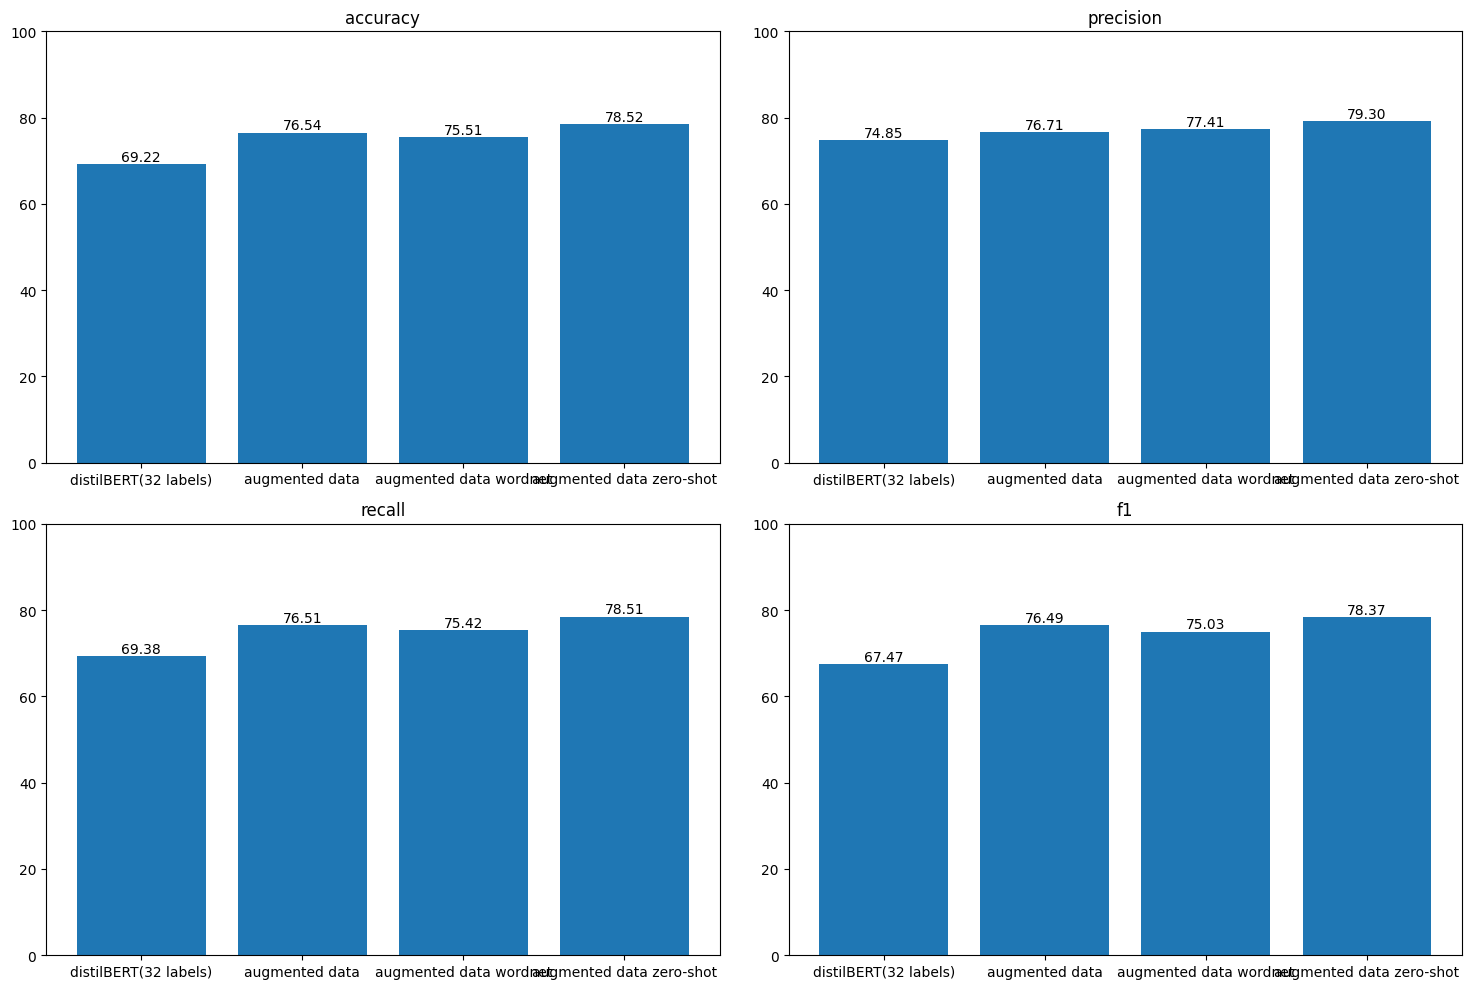

In [109]:
# get the final metrics
metrics_val.run(validation_labels, valid_preds, "augmented data zero-shot")
metrics_val.plot()

In [110]:
# Clear the Keras session
K.clear_session()

# Data Generation with LLM (1 point)

### Use a large language model to generate new, labeled dataset points. Analyze how this impacts model metrics.

In [111]:
!pip install openai
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24

In [112]:
import os
from openai import OpenAI
from jinja2 import Template
from tqdm import tqdm
from collections import Counter

from langchain.chat_models import ChatOpenAI
from langchain.prompts import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

api_key = []

In [113]:
# Output path to keep the generated answers:
path_output = []

prompts = []

initial_prompt = """
Title: Twitter Sentiment Analysis Data Generation

Description: In this project, the goal is to classify the sentiment of tweets as either positive (1) or negative (0).
We have a dataset called TSATC (Twitter Sentiment Analysis Training Corpus). Each tweet is labeled with either a 1 for positive sentiment or a 0 for negative sentiment.

Task: We aim to enhance our dataset by generating new labeled data points using a Large Language Model (LLM).
By leveraging the capabilities of LLMs, we seek to create additional labeled examples to improve the performance of our sentiment analysis model.

Prompt:
Given the context provided above, you will be asked to generate new tweets with sentiment labels (1 for positive sentiment, 0 for negative sentiment).
You can use the existing tweets as inspiration to generate new ones, ensuring that the generated tweets reflect similar sentiment patterns.
The generated tweets should maintain relevance to real-world Twitter content and adhere to the sentiment labeling scheme.

Additional Instructions:
- Ensure that the generated tweets are coherent, grammatically correct, and resemble natural Twitter language.
- Aim for diversity in the generated tweets to cover a wide range of sentiment expressions.
- Pay attention to the sentiment labels assigned to each generated tweet, maintaining consistency with the labeling scheme.

Data Format:
- Each generated tweet should be accompanied by its corresponding sentiment label (1 for positive, 0 for negative) and the context.
- Output format: Tweet_: [Tweet text] Sentiment_: [1 or 0] Context_: [context]

Example Output:
Tweet_: "Just finished watching the latest episode of my favorite TV show! Absolutely loved it!" Sentiment_: 1 Context_: "Normal"
Tweet_: "Stuck in traffic again! This commute is unbearable." Sentiment_: 0 Context_: "Normal"

The next ("PROMPT") will follow this structure:
"Please generate {{number}} {{sentiment}} tweets with the following context {{context}}. Return your answers in the following format:
Tweet_: [Tweet text] Sentiment_: [1 or 0] Context_: [context]"

Where Number is equal to the number of tweets to generate, Sentiment will be positive or negative.
And Context will be one of the following options [Normal, Sarcasm, Irony] where you adapt the generated tweets to the given context.
"""

following_prompts = """
Please generate {{number}} {{sentiment}} tweets with the following context {{context}}. Only return your answers in the following format:
Tweet_: [Tweet text] Sentiment_: [1 or 0] Context_: [context]
"""

following_prompts = Template(following_prompts)
sentiment_list = ["positive","negative"]
context_list = ['Normal','Normal','Sarcasm','Irony'] # Two times 'Normal' to have more of these

In [114]:
print(initial_prompt)


Title: Twitter Sentiment Analysis Data Generation

Description: In this project, the goal is to classify the sentiment of tweets as either positive (1) or negative (0).
We have a dataset called TSATC (Twitter Sentiment Analysis Training Corpus). Each tweet is labeled with either a 1 for positive sentiment or a 0 for negative sentiment.

Task: We aim to enhance our dataset by generating new labeled data points using a Large Language Model (LLM).
By leveraging the capabilities of LLMs, we seek to create additional labeled examples to improve the performance of our sentiment analysis model.

Prompt:
Given the context provided above, you will be asked to generate new tweets with sentiment labels (1 for positive sentiment, 0 for negative sentiment).
You can use the existing tweets as inspiration to generate new ones, ensuring that the generated tweets reflect similar sentiment patterns.
The generated tweets should maintain relevance to real-world Twitter content and adhere to the sentiment

In [115]:
print(following_prompts.render(number=50, sentiment="positive", context="Normal"))


Please generate 50 positive tweets with the following context Normal. Only return your answers in the following format:
Tweet_: [Tweet text] Sentiment_: [1 or 0] Context_: [context]


In [116]:
#client = OpenAI(api_key=tatiana_key)

In [117]:
# As only 50 tweets are asked in each prompt, we multiply the number of demands by 3.
all_prompts = [initial_prompt] + 3*[following_prompts.render(number=50,sentiment="negative", context=con) for con in context_list] + 3*[following_prompts.render(number=50,sentiment="positive", context=con) for con in context_list]
all_prompts = [[{"role": "system", "content": prompt}] for prompt in all_prompts]

In [118]:
"""gpt_tweets = [client.chat.completions.create(messages=msg, model='gpt-3.5-turbo').choices[0].message.content for msg in tqdm(all_prompts)]"""

"gpt_tweets = [client.chat.completions.create(messages=msg, model='gpt-3.5-turbo').choices[0].message.content for msg in tqdm(all_prompts)]"

In [119]:
"""print(len(gpt_tweets))
gpt_tweets[1]"""

'print(len(gpt_tweets))\ngpt_tweets[1]'

Save the generated tweets in a csv file to reduce the number of GPT requests made.

In [120]:
"""# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Tweet', 'Sentiment', 'Context'])

# Iterate through each element in gpt_tweets starting from index 1
for tweet_info_set in gpt_tweets[1:]:
    # Split the element by newline character to separate the lines
    tweet_info_lines = tweet_info_set.split('\n')

    # Initialize variables to store tweet, sentiment, and context
    tweet = []
    sentiment = []
    context = []

    # Iterate through each line in the tweet_info_lines
    for twt in tweet_info_lines:
        # Extract tweet, sentiment, and context from each line
        if "Tweet_:" in twt or "Tweet:" in twt:
          tweet_ = twt.split("Tweet_:")[1] if "Tweet_:" in twt else twt.split("Tweet:")[1]
          tweet_ = tweet_.split("Sentiment:")[0] if "Sentiment:" in tweet_ else tweet_.split("Sentiment_:")[0]
          tweet.append(tweet_)

        if "Sentiment_:" in twt or "Sentiment:" in twt:
          sentiment_ = twt.split("Sentiment_:")[1].split() if "Sentiment_:" in twt else twt.split("Sentiment:")[1]
          sentiment_ = sentiment_[0] if sentiment_[0] in ["1","0"] else sentiment_[1]
          sentiment.append(sentiment_)

        if "Context_:" in twt or "Context:" in twt:
          context_ = twt.split("Context_:")[1] if "Context_:" in twt else twt.split("Context:")[1]
          context.append(context_)

    # Check they all have the same length
    if len(tweet) == len(sentiment) == len(context):
        # Create a DataFrame from the extracted tweet, sentiment, and context
        df = pd.concat([df, pd.DataFrame({'Tweet': tweet, 'Sentiment': sentiment, 'Context': context})], ignore_index=True)
    else:
      print("An error has occured the data is not correct!")

# Display the DataFrame
df.head()"""

'# Initialize an empty DataFrame\ndf = pd.DataFrame(columns=[\'Tweet\', \'Sentiment\', \'Context\'])\n\n# Iterate through each element in gpt_tweets starting from index 1\nfor tweet_info_set in gpt_tweets[1:]:\n    # Split the element by newline character to separate the lines\n    tweet_info_lines = tweet_info_set.split(\'\n\')\n\n    # Initialize variables to store tweet, sentiment, and context\n    tweet = []\n    sentiment = []\n    context = []\n\n    # Iterate through each line in the tweet_info_lines\n    for twt in tweet_info_lines:\n        # Extract tweet, sentiment, and context from each line\n        if "Tweet_:" in twt or "Tweet:" in twt:\n          tweet_ = twt.split("Tweet_:")[1] if "Tweet_:" in twt else twt.split("Tweet:")[1]\n          tweet_ = tweet_.split("Sentiment:")[0] if "Sentiment:" in tweet_ else tweet_.split("Sentiment_:")[0]\n          tweet.append(tweet_)\n\n        if "Sentiment_:" in twt or "Sentiment:" in twt:\n          sentiment_ = twt.split("Sentiment_

In [121]:
"""# Save the tweets into a csv format:
from google.colab import drive
drive.mount('/content/drive')

# To reduce the number of requestes made to GPT we will save the generated tweets and skip the generating process for the future useages.
df.to_csv('/content/drive/My Drive/gpt_tweets.csv', index=False)"""

"# Save the tweets into a csv format:\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# To reduce the number of requestes made to GPT we will save the generated tweets and skip the generating process for the future useages.\ndf.to_csv('/content/drive/My Drive/gpt_tweets.csv', index=False)"

In [122]:
# Load csv file
df = pd.read_csv("/content/gpt_tweets.csv")

df['Context'] = df['Context'].str.strip()

df.rename(columns={'Tweet': 'text', 'Sentiment': 'label'}, inplace=True)

In [123]:
# Inspect Data
print(df.shape)
df.isna().sum()

(1135, 3)


text       0
label      0
Context    0
dtype: int64

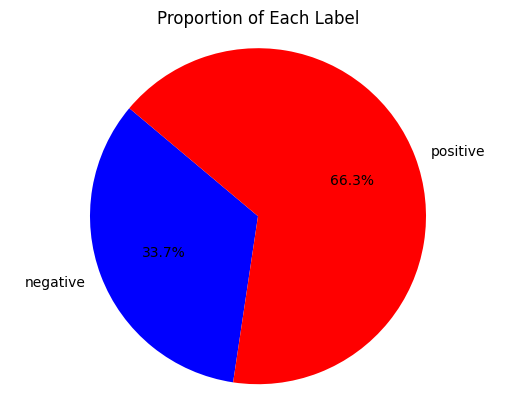

In [124]:
# Check Positive vs Negative Ratio:
label_counts = Counter(df['label'])
labels = {0: 'negative', 1: 'positive'}

# Data to plot
_labels = [labels.get(lab) for lab in label_counts.keys()]
sizes = label_counts.values()
colors = ['blue', 'red']

# Plotting the pie chart
plt.pie(sizes, labels=_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Each Label')
plt.show()

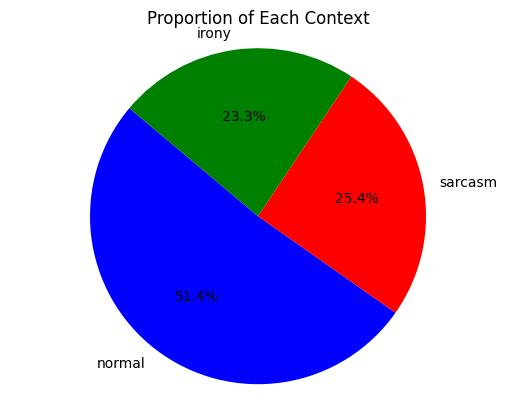

In [125]:
# Check Context Ratio:
label_counts = Counter(df['Context'])
labels = {'Normal': 'normal', 'Sarcasm': 'sarcasm', 'Irony':'irony'}

# Data to plot
_labels = [labels.get(lab) for lab in label_counts.keys()]
sizes = label_counts.values()
colors = ['blue', 'red', 'green']

# Plotting the pie chart
plt.pie(sizes, labels=_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Each Context')
plt.show()

In [126]:
# 5 examples of each tweet category possible, (positive vs negative), (Normal, Irony, Sarcasm)
unique_contexts = df['Context'].unique()

# Iterate over each unique context
for context in unique_contexts:
    print(f"Context: {context}")
    # Filter the DataFrame for the current context
    context_df = df[df['Context'] == context]
    # Filter positive tweets
    positive_tweets = context_df[context_df['label'] == 1]['text'].head(5)
    print("Positive Tweets:")
    for tweet in positive_tweets:
        print(tweet)
    # Filter negative tweets
    negative_tweets = context_df[context_df['label'] == 0]['text'].head(5)
    print("Negative Tweets:")
    for tweet in negative_tweets:
        print(tweet)
    print()

Context: Normal
Positive Tweets:
 Love starting my day with a cup of coffee and some good music! 
 Grateful for the sunny weather today, it's such a mood booster! 
 Just finished a great workout and feeling energized for the day ahead. 
 Spending time with loved ones always puts a smile on my face. 
 Excited to dive into a new book I've been waiting to read! 
Negative Tweets:
 Normal is overrated. 
 Can't stand being average, but that's what normal is all about. 
 Normal is just code for boring. 
 The idea of being normal makes me cringe. 
 Trying to fit in with the norm is exhausting. 

Context: Sarcasm
Positive Tweets:
 I just love when people take up two parking spots. So considerate. 
 I always look forward to getting stuck in traffic. It's the highlight of my day. 
 Ah, nothing like waking up to a pile of dirty dishes in the sink. Pure bliss. 
 Can't get enough of spam emails. They really brighten up my inbox. 
 Oh, I absolutely adore it when my phone dies right in the middle of a

In [127]:
df['text_length'] = 0
df = clean_text(df)

train_data_generated = df["text"]
train_labels_generated = df["label"]

In [128]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(train_labels_generated).reshape(-1, 1)).toarray()

In [129]:
X_train = np.array(train_data_generated)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
bert_model.fit(batches_with_progress, epochs=2, steps_per_epoch=steps_per_epoch)





Epoch:   0%|          | 0/141 [00:00<?, ?it/s]

Epoch 1/2






Epoch:   1%|          | 1/141 [00:33<1:17:02, 33.02s/it]

  1/141 [..............................] - ETA: 1:18:27 - loss: 0.8700 - recall: 0.6250 - precision: 0.6250





Epoch:   2%|▏         | 3/141 [00:33<20:22,  8.86s/it]  

  2/141 [..............................] - ETA: 1:57 - loss: 0.5476 - recall: 0.7500 - precision: 0.7500   





Epoch:   3%|▎         | 4/141 [00:34<13:53,  6.08s/it]

  3/141 [..............................] - ETA: 1:54 - loss: 0.5426 - recall: 0.7917 - precision: 0.7917





Epoch:   4%|▎         | 5/141 [00:35<09:50,  4.34s/it]

  4/141 [..............................] - ETA: 1:49 - loss: 0.5015 - recall: 0.8125 - precision: 0.8125





Epoch:   4%|▍         | 6/141 [00:36<07:10,  3.19s/it]

  5/141 [>.............................] - ETA: 1:49 - loss: 0.5505 - recall: 0.8000 - precision: 0.8000





Epoch:   5%|▍         | 7/141 [00:37<05:27,  2.45s/it]

  6/141 [>.............................] - ETA: 1:50 - loss: 0.4637 - recall: 0.8333 - precision: 0.8333





Epoch:   6%|▌         | 8/141 [00:37<04:19,  1.95s/it]

  7/141 [>.............................] - ETA: 1:49 - loss: 0.4759 - recall: 0.8214 - precision: 0.8214





Epoch:   6%|▋         | 9/141 [00:38<03:32,  1.61s/it]

  8/141 [>.............................] - ETA: 1:48 - loss: 0.4679 - recall: 0.8125 - precision: 0.8125





Epoch:   7%|▋         | 10/141 [00:39<02:57,  1.36s/it]

  9/141 [>.............................] - ETA: 1:46 - loss: 0.4782 - recall: 0.8056 - precision: 0.8056





Epoch:   8%|▊         | 11/141 [00:40<02:33,  1.18s/it]

 10/141 [=>............................] - ETA: 1:45 - loss: 0.4498 - recall: 0.8250 - precision: 0.8250





Epoch:   9%|▊         | 12/141 [00:41<02:17,  1.07s/it]

 11/141 [=>............................] - ETA: 1:44 - loss: 0.4161 - recall: 0.8409 - precision: 0.8409





Epoch:   9%|▉         | 13/141 [00:41<02:06,  1.01it/s]

 12/141 [=>............................] - ETA: 1:43 - loss: 0.4166 - recall: 0.8438 - precision: 0.8438





Epoch:  10%|▉         | 14/141 [00:42<01:57,  1.08it/s]

 13/141 [=>............................] - ETA: 1:42 - loss: 0.4389 - recall: 0.8269 - precision: 0.8269





Epoch:  11%|█         | 15/141 [00:43<01:48,  1.16it/s]

 14/141 [=>............................] - ETA: 1:41 - loss: 0.4367 - recall: 0.8304 - precision: 0.8304





Epoch:  11%|█▏        | 16/141 [00:44<01:45,  1.19it/s]

 15/141 [==>...........................] - ETA: 1:40 - loss: 0.4772 - recall: 0.8250 - precision: 0.8250





Epoch:  12%|█▏        | 17/141 [00:45<01:44,  1.19it/s]

 16/141 [==>...........................] - ETA: 1:39 - loss: 0.4601 - recall: 0.8281 - precision: 0.8281





Epoch:  13%|█▎        | 18/141 [00:45<01:41,  1.21it/s]

 17/141 [==>...........................] - ETA: 1:39 - loss: 0.4465 - recall: 0.8309 - precision: 0.8309





Epoch:  13%|█▎        | 19/141 [00:46<01:40,  1.21it/s]

 18/141 [==>...........................] - ETA: 1:38 - loss: 0.4440 - recall: 0.8264 - precision: 0.8264





Epoch:  14%|█▍        | 20/141 [00:47<01:39,  1.22it/s]

 19/141 [===>..........................] - ETA: 1:37 - loss: 0.4614 - recall: 0.8158 - precision: 0.8158





Epoch:  15%|█▍        | 21/141 [00:48<01:38,  1.22it/s]

 20/141 [===>..........................] - ETA: 1:37 - loss: 0.4648 - recall: 0.8125 - precision: 0.8125





Epoch:  16%|█▌        | 22/141 [00:49<01:38,  1.20it/s]

 21/141 [===>..........................] - ETA: 1:36 - loss: 0.4726 - recall: 0.8036 - precision: 0.8036





Epoch:  16%|█▋        | 23/141 [00:49<01:38,  1.20it/s]

 22/141 [===>..........................] - ETA: 1:36 - loss: 0.4843 - recall: 0.8011 - precision: 0.8011





Epoch:  17%|█▋        | 24/141 [00:50<01:39,  1.18it/s]

 23/141 [===>..........................] - ETA: 1:35 - loss: 0.4720 - recall: 0.8098 - precision: 0.8098





Epoch:  18%|█▊        | 25/141 [00:51<01:36,  1.20it/s]

 24/141 [====>.........................] - ETA: 1:34 - loss: 0.4605 - recall: 0.8125 - precision: 0.8125





Epoch:  18%|█▊        | 26/141 [00:52<01:33,  1.23it/s]

 25/141 [====>.........................] - ETA: 1:34 - loss: 0.4495 - recall: 0.8150 - precision: 0.8150





Epoch:  19%|█▉        | 27/141 [00:53<01:34,  1.21it/s]

 26/141 [====>.........................] - ETA: 1:33 - loss: 0.4559 - recall: 0.8125 - precision: 0.8125





Epoch:  20%|█▉        | 28/141 [00:54<01:32,  1.22it/s]

 27/141 [====>.........................] - ETA: 1:32 - loss: 0.4947 - recall: 0.8056 - precision: 0.8056





Epoch:  21%|██        | 29/141 [00:54<01:31,  1.23it/s]

 28/141 [====>.........................] - ETA: 1:31 - loss: 0.4932 - recall: 0.8036 - precision: 0.8036





Epoch:  21%|██▏       | 30/141 [00:55<01:28,  1.25it/s]

 29/141 [=====>........................] - ETA: 1:30 - loss: 0.4853 - recall: 0.8060 - precision: 0.8060





Epoch:  22%|██▏       | 31/141 [00:56<01:26,  1.27it/s]

 30/141 [=====>........................] - ETA: 1:29 - loss: 0.5002 - recall: 0.8000 - precision: 0.8000





Epoch:  23%|██▎       | 32/141 [00:57<01:25,  1.27it/s]

 31/141 [=====>........................] - ETA: 1:28 - loss: 0.4885 - recall: 0.8065 - precision: 0.8065





Epoch:  23%|██▎       | 33/141 [00:57<01:24,  1.27it/s]

 32/141 [=====>........................] - ETA: 1:27 - loss: 0.4847 - recall: 0.8086 - precision: 0.8086





Epoch:  24%|██▍       | 34/141 [00:58<01:24,  1.26it/s]

 33/141 [======>.......................] - ETA: 1:26 - loss: 0.4856 - recall: 0.8030 - precision: 0.8030





Epoch:  25%|██▍       | 35/141 [00:59<01:24,  1.25it/s]

 34/141 [======>.......................] - ETA: 1:26 - loss: 0.4777 - recall: 0.8051 - precision: 0.8051





Epoch:  26%|██▌       | 36/141 [01:00<01:24,  1.25it/s]

 35/141 [======>.......................] - ETA: 1:25 - loss: 0.4829 - recall: 0.8036 - precision: 0.8036





Epoch:  26%|██▌       | 37/141 [01:01<01:23,  1.25it/s]

 36/141 [======>.......................] - ETA: 1:24 - loss: 0.4756 - recall: 0.8090 - precision: 0.8090





Epoch:  27%|██▋       | 38/141 [01:02<01:22,  1.24it/s]

 37/141 [======>.......................] - ETA: 1:23 - loss: 0.4714 - recall: 0.8108 - precision: 0.8108





Epoch:  28%|██▊       | 39/141 [01:02<01:22,  1.23it/s]

 38/141 [=======>......................] - ETA: 1:22 - loss: 0.4671 - recall: 0.8125 - precision: 0.8125





Epoch:  28%|██▊       | 40/141 [01:03<01:21,  1.24it/s]

 39/141 [=======>......................] - ETA: 1:22 - loss: 0.4603 - recall: 0.8173 - precision: 0.8173





Epoch:  29%|██▉       | 41/141 [01:04<01:19,  1.25it/s]

 40/141 [=======>......................] - ETA: 1:21 - loss: 0.4612 - recall: 0.8125 - precision: 0.8125





Epoch:  30%|██▉       | 42/141 [01:05<01:18,  1.27it/s]

 41/141 [=======>......................] - ETA: 1:20 - loss: 0.4562 - recall: 0.8171 - precision: 0.8171





Epoch:  30%|███       | 43/141 [01:05<01:15,  1.29it/s]

 42/141 [=======>......................] - ETA: 1:19 - loss: 0.4508 - recall: 0.8214 - precision: 0.8214





Epoch:  31%|███       | 44/141 [01:06<01:17,  1.26it/s]

 43/141 [========>.....................] - ETA: 1:18 - loss: 0.4454 - recall: 0.8227 - precision: 0.8227





Epoch:  32%|███▏      | 45/141 [01:07<01:14,  1.28it/s]

 44/141 [========>.....................] - ETA: 1:17 - loss: 0.4371 - recall: 0.8267 - precision: 0.8267





Epoch:  33%|███▎      | 46/141 [01:08<01:12,  1.30it/s]

 45/141 [========>.....................] - ETA: 1:16 - loss: 0.4387 - recall: 0.8250 - precision: 0.8250





Epoch:  33%|███▎      | 47/141 [01:09<01:13,  1.29it/s]

 46/141 [========>.....................] - ETA: 1:16 - loss: 0.4417 - recall: 0.8261 - precision: 0.8261





Epoch:  34%|███▍      | 48/141 [01:09<01:13,  1.27it/s]

 47/141 [=========>....................] - ETA: 1:15 - loss: 0.4409 - recall: 0.8245 - precision: 0.8245





Epoch:  35%|███▍      | 49/141 [01:10<01:11,  1.29it/s]

 48/141 [=========>....................] - ETA: 1:14 - loss: 0.4351 - recall: 0.8255 - precision: 0.8255





Epoch:  35%|███▌      | 50/141 [01:11<01:10,  1.28it/s]

 49/141 [=========>....................] - ETA: 1:13 - loss: 0.4357 - recall: 0.8265 - precision: 0.8265





Epoch:  36%|███▌      | 51/141 [01:12<01:09,  1.29it/s]

 50/141 [=========>....................] - ETA: 1:12 - loss: 0.4345 - recall: 0.8275 - precision: 0.8275





Epoch:  37%|███▋      | 52/141 [01:12<01:10,  1.27it/s]

 51/141 [=========>....................] - ETA: 1:11 - loss: 0.4543 - recall: 0.8235 - precision: 0.8235





Epoch:  38%|███▊      | 53/141 [01:13<01:10,  1.25it/s]

 52/141 [==========>...................] - ETA: 1:11 - loss: 0.4515 - recall: 0.8245 - precision: 0.8245





Epoch:  38%|███▊      | 54/141 [01:14<01:09,  1.25it/s]

 53/141 [==========>...................] - ETA: 1:10 - loss: 0.4494 - recall: 0.8255 - precision: 0.8255





Epoch:  39%|███▉      | 55/141 [01:15<01:07,  1.27it/s]

 54/141 [==========>...................] - ETA: 1:09 - loss: 0.4463 - recall: 0.8264 - precision: 0.8264





Epoch:  40%|███▉      | 56/141 [01:16<01:06,  1.28it/s]

 55/141 [==========>...................] - ETA: 1:08 - loss: 0.4443 - recall: 0.8273 - precision: 0.8273





Epoch:  40%|████      | 57/141 [01:16<01:04,  1.30it/s]

 56/141 [==========>...................] - ETA: 1:07 - loss: 0.4508 - recall: 0.8214 - precision: 0.8214





Epoch:  41%|████      | 58/141 [01:17<01:03,  1.31it/s]

 57/141 [===========>..................] - ETA: 1:06 - loss: 0.4522 - recall: 0.8224 - precision: 0.8224





Epoch:  42%|████▏     | 59/141 [01:18<01:03,  1.28it/s]

 58/141 [===========>..................] - ETA: 1:06 - loss: 0.4540 - recall: 0.8190 - precision: 0.8190





Epoch:  43%|████▎     | 60/141 [01:19<01:03,  1.28it/s]

 59/141 [===========>..................] - ETA: 1:05 - loss: 0.4522 - recall: 0.8199 - precision: 0.8199





Epoch:  43%|████▎     | 61/141 [01:19<01:02,  1.28it/s]

 60/141 [===========>..................] - ETA: 1:04 - loss: 0.4505 - recall: 0.8188 - precision: 0.8188





Epoch:  44%|████▍     | 62/141 [01:20<01:03,  1.24it/s]

 61/141 [===========>..................] - ETA: 1:03 - loss: 0.4471 - recall: 0.8217 - precision: 0.8217





Epoch:  45%|████▍     | 63/141 [01:21<01:02,  1.25it/s]

 62/141 [============>.................] - ETA: 1:03 - loss: 0.4439 - recall: 0.8246 - precision: 0.8246





Epoch:  45%|████▌     | 64/141 [01:22<01:02,  1.23it/s]

 63/141 [============>.................] - ETA: 1:02 - loss: 0.4400 - recall: 0.8274 - precision: 0.8274





Epoch:  46%|████▌     | 65/141 [01:23<01:01,  1.25it/s]

 64/141 [============>.................] - ETA: 1:01 - loss: 0.4369 - recall: 0.8301 - precision: 0.8301





Epoch:  47%|████▋     | 66/141 [01:24<00:59,  1.25it/s]

 65/141 [============>.................] - ETA: 1:00 - loss: 0.4350 - recall: 0.8308 - precision: 0.8308





Epoch:  48%|████▊     | 67/141 [01:24<00:58,  1.27it/s]

 66/141 [=============>................] - ETA: 59s - loss: 0.4345 - recall: 0.8295 - precision: 0.8295 





Epoch:  48%|████▊     | 68/141 [01:25<00:57,  1.28it/s]

 67/141 [=============>................] - ETA: 58s - loss: 0.4359 - recall: 0.8284 - precision: 0.8284





Epoch:  49%|████▉     | 69/141 [01:26<00:55,  1.29it/s]

 68/141 [=============>................] - ETA: 58s - loss: 0.4347 - recall: 0.8290 - precision: 0.8290





Epoch:  50%|████▉     | 70/141 [01:27<00:54,  1.30it/s]

 69/141 [=============>................] - ETA: 57s - loss: 0.4299 - recall: 0.8315 - precision: 0.8315





Epoch:  50%|█████     | 71/141 [01:27<00:54,  1.30it/s]

 70/141 [=============>................] - ETA: 56s - loss: 0.4293 - recall: 0.8321 - precision: 0.8321





Epoch:  51%|█████     | 72/141 [01:28<00:54,  1.27it/s]

 71/141 [==============>...............] - ETA: 55s - loss: 0.4277 - recall: 0.8327 - precision: 0.8327





Epoch:  52%|█████▏    | 73/141 [01:29<00:54,  1.25it/s]

 72/141 [==============>...............] - ETA: 54s - loss: 0.4242 - recall: 0.8351 - precision: 0.8351





Epoch:  52%|█████▏    | 74/141 [01:30<00:53,  1.25it/s]

 73/141 [==============>...............] - ETA: 54s - loss: 0.4231 - recall: 0.8322 - precision: 0.8322





Epoch:  53%|█████▎    | 75/141 [01:31<00:52,  1.25it/s]

 74/141 [==============>...............] - ETA: 53s - loss: 0.4213 - recall: 0.8328 - precision: 0.8328





Epoch:  54%|█████▍    | 76/141 [01:31<00:52,  1.24it/s]

 75/141 [==============>...............] - ETA: 52s - loss: 0.4213 - recall: 0.8333 - precision: 0.8333





Epoch:  55%|█████▍    | 77/141 [01:32<00:51,  1.23it/s]

 76/141 [===============>..............] - ETA: 51s - loss: 0.4210 - recall: 0.8339 - precision: 0.8339





Epoch:  55%|█████▌    | 78/141 [01:33<00:51,  1.23it/s]

 77/141 [===============>..............] - ETA: 51s - loss: 0.4248 - recall: 0.8328 - precision: 0.8328





Epoch:  56%|█████▌    | 79/141 [01:34<00:50,  1.23it/s]

 78/141 [===============>..............] - ETA: 50s - loss: 0.4203 - recall: 0.8349 - precision: 0.8349





Epoch:  57%|█████▋    | 80/141 [01:35<00:49,  1.23it/s]

 79/141 [===============>..............] - ETA: 49s - loss: 0.4204 - recall: 0.8354 - precision: 0.8354





Epoch:  57%|█████▋    | 81/141 [01:36<00:48,  1.23it/s]

 80/141 [================>.............] - ETA: 48s - loss: 0.4193 - recall: 0.8359 - precision: 0.8359





Epoch:  58%|█████▊    | 82/141 [01:36<00:47,  1.24it/s]

 81/141 [================>.............] - ETA: 47s - loss: 0.4197 - recall: 0.8349 - precision: 0.8349





Epoch:  59%|█████▉    | 83/141 [01:37<00:47,  1.21it/s]

 82/141 [================>.............] - ETA: 47s - loss: 0.4152 - recall: 0.8369 - precision: 0.8369





Epoch:  60%|█████▉    | 84/141 [01:38<00:46,  1.23it/s]

 83/141 [================>.............] - ETA: 46s - loss: 0.4139 - recall: 0.8373 - precision: 0.8373





Epoch:  60%|██████    | 85/141 [01:39<00:45,  1.23it/s]

 84/141 [================>.............] - ETA: 45s - loss: 0.4192 - recall: 0.8348 - precision: 0.8348





Epoch:  61%|██████    | 86/141 [01:40<00:44,  1.22it/s]

 85/141 [=================>............] - ETA: 44s - loss: 0.4185 - recall: 0.8353 - precision: 0.8353





Epoch:  62%|██████▏   | 87/141 [01:40<00:44,  1.21it/s]

 86/141 [=================>............] - ETA: 43s - loss: 0.4154 - recall: 0.8372 - precision: 0.8372





Epoch:  62%|██████▏   | 88/141 [01:41<00:43,  1.23it/s]

 87/141 [=================>............] - ETA: 43s - loss: 0.4130 - recall: 0.8376 - precision: 0.8376





Epoch:  63%|██████▎   | 89/141 [01:42<00:42,  1.23it/s]

 88/141 [=================>............] - ETA: 42s - loss: 0.4105 - recall: 0.8381 - precision: 0.8381





Epoch:  64%|██████▍   | 90/141 [01:43<00:41,  1.24it/s]

 89/141 [=================>............] - ETA: 41s - loss: 0.4084 - recall: 0.8399 - precision: 0.8399





Epoch:  65%|██████▍   | 91/141 [01:44<00:40,  1.25it/s]

 90/141 [==================>...........] - ETA: 40s - loss: 0.4073 - recall: 0.8389 - precision: 0.8389





Epoch:  65%|██████▌   | 92/141 [01:44<00:39,  1.25it/s]

 91/141 [==================>...........] - ETA: 39s - loss: 0.4053 - recall: 0.8393 - precision: 0.8393





Epoch:  66%|██████▌   | 93/141 [01:45<00:38,  1.25it/s]

 92/141 [==================>...........] - ETA: 39s - loss: 0.4058 - recall: 0.8383 - precision: 0.8383





Epoch:  67%|██████▋   | 94/141 [01:46<00:36,  1.29it/s]

 93/141 [==================>...........] - ETA: 38s - loss: 0.4057 - recall: 0.8374 - precision: 0.8374





Epoch:  67%|██████▋   | 95/141 [01:47<00:35,  1.31it/s]

 94/141 [===================>..........] - ETA: 37s - loss: 0.4036 - recall: 0.8391 - precision: 0.8391





Epoch:  68%|██████▊   | 96/141 [01:47<00:34,  1.30it/s]

 95/141 [===================>..........] - ETA: 36s - loss: 0.4031 - recall: 0.8395 - precision: 0.8395





Epoch:  69%|██████▉   | 97/141 [01:48<00:34,  1.27it/s]

 96/141 [===================>..........] - ETA: 35s - loss: 0.3990 - recall: 0.8411 - precision: 0.8411





Epoch:  70%|██████▉   | 98/141 [01:49<00:33,  1.27it/s]

 97/141 [===================>..........] - ETA: 35s - loss: 0.3956 - recall: 0.8428 - precision: 0.8428





Epoch:  70%|███████   | 99/141 [01:50<00:32,  1.28it/s]

 98/141 [===================>..........] - ETA: 34s - loss: 0.3926 - recall: 0.8444 - precision: 0.8444





Epoch:  71%|███████   | 100/141 [01:51<00:32,  1.26it/s]

 99/141 [====================>.........] - ETA: 33s - loss: 0.3907 - recall: 0.8447 - precision: 0.8447





Epoch:  72%|███████▏  | 101/141 [01:51<00:31,  1.26it/s]

100/141 [====================>.........] - ETA: 32s - loss: 0.3914 - recall: 0.8450 - precision: 0.8450





Epoch:  72%|███████▏  | 102/141 [01:52<00:30,  1.26it/s]

101/141 [====================>.........] - ETA: 31s - loss: 0.3878 - recall: 0.8465 - precision: 0.8465





Epoch:  73%|███████▎  | 103/141 [01:53<00:29,  1.27it/s]

102/141 [====================>.........] - ETA: 31s - loss: 0.3850 - recall: 0.8480 - precision: 0.8480





Epoch:  74%|███████▍  | 104/141 [01:54<00:29,  1.27it/s]

103/141 [====================>.........] - ETA: 30s - loss: 0.3813 - recall: 0.8495 - precision: 0.8495





Epoch:  74%|███████▍  | 105/141 [01:55<00:27,  1.29it/s]

104/141 [=====================>........] - ETA: 29s - loss: 0.3792 - recall: 0.8510 - precision: 0.8510





Epoch:  75%|███████▌  | 106/141 [01:55<00:27,  1.29it/s]

105/141 [=====================>........] - ETA: 28s - loss: 0.3789 - recall: 0.8500 - precision: 0.8500





Epoch:  76%|███████▌  | 107/141 [01:56<00:25,  1.31it/s]

106/141 [=====================>........] - ETA: 27s - loss: 0.3782 - recall: 0.8502 - precision: 0.8502





Epoch:  77%|███████▋  | 108/141 [01:57<00:25,  1.32it/s]

107/141 [=====================>........] - ETA: 27s - loss: 0.3749 - recall: 0.8516 - precision: 0.8516





Epoch:  77%|███████▋  | 109/141 [01:58<00:24,  1.30it/s]

108/141 [=====================>........] - ETA: 26s - loss: 0.3733 - recall: 0.8519 - precision: 0.8519





Epoch:  78%|███████▊  | 110/141 [01:58<00:24,  1.29it/s]

109/141 [======================>.......] - ETA: 25s - loss: 0.3751 - recall: 0.8509 - precision: 0.8509





Epoch:  79%|███████▊  | 111/141 [01:59<00:23,  1.29it/s]

110/141 [======================>.......] - ETA: 24s - loss: 0.3723 - recall: 0.8523 - precision: 0.8523





Epoch:  79%|███████▉  | 112/141 [02:00<00:22,  1.30it/s]

111/141 [======================>.......] - ETA: 23s - loss: 0.3758 - recall: 0.8514 - precision: 0.8514





Epoch:  80%|████████  | 113/141 [02:01<00:21,  1.32it/s]

112/141 [======================>.......] - ETA: 23s - loss: 0.3739 - recall: 0.8516 - precision: 0.8516





Epoch:  81%|████████  | 114/141 [02:01<00:20,  1.30it/s]

113/141 [=======================>......] - ETA: 22s - loss: 0.3716 - recall: 0.8518 - precision: 0.8518





Epoch:  82%|████████▏ | 115/141 [02:02<00:20,  1.28it/s]

114/141 [=======================>......] - ETA: 21s - loss: 0.3719 - recall: 0.8520 - precision: 0.8520





Epoch:  82%|████████▏ | 116/141 [02:03<00:19,  1.27it/s]

115/141 [=======================>......] - ETA: 20s - loss: 0.3719 - recall: 0.8522 - precision: 0.8522





Epoch:  83%|████████▎ | 117/141 [02:04<00:18,  1.31it/s]

116/141 [=======================>......] - ETA: 19s - loss: 0.3692 - recall: 0.8534 - precision: 0.8534





Epoch:  84%|████████▎ | 118/141 [02:05<00:17,  1.32it/s]

117/141 [=======================>......] - ETA: 19s - loss: 0.3674 - recall: 0.8536 - precision: 0.8536





Epoch:  84%|████████▍ | 119/141 [02:05<00:16,  1.30it/s]

118/141 [========================>.....] - ETA: 18s - loss: 0.3650 - recall: 0.8549 - precision: 0.8549





Epoch:  85%|████████▌ | 120/141 [02:06<00:16,  1.30it/s]

119/141 [========================>.....] - ETA: 17s - loss: 0.3668 - recall: 0.8540 - precision: 0.8540





Epoch:  86%|████████▌ | 121/141 [02:07<00:15,  1.30it/s]

120/141 [========================>.....] - ETA: 16s - loss: 0.3690 - recall: 0.8542 - precision: 0.8542





Epoch:  87%|████████▋ | 122/141 [02:08<00:14,  1.27it/s]

121/141 [========================>.....] - ETA: 15s - loss: 0.3669 - recall: 0.8554 - precision: 0.8554





Epoch:  87%|████████▋ | 123/141 [02:09<00:14,  1.24it/s]

122/141 [========================>.....] - ETA: 15s - loss: 0.3658 - recall: 0.8555 - precision: 0.8555





Epoch:  88%|████████▊ | 124/141 [02:09<00:13,  1.25it/s]

123/141 [=========================>....] - ETA: 14s - loss: 0.3643 - recall: 0.8567 - precision: 0.8567





Epoch:  89%|████████▊ | 125/141 [02:10<00:12,  1.28it/s]

124/141 [=========================>....] - ETA: 13s - loss: 0.3628 - recall: 0.8569 - precision: 0.8569





Epoch:  89%|████████▉ | 126/141 [02:11<00:11,  1.30it/s]

125/141 [=========================>....] - ETA: 12s - loss: 0.3628 - recall: 0.8560 - precision: 0.8560





Epoch:  90%|█████████ | 127/141 [02:12<00:10,  1.30it/s]

126/141 [=========================>....] - ETA: 11s - loss: 0.3643 - recall: 0.8562 - precision: 0.8562





Epoch:  91%|█████████ | 128/141 [02:12<00:09,  1.30it/s]

127/141 [==========================>...] - ETA: 11s - loss: 0.3621 - recall: 0.8573 - precision: 0.8573





Epoch:  91%|█████████▏| 129/141 [02:13<00:09,  1.32it/s]

128/141 [==========================>...] - ETA: 10s - loss: 0.3595 - recall: 0.8584 - precision: 0.8584





Epoch:  92%|█████████▏| 130/141 [02:14<00:08,  1.32it/s]

129/141 [==========================>...] - ETA: 9s - loss: 0.3583 - recall: 0.8585 - precision: 0.8585 





Epoch:  93%|█████████▎| 131/141 [02:15<00:07,  1.28it/s]

130/141 [==========================>...] - ETA: 8s - loss: 0.3574 - recall: 0.8587 - precision: 0.8587





Epoch:  94%|█████████▎| 132/141 [02:15<00:06,  1.29it/s]

131/141 [==========================>...] - ETA: 7s - loss: 0.3556 - recall: 0.8597 - precision: 0.8597





Epoch:  94%|█████████▍| 133/141 [02:16<00:06,  1.29it/s]

132/141 [===========================>..] - ETA: 7s - loss: 0.3546 - recall: 0.8598 - precision: 0.8598





Epoch:  95%|█████████▌| 134/141 [02:17<00:05,  1.29it/s]

133/141 [===========================>..] - ETA: 6s - loss: 0.3557 - recall: 0.8590 - precision: 0.8590





Epoch:  96%|█████████▌| 135/141 [02:18<00:04,  1.31it/s]

134/141 [===========================>..] - ETA: 5s - loss: 0.3596 - recall: 0.8573 - precision: 0.8573





Epoch:  96%|█████████▋| 136/141 [02:19<00:03,  1.29it/s]

135/141 [===========================>..] - ETA: 4s - loss: 0.3579 - recall: 0.8574 - precision: 0.8574





Epoch:  97%|█████████▋| 137/141 [02:19<00:03,  1.29it/s]

136/141 [===========================>..] - ETA: 3s - loss: 0.3568 - recall: 0.8575 - precision: 0.8575





Epoch:  98%|█████████▊| 138/141 [02:20<00:02,  1.28it/s]

137/141 [============================>.] - ETA: 3s - loss: 0.3550 - recall: 0.8586 - precision: 0.8586





Epoch:  99%|█████████▊| 139/141 [02:21<00:01,  1.31it/s]

138/141 [============================>.] - ETA: 2s - loss: 0.3534 - recall: 0.8596 - precision: 0.8596





Epoch:  99%|█████████▉| 140/141 [02:22<00:00,  1.31it/s]

139/141 [============================>.] - ETA: 1s - loss: 0.3524 - recall: 0.8597 - precision: 0.8597





Epoch: 100%|██████████| 141/141 [02:22<00:00,  1.30it/s]

140/141 [============================>.] - ETA: 0s - loss: 0.3516 - recall: 0.8598 - precision: 0.8598





Epoch: 142it [02:23,  1.33it/s]                         

141/141 [==============================] - 144s 790ms/step - loss: 0.3519 - recall: 0.8599 - precision: 0.8599
Epoch 2/2






Epoch: 143it [02:24,  1.31it/s]

  1/141 [..............................] - ETA: 1:37 - loss: 0.3907 - recall: 0.8571 - precision: 0.8571





Epoch: 144it [02:25,  1.35it/s]

  2/141 [..............................] - ETA: 1:43 - loss: 0.2087 - recall: 0.9333 - precision: 0.9333





Epoch: 145it [02:25,  1.35it/s]

  3/141 [..............................] - ETA: 1:43 - loss: 0.1453 - recall: 0.9565 - precision: 0.9565





Epoch: 146it [02:26,  1.34it/s]

  4/141 [..............................] - ETA: 1:43 - loss: 0.1097 - recall: 0.9677 - precision: 0.9677





Epoch: 147it [02:27,  1.33it/s]

  5/141 [>.............................] - ETA: 1:43 - loss: 0.0968 - recall: 0.9744 - precision: 0.9744





Epoch: 148it [02:28,  1.31it/s]

  6/141 [>.............................] - ETA: 1:42 - loss: 0.1221 - recall: 0.9574 - precision: 0.9574





Epoch: 149it [02:28,  1.31it/s]

  7/141 [>.............................] - ETA: 1:42 - loss: 0.1200 - recall: 0.9636 - precision: 0.9636





Epoch: 150it [02:29,  1.30it/s]

  8/141 [>.............................] - ETA: 1:41 - loss: 0.1265 - recall: 0.9524 - precision: 0.9524





Epoch: 151it [02:30,  1.30it/s]

  9/141 [>.............................] - ETA: 1:40 - loss: 0.1188 - recall: 0.9577 - precision: 0.9577





Epoch: 152it [02:31,  1.31it/s]

 10/141 [=>............................] - ETA: 1:40 - loss: 0.1098 - recall: 0.9620 - precision: 0.9620





Epoch: 153it [02:32,  1.28it/s]

 11/141 [=>............................] - ETA: 1:40 - loss: 0.1091 - recall: 0.9540 - precision: 0.9540





Epoch: 154it [02:32,  1.29it/s]

 12/141 [=>............................] - ETA: 1:39 - loss: 0.1032 - recall: 0.9579 - precision: 0.9579





Epoch: 155it [02:33,  1.29it/s]

 13/141 [=>............................] - ETA: 1:38 - loss: 0.1347 - recall: 0.9417 - precision: 0.9417





Epoch: 156it [02:34,  1.30it/s]

 14/141 [=>............................] - ETA: 1:37 - loss: 0.1253 - recall: 0.9459 - precision: 0.9459





Epoch: 157it [02:35,  1.30it/s]

 15/141 [==>...........................] - ETA: 1:36 - loss: 0.1183 - recall: 0.9496 - precision: 0.9496





Epoch: 158it [02:35,  1.31it/s]

 16/141 [==>...........................] - ETA: 1:35 - loss: 0.1184 - recall: 0.9528 - precision: 0.9528





Epoch: 159it [02:36,  1.31it/s]

 17/141 [==>...........................] - ETA: 1:34 - loss: 0.1226 - recall: 0.9481 - precision: 0.9481





Epoch: 160it [02:37,  1.33it/s]

 18/141 [==>...........................] - ETA: 1:34 - loss: 0.1176 - recall: 0.9510 - precision: 0.9510





Epoch: 161it [02:38,  1.32it/s]

 19/141 [===>..........................] - ETA: 1:33 - loss: 0.1194 - recall: 0.9470 - precision: 0.9470





Epoch: 162it [02:38,  1.29it/s]

 20/141 [===>..........................] - ETA: 1:33 - loss: 0.1160 - recall: 0.9497 - precision: 0.9497





Epoch: 163it [02:39,  1.27it/s]

 21/141 [===>..........................] - ETA: 1:32 - loss: 0.1105 - recall: 0.9521 - precision: 0.9521





Epoch: 164it [02:40,  1.27it/s]

 22/141 [===>..........................] - ETA: 1:31 - loss: 0.1115 - recall: 0.9486 - precision: 0.9486





Epoch: 165it [02:41,  1.28it/s]

 23/141 [===>..........................] - ETA: 1:30 - loss: 0.1084 - recall: 0.9508 - precision: 0.9508





Epoch: 166it [02:42,  1.29it/s]

 24/141 [====>.........................] - ETA: 1:30 - loss: 0.1051 - recall: 0.9529 - precision: 0.9529





Epoch: 167it [02:42,  1.28it/s]

 25/141 [====>.........................] - ETA: 1:29 - loss: 0.1056 - recall: 0.9497 - precision: 0.9497





Epoch: 168it [02:43,  1.28it/s]

 26/141 [====>.........................] - ETA: 1:28 - loss: 0.1132 - recall: 0.9469 - precision: 0.9469





Epoch: 169it [02:44,  1.30it/s]

 27/141 [====>.........................] - ETA: 1:28 - loss: 0.1092 - recall: 0.9488 - precision: 0.9488





Epoch: 170it [02:45,  1.26it/s]

 28/141 [====>.........................] - ETA: 1:27 - loss: 0.1058 - recall: 0.9507 - precision: 0.9507





Epoch: 171it [02:45,  1.26it/s]

 29/141 [=====>........................] - ETA: 1:26 - loss: 0.1102 - recall: 0.9481 - precision: 0.9481





Epoch: 172it [02:46,  1.26it/s]

 30/141 [=====>........................] - ETA: 1:26 - loss: 0.1110 - recall: 0.9498 - precision: 0.9498





Epoch: 173it [02:47,  1.27it/s]

 31/141 [=====>........................] - ETA: 1:25 - loss: 0.1089 - recall: 0.9514 - precision: 0.9514





Epoch: 174it [02:48,  1.27it/s]

 32/141 [=====>........................] - ETA: 1:24 - loss: 0.1106 - recall: 0.9490 - precision: 0.9490





Epoch: 175it [02:49,  1.25it/s]

 33/141 [======>.......................] - ETA: 1:23 - loss: 0.1082 - recall: 0.9506 - precision: 0.9506





Epoch: 176it [02:49,  1.26it/s]

 34/141 [======>.......................] - ETA: 1:23 - loss: 0.1078 - recall: 0.9520 - precision: 0.9520





Epoch: 177it [02:50,  1.24it/s]

 35/141 [======>.......................] - ETA: 1:22 - loss: 0.1047 - recall: 0.9534 - precision: 0.9534





Epoch: 178it [02:51,  1.24it/s]

 36/141 [======>.......................] - ETA: 1:21 - loss: 0.1033 - recall: 0.9547 - precision: 0.9547





Epoch: 179it [02:52,  1.24it/s]

 37/141 [======>.......................] - ETA: 1:21 - loss: 0.1025 - recall: 0.9559 - precision: 0.9559





Epoch: 180it [02:53,  1.26it/s]

 38/141 [=======>......................] - ETA: 1:20 - loss: 0.1002 - recall: 0.9571 - precision: 0.9571





Epoch: 181it [02:53,  1.26it/s]

 39/141 [=======>......................] - ETA: 1:19 - loss: 0.1138 - recall: 0.9550 - precision: 0.9550





Epoch: 182it [02:54,  1.27it/s]

 40/141 [=======>......................] - ETA: 1:18 - loss: 0.1128 - recall: 0.9561 - precision: 0.9561





Epoch: 183it [02:55,  1.26it/s]

 41/141 [=======>......................] - ETA: 1:18 - loss: 0.1126 - recall: 0.9541 - precision: 0.9541





Epoch: 184it [02:56,  1.28it/s]

 42/141 [=======>......................] - ETA: 1:17 - loss: 0.1289 - recall: 0.9493 - precision: 0.9493





Epoch: 185it [02:56,  1.32it/s]

 43/141 [========>.....................] - ETA: 1:16 - loss: 0.1264 - recall: 0.9504 - precision: 0.9504





Epoch: 186it [02:57,  1.33it/s]

 44/141 [========>.....................] - ETA: 1:15 - loss: 0.1236 - recall: 0.9516 - precision: 0.9516





Epoch: 187it [02:58,  1.35it/s]

 45/141 [========>.....................] - ETA: 1:14 - loss: 0.1260 - recall: 0.9499 - precision: 0.9499





Epoch: 188it [02:59,  1.30it/s]

 46/141 [========>.....................] - ETA: 1:13 - loss: 0.1255 - recall: 0.9482 - precision: 0.9482





Epoch: 189it [03:00,  1.27it/s]

 47/141 [=========>....................] - ETA: 1:13 - loss: 0.1247 - recall: 0.9467 - precision: 0.9467





Epoch: 190it [03:00,  1.27it/s]

 48/141 [=========>....................] - ETA: 1:12 - loss: 0.1350 - recall: 0.9452 - precision: 0.9452





Epoch: 191it [03:01,  1.28it/s]

 49/141 [=========>....................] - ETA: 1:11 - loss: 0.1336 - recall: 0.9463 - precision: 0.9463





Epoch: 192it [03:02,  1.26it/s]

 50/141 [=========>....................] - ETA: 1:10 - loss: 0.1309 - recall: 0.9474 - precision: 0.9474





Epoch: 193it [03:03,  1.27it/s]

 51/141 [=========>....................] - ETA: 1:10 - loss: 0.1298 - recall: 0.9484 - precision: 0.9484





Epoch: 194it [03:04,  1.26it/s]

 52/141 [==========>...................] - ETA: 1:09 - loss: 0.1446 - recall: 0.9446 - precision: 0.9446





Epoch: 195it [03:04,  1.28it/s]

 53/141 [==========>...................] - ETA: 1:08 - loss: 0.1424 - recall: 0.9456 - precision: 0.9456





Epoch: 196it [03:05,  1.28it/s]

 54/141 [==========>...................] - ETA: 1:07 - loss: 0.1398 - recall: 0.9466 - precision: 0.9466





Epoch: 197it [03:06,  1.31it/s]

 55/141 [==========>...................] - ETA: 1:06 - loss: 0.1416 - recall: 0.9453 - precision: 0.9453





Epoch: 198it [03:07,  1.32it/s]

 56/141 [==========>...................] - ETA: 1:06 - loss: 0.1415 - recall: 0.9441 - precision: 0.9441





Epoch: 199it [03:07,  1.32it/s]

 57/141 [===========>..................] - ETA: 1:05 - loss: 0.1423 - recall: 0.9429 - precision: 0.9429





Epoch: 200it [03:08,  1.30it/s]

 58/141 [===========>..................] - ETA: 1:04 - loss: 0.1416 - recall: 0.9417 - precision: 0.9417





Epoch: 201it [03:09,  1.28it/s]

 59/141 [===========>..................] - ETA: 1:03 - loss: 0.1394 - recall: 0.9427 - precision: 0.9427





Epoch: 202it [03:10,  1.30it/s]

 60/141 [===========>..................] - ETA: 1:02 - loss: 0.1371 - recall: 0.9436 - precision: 0.9436





Epoch: 203it [03:10,  1.30it/s]

 61/141 [===========>..................] - ETA: 1:02 - loss: 0.1390 - recall: 0.9425 - precision: 0.9425





Epoch: 204it [03:11,  1.31it/s]

 62/141 [============>.................] - ETA: 1:01 - loss: 0.1384 - recall: 0.9414 - precision: 0.9414





Epoch: 205it [03:12,  1.32it/s]

 63/141 [============>.................] - ETA: 1:00 - loss: 0.1434 - recall: 0.9384 - precision: 0.9384





Epoch: 206it [03:13,  1.33it/s]

 64/141 [============>.................] - ETA: 59s - loss: 0.1463 - recall: 0.9354 - precision: 0.9354 





Epoch: 207it [03:13,  1.34it/s]

 65/141 [============>.................] - ETA: 58s - loss: 0.1453 - recall: 0.9364 - precision: 0.9364





Epoch: 208it [03:14,  1.33it/s]

 66/141 [=============>................] - ETA: 58s - loss: 0.1439 - recall: 0.9374 - precision: 0.9374





Epoch: 209it [03:15,  1.33it/s]

 67/141 [=============>................] - ETA: 57s - loss: 0.1418 - recall: 0.9383 - precision: 0.9383





Epoch: 210it [03:16,  1.31it/s]

 68/141 [=============>................] - ETA: 56s - loss: 0.1399 - recall: 0.9392 - precision: 0.9392





Epoch: 211it [03:16,  1.33it/s]

 69/141 [=============>................] - ETA: 55s - loss: 0.1383 - recall: 0.9401 - precision: 0.9401





Epoch: 212it [03:17,  1.32it/s]

 70/141 [=============>................] - ETA: 54s - loss: 0.1423 - recall: 0.9392 - precision: 0.9392





Epoch: 213it [03:18,  1.33it/s]

 71/141 [==============>...............] - ETA: 54s - loss: 0.1407 - recall: 0.9400 - precision: 0.9400





Epoch: 214it [03:19,  1.34it/s]

 72/141 [==============>...............] - ETA: 53s - loss: 0.1403 - recall: 0.9391 - precision: 0.9391





Epoch: 215it [03:19,  1.34it/s]

 73/141 [==============>...............] - ETA: 52s - loss: 0.1433 - recall: 0.9383 - precision: 0.9383





Epoch: 216it [03:20,  1.32it/s]

 74/141 [==============>...............] - ETA: 51s - loss: 0.1450 - recall: 0.9374 - precision: 0.9374





Epoch: 217it [03:21,  1.33it/s]

 75/141 [==============>...............] - ETA: 50s - loss: 0.1450 - recall: 0.9382 - precision: 0.9382





Epoch: 218it [03:22,  1.32it/s]

 76/141 [===============>..............] - ETA: 50s - loss: 0.1465 - recall: 0.9390 - precision: 0.9390





Epoch: 219it [03:23,  1.28it/s]

 77/141 [===============>..............] - ETA: 49s - loss: 0.1473 - recall: 0.9382 - precision: 0.9382





Epoch: 220it [03:23,  1.26it/s]

 78/141 [===============>..............] - ETA: 48s - loss: 0.1468 - recall: 0.9374 - precision: 0.9374





Epoch: 221it [03:24,  1.27it/s]

 79/141 [===============>..............] - ETA: 47s - loss: 0.1509 - recall: 0.9366 - precision: 0.9366





Epoch: 222it [03:25,  1.30it/s]

 80/141 [================>.............] - ETA: 47s - loss: 0.1525 - recall: 0.9343 - precision: 0.9343





Epoch: 223it [03:26,  1.31it/s]

 81/141 [================>.............] - ETA: 46s - loss: 0.1511 - recall: 0.9351 - precision: 0.9351





Epoch: 224it [03:26,  1.25it/s]

 82/141 [================>.............] - ETA: 45s - loss: 0.1496 - recall: 0.9359 - precision: 0.9359





Epoch: 225it [03:27,  1.28it/s]

 83/141 [================>.............] - ETA: 44s - loss: 0.1496 - recall: 0.9351 - precision: 0.9351





Epoch: 226it [03:28,  1.30it/s]

 84/141 [================>.............] - ETA: 44s - loss: 0.1479 - recall: 0.9359 - precision: 0.9359





Epoch: 227it [03:29,  1.32it/s]

 85/141 [=================>............] - ETA: 43s - loss: 0.1471 - recall: 0.9367 - precision: 0.9367





Epoch: 228it [03:30,  1.27it/s]

 86/141 [=================>............] - ETA: 42s - loss: 0.1460 - recall: 0.9374 - precision: 0.9374





Epoch: 229it [03:30,  1.28it/s]

 87/141 [=================>............] - ETA: 41s - loss: 0.1448 - recall: 0.9381 - precision: 0.9381





Epoch: 230it [03:31,  1.28it/s]

 88/141 [=================>............] - ETA: 41s - loss: 0.1444 - recall: 0.9388 - precision: 0.9388





Epoch: 231it [03:32,  1.28it/s]

 89/141 [=================>............] - ETA: 40s - loss: 0.1430 - recall: 0.9395 - precision: 0.9395





Epoch: 232it [03:33,  1.29it/s]

 90/141 [==================>...........] - ETA: 39s - loss: 0.1424 - recall: 0.9402 - precision: 0.9402





Epoch: 233it [03:33,  1.31it/s]

 91/141 [==================>...........] - ETA: 38s - loss: 0.1409 - recall: 0.9409 - precision: 0.9409





Epoch: 234it [03:34,  1.30it/s]

 92/141 [==================>...........] - ETA: 37s - loss: 0.1407 - recall: 0.9415 - precision: 0.9415





Epoch: 235it [03:35,  1.30it/s]

 93/141 [==================>...........] - ETA: 37s - loss: 0.1407 - recall: 0.9408 - precision: 0.9408





Epoch: 236it [03:36,  1.33it/s]

 94/141 [===================>..........] - ETA: 36s - loss: 0.1394 - recall: 0.9414 - precision: 0.9414





Epoch: 237it [03:36,  1.33it/s]

 95/141 [===================>..........] - ETA: 35s - loss: 0.1396 - recall: 0.9407 - precision: 0.9407





Epoch: 238it [03:37,  1.33it/s]

 96/141 [===================>..........] - ETA: 34s - loss: 0.1390 - recall: 0.9413 - precision: 0.9413





Epoch: 239it [03:38,  1.34it/s]

 97/141 [===================>..........] - ETA: 33s - loss: 0.1376 - recall: 0.9419 - precision: 0.9419





Epoch: 240it [03:39,  1.28it/s]

 98/141 [===================>..........] - ETA: 33s - loss: 0.1367 - recall: 0.9425 - precision: 0.9425





Epoch: 241it [03:40,  1.26it/s]

 99/141 [====================>.........] - ETA: 32s - loss: 0.1373 - recall: 0.9418 - precision: 0.9418





Epoch: 242it [03:40,  1.27it/s]

100/141 [====================>.........] - ETA: 31s - loss: 0.1359 - recall: 0.9424 - precision: 0.9424





Epoch: 243it [03:41,  1.25it/s]

101/141 [====================>.........] - ETA: 30s - loss: 0.1388 - recall: 0.9418 - precision: 0.9418





Epoch: 244it [03:42,  1.27it/s]

102/141 [====================>.........] - ETA: 30s - loss: 0.1374 - recall: 0.9423 - precision: 0.9423





Epoch: 245it [03:43,  1.28it/s]

103/141 [====================>.........] - ETA: 29s - loss: 0.1371 - recall: 0.9417 - precision: 0.9417





Epoch: 246it [03:44,  1.26it/s]

104/141 [=====================>........] - ETA: 28s - loss: 0.1381 - recall: 0.9410 - precision: 0.9410





Epoch: 247it [03:44,  1.26it/s]

105/141 [=====================>........] - ETA: 27s - loss: 0.1369 - recall: 0.9416 - precision: 0.9416





Epoch: 248it [03:45,  1.26it/s]

106/141 [=====================>........] - ETA: 27s - loss: 0.1360 - recall: 0.9421 - precision: 0.9421





Epoch: 249it [03:46,  1.28it/s]

107/141 [=====================>........] - ETA: 26s - loss: 0.1350 - recall: 0.9427 - precision: 0.9427





Epoch: 250it [03:47,  1.28it/s]

108/141 [=====================>........] - ETA: 25s - loss: 0.1338 - recall: 0.9432 - precision: 0.9432





Epoch: 251it [03:47,  1.29it/s]

109/141 [======================>.......] - ETA: 24s - loss: 0.1326 - recall: 0.9437 - precision: 0.9437





Epoch: 252it [03:48,  1.28it/s]

110/141 [======================>.......] - ETA: 24s - loss: 0.1315 - recall: 0.9443 - precision: 0.9443





Epoch: 253it [03:49,  1.28it/s]

111/141 [======================>.......] - ETA: 23s - loss: 0.1366 - recall: 0.9436 - precision: 0.9436





Epoch: 254it [03:50,  1.28it/s]

112/141 [======================>.......] - ETA: 22s - loss: 0.1384 - recall: 0.9430 - precision: 0.9430





Epoch: 255it [03:51,  1.27it/s]

113/141 [=======================>......] - ETA: 21s - loss: 0.1383 - recall: 0.9424 - precision: 0.9424





Epoch: 256it [03:51,  1.26it/s]

114/141 [=======================>......] - ETA: 20s - loss: 0.1379 - recall: 0.9418 - precision: 0.9418





Epoch: 257it [03:52,  1.24it/s]

115/141 [=======================>......] - ETA: 20s - loss: 0.1391 - recall: 0.9412 - precision: 0.9412





Epoch: 258it [03:53,  1.24it/s]

116/141 [=======================>......] - ETA: 19s - loss: 0.1390 - recall: 0.9407 - precision: 0.9407





Epoch: 259it [03:54,  1.25it/s]

117/141 [=======================>......] - ETA: 18s - loss: 0.1379 - recall: 0.9412 - precision: 0.9412





Epoch: 260it [03:55,  1.27it/s]

118/141 [========================>.....] - ETA: 17s - loss: 0.1369 - recall: 0.9417 - precision: 0.9417





Epoch: 261it [03:55,  1.28it/s]

119/141 [========================>.....] - ETA: 17s - loss: 0.1358 - recall: 0.9422 - precision: 0.9422





Epoch: 262it [03:56,  1.29it/s]

120/141 [========================>.....] - ETA: 16s - loss: 0.1351 - recall: 0.9426 - precision: 0.9426





Epoch: 263it [03:57,  1.30it/s]

121/141 [========================>.....] - ETA: 15s - loss: 0.1344 - recall: 0.9431 - precision: 0.9431





Epoch: 264it [03:58,  1.31it/s]

122/141 [========================>.....] - ETA: 14s - loss: 0.1339 - recall: 0.9436 - precision: 0.9436





Epoch: 265it [03:58,  1.30it/s]

123/141 [=========================>....] - ETA: 13s - loss: 0.1356 - recall: 0.9430 - precision: 0.9430





Epoch: 266it [03:59,  1.28it/s]

124/141 [=========================>....] - ETA: 13s - loss: 0.1355 - recall: 0.9425 - precision: 0.9425





Epoch: 267it [04:00,  1.26it/s]

125/141 [=========================>....] - ETA: 12s - loss: 0.1360 - recall: 0.9419 - precision: 0.9419





Epoch: 268it [04:01,  1.27it/s]

126/141 [=========================>....] - ETA: 11s - loss: 0.1351 - recall: 0.9424 - precision: 0.9424





Epoch: 269it [04:02,  1.26it/s]

127/141 [==========================>...] - ETA: 10s - loss: 0.1342 - recall: 0.9429 - precision: 0.9429





Epoch: 270it [04:02,  1.25it/s]

128/141 [==========================>...] - ETA: 10s - loss: 0.1336 - recall: 0.9433 - precision: 0.9433





Epoch: 271it [04:03,  1.27it/s]

129/141 [==========================>...] - ETA: 9s - loss: 0.1328 - recall: 0.9437 - precision: 0.9437 





Epoch: 272it [04:04,  1.29it/s]

130/141 [==========================>...] - ETA: 8s - loss: 0.1334 - recall: 0.9432 - precision: 0.9432





Epoch: 273it [04:05,  1.31it/s]

131/141 [==========================>...] - ETA: 7s - loss: 0.1336 - recall: 0.9427 - precision: 0.9427





Epoch: 274it [04:05,  1.30it/s]

132/141 [===========================>..] - ETA: 6s - loss: 0.1326 - recall: 0.9431 - precision: 0.9431





Epoch: 275it [04:06,  1.29it/s]

133/141 [===========================>..] - ETA: 6s - loss: 0.1332 - recall: 0.9426 - precision: 0.9426





Epoch: 276it [04:07,  1.33it/s]

134/141 [===========================>..] - ETA: 5s - loss: 0.1329 - recall: 0.9430 - precision: 0.9430





Epoch: 277it [04:08,  1.33it/s]

135/141 [===========================>..] - ETA: 4s - loss: 0.1336 - recall: 0.9425 - precision: 0.9425





Epoch: 278it [04:08,  1.32it/s]

136/141 [===========================>..] - ETA: 3s - loss: 0.1329 - recall: 0.9430 - precision: 0.9430





Epoch: 279it [04:09,  1.29it/s]

137/141 [============================>.] - ETA: 3s - loss: 0.1333 - recall: 0.9425 - precision: 0.9425





Epoch: 280it [04:10,  1.31it/s]

138/141 [============================>.] - ETA: 2s - loss: 0.1326 - recall: 0.9429 - precision: 0.9429





Epoch: 281it [04:11,  1.32it/s]

139/141 [============================>.] - ETA: 1s - loss: 0.1384 - recall: 0.9406 - precision: 0.9406





Epoch: 282it [04:11,  1.34it/s]

140/141 [============================>.] - ETA: 0s - loss: 0.1375 - recall: 0.9410 - precision: 0.9410





Epoch: 283it [04:12,  1.31it/s]

141/141 [==============================] - 109s 775ms/step - loss: 0.1369 - recall: 0.9414 - precision: 0.9414


In [130]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data_clean),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)

97/97 [==============================] - 43s 410ms/step


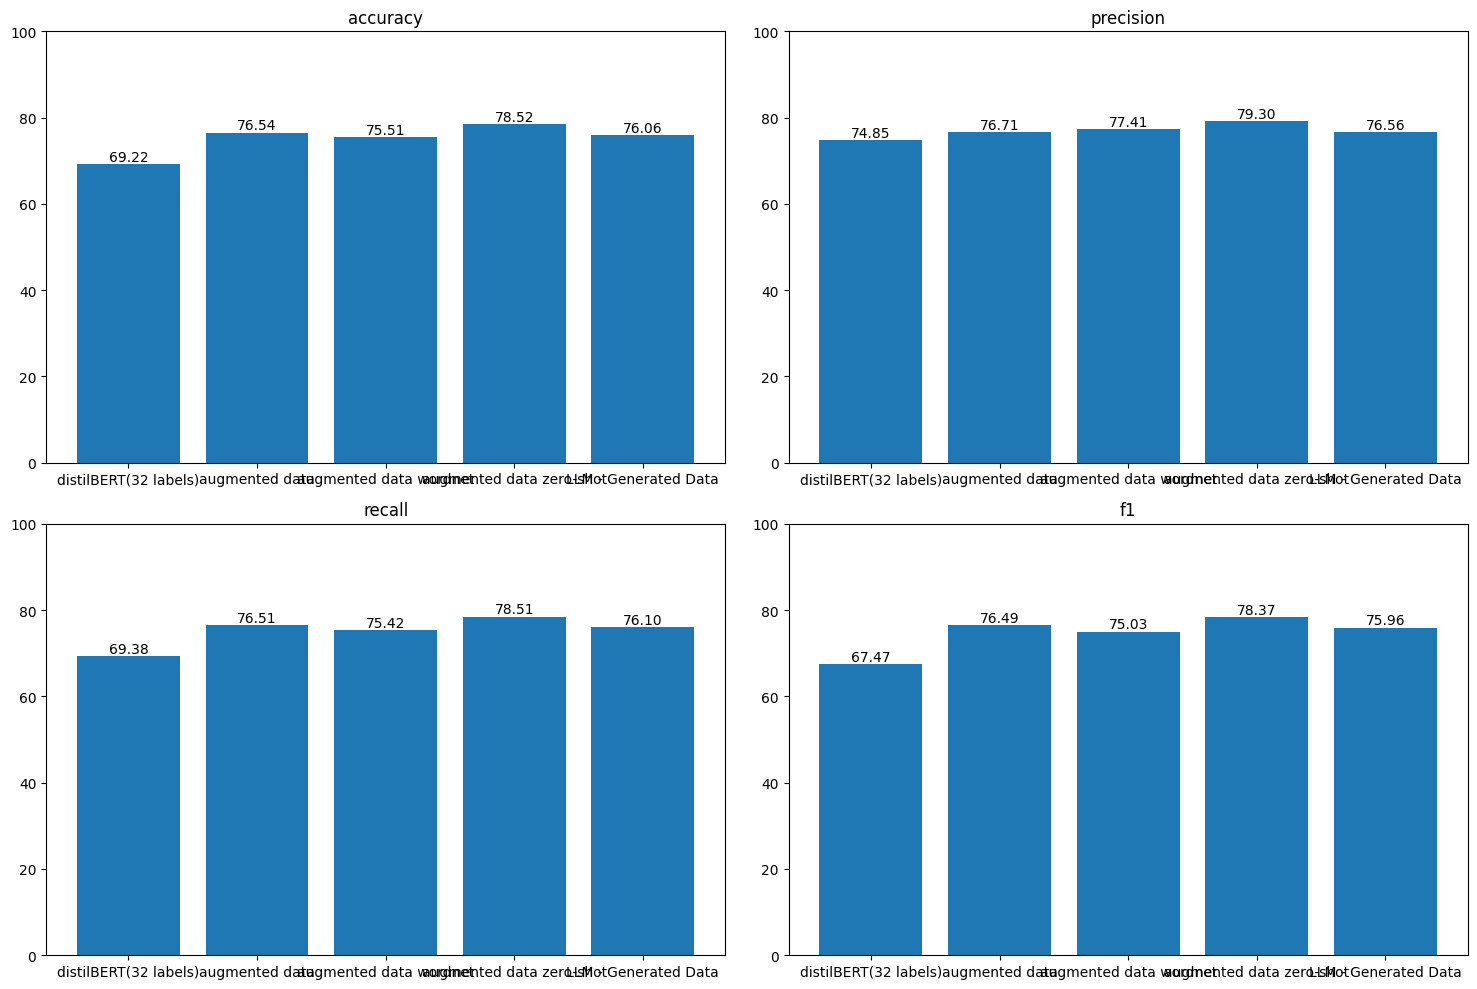

In [131]:
# get the final metrics
metrics_val.run(test_labels, valid_preds, "LLM - Generated Data")
metrics_val.plot()

Comment GPT generated data...
Remember limitations -> might end up in a loop of the same tweets generated over and over again. No negative sarcasm.

In [132]:
# Clear the Keras session
K.clear_session()

In [133]:
#Zero shot with LLM, select few tweets from validation set, sent them to GPT and ask him to label them, then use this labled data to train the model (as we have the labels of the validation set we can also see how well GPT performed)
#Zero shot learning in NN, pre-train model on sample from the validation set, then train on the whole train data
#GPT_tweet in NN, pre-train model on gpt_tweets, then train on the whole train data

# Part III

In [134]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# Define observation shares
observation_shares = [0.01, 0.10, 0.25, 0.50, 0.75, 1.00]

# List to store validation predictions for all models
all_valid_preds = []

# List to store histories for all models
all_histories = []

for share in observation_shares:
    # Calculate the number of observations
    obs_count = int(len(df_train) * share)

    # Set the seed for reproducibility
    np.random.seed(42)

    # Sample from the DataFrame
    df_train_sampled = df_train.sample(n=obs_count)

    # Extract features and labels
    train_data_sampled = df_train_sampled['clean_text']
    train_labels_sampled = df_train_sampled['label']

    # One-hot encode the labels
    enc = OneHotEncoder(handle_unknown='ignore')
    y_train_sampled = enc.fit_transform(np.array(train_labels_sampled).reshape(-1, 1)).toarray()

    # Get validation data
    # validation_data = df_validation['clean_text']
    # validation_labels = df_validation['label']

    # Convert validation labels to one-hot encoding
    y_valid = enc.transform(np.array(validation_labels).reshape(-1, 1)).toarray()

    # Define steps per epoch
    steps_per_epoch = obs_count // batch_size

    # Generate batches for training data
    train_batches = get_batches(train_data_sampled, y_train_sampled, tokenizer, batch_size, max_length)

    # Generate batches for validation data
    valid_batches = get_batches(validation_data, y_valid, tokenizer, batch_size, max_length)

    # Compile the model
    bert_model.compile(
        optimizer=Adam(2e-5),
        metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
        loss=tf.keras.losses.CategoricalCrossentropy()
    )

    # Train the model and record the history
    history = bert_model.fit(
        train_batches,
        epochs=5,
        steps_per_epoch=steps_per_epoch,
        validation_data=valid_batches,
        validation_steps=len(validation_data) // batch_size,
        callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)]
    )

    # Append the history to the list
    all_histories.append(history)

    # Get the inputs tokenized from the validation set
    inputs = tokenizer.batch_encode_plus(list(test_data),
                                         add_special_tokens=True,
                                         max_length=max_length,
                                         padding='max_length',
                                         return_attention_mask=True,
                                         return_token_type_ids=True,
                                         truncation=True)

    # Extract input_ids and attention mask
    inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
                    np.asarray(inputs['attention_mask'], dtype='int32')]

    # Get predictions for the validation set
    valid_preds = bert_model.predict(inputs_valid)
    valid_preds = np.argmax(valid_preds, axis=1)

    # Append predictions to the list
    all_valid_preds.append(valid_preds)
    metrics_val.run(test_labels, valid_preds, f"share_{int(share * 100)}%")

Epoch 1/5


7/7 [==============================] - 69s 6s/step - loss: 0.5459 - recall: 0.7857 - precision: 0.7857 - val_loss: 0.7204 - val_recall: 0.7426 - val_precision: 0.7426
Epoch 2/5
7/7 [==============================] - 33s 5s/step - loss: 0.1308 - recall: 0.9412 - precision: 0.9412 - val_loss: 0.5724 - val_recall: 0.7941 - val_precision: 0.7941
Epoch 3/5
7/7 [==============================] - 34s 6s/step - loss: 0.1439 - recall: 0.9412 - precision: 0.9412 - val_loss: 0.6413 - val_recall: 0.7780 - val_precision: 0.7780
Epoch 4/5
7/7 [==============================] - 33s 5s/step - loss: 0.2201 - recall: 0.9608 - precision: 0.9608 - val_loss: 0.6379 - val_recall: 0.8001 - val_precision: 0.8001
Epoch 5/5
97/97 [==============================] - 42s 400ms/step
Epoch 1/5


74/74 [==============================] - 118s 1s/step - loss: 0.4411 - recall_1: 0.8294 - precision_1: 0.8294 - val_loss: 0.4914 - val_recall_1: 0.7961 - val_precision_1: 0.7961
Epoch 2/5
74/74 [==============================] - 86s 1s/step - loss: 0.3393 - recall_1: 0.8680 - precision_1: 0.8680 - val_loss: 0.5420 - val_recall_1: 0.8075 - val_precision_1: 0.8075
Epoch 3/5
74/74 [==============================] - 86s 1s/step - loss: 0.1880 - recall_1: 0.9323 - precision_1: 0.9323 - val_loss: 0.6183 - val_recall_1: 0.8135 - val_precision_1: 0.8135
Epoch 4/5
74/74 [==============================] - 88s 1s/step - loss: 0.0742 - recall_1: 0.9679 - precision_1: 0.9679 - val_loss: 1.1191 - val_recall_1: 0.8122 - val_precision_1: 0.8122
Epoch 5/5
97/97 [==============================] - 42s 397ms/step
Epoch 1/5


187/187 [==============================] - 210s 954ms/step - loss: 0.4531 - recall_2: 0.8583 - precision_2: 0.8583 - val_loss: 0.5180 - val_recall_2: 0.8035 - val_precision_2: 0.8035
Epoch 2/5
187/187 [==============================] - 174s 932ms/step - loss: 0.2501 - recall_2: 0.9068 - precision_2: 0.9068 - val_loss: 0.4987 - val_recall_2: 0.8263 - val_precision_2: 0.8263
Epoch 3/5
187/187 [==============================] - 173s 924ms/step - loss: 0.1206 - recall_2: 0.9557 - precision_2: 0.9557 - val_loss: 0.6284 - val_recall_2: 0.8203 - val_precision_2: 0.8203
Epoch 4/5
187/187 [==============================] - 171s 912ms/step - loss: 0.0780 - recall_2: 0.9759 - precision_2: 0.9759 - val_loss: 0.8391 - val_recall_2: 0.8223 - val_precision_2: 0.8223
Epoch 5/5
97/97 [==============================] - 54s 521ms/step
Epoch 1/5


374/374 [==============================] - 337s 818ms/step - loss: 0.2945 - recall_3: 0.8991 - precision_3: 0.8991 - val_loss: 0.4435 - val_recall_3: 0.8255 - val_precision_3: 0.8255
Epoch 2/5
374/374 [==============================] - 296s 792ms/step - loss: 0.1487 - recall_3: 0.9465 - precision_3: 0.9465 - val_loss: 0.5504 - val_recall_3: 0.8317 - val_precision_3: 0.8317
Epoch 3/5
374/374 [==============================] - 297s 793ms/step - loss: 0.0677 - recall_3: 0.9776 - precision_3: 0.9776 - val_loss: 1.1351 - val_recall_3: 0.8176 - val_precision_3: 0.8176
Epoch 4/5
374/374 [==============================] - 295s 788ms/step - loss: 0.0620 - recall_3: 0.9813 - precision_3: 0.9813 - val_loss: 0.7789 - val_recall_3: 0.8149 - val_precision_3: 0.8149
Epoch 5/5
97/97 [==============================] - 40s 378ms/step
Epoch 1/5


562/562 [==============================] - 465s 775ms/step - loss: 0.2315 - recall_4: 0.9297 - precision_4: 0.9297 - val_loss: 0.4502 - val_recall_4: 0.8195 - val_precision_4: 0.8195
Epoch 2/5
562/562 [==============================] - 429s 764ms/step - loss: 0.1158 - recall_4: 0.9642 - precision_4: 0.9642 - val_loss: 0.6800 - val_recall_4: 0.8236 - val_precision_4: 0.8236
Epoch 3/5
562/562 [==============================] - 432s 768ms/step - loss: 0.0747 - recall_4: 0.9764 - precision_4: 0.9764 - val_loss: 0.7102 - val_recall_4: 0.8189 - val_precision_4: 0.8189
Epoch 4/5
562/562 [==============================] - 429s 764ms/step - loss: 0.0506 - recall_4: 0.9831 - precision_4: 0.9831 - val_loss: 0.9137 - val_recall_4: 0.8236 - val_precision_4: 0.8236
Epoch 5/5
97/97 [==============================] - 42s 377ms/step
Epoch 1/5


749/749 [==============================] - 620s 787ms/step - loss: 0.1765 - recall_5: 0.9458 - precision_5: 0.9458 - val_loss: 0.4928 - val_recall_5: 0.8269 - val_precision_5: 0.8269
Epoch 2/5
749/749 [==============================] - 597s 796ms/step - loss: 0.0878 - recall_5: 0.9715 - precision_5: 0.9715 - val_loss: 0.6911 - val_recall_5: 0.8350 - val_precision_5: 0.8350
Epoch 3/5
749/749 [==============================] - 594s 793ms/step - loss: 0.0562 - recall_5: 0.9830 - precision_5: 0.9830 - val_loss: 0.7340 - val_recall_5: 0.8276 - val_precision_5: 0.8276
Epoch 4/5
749/749 [==============================] - 586s 782ms/step - loss: 0.0362 - recall_5: 0.9888 - precision_5: 0.9888 - val_loss: 1.0707 - val_recall_5: 0.8404 - val_precision_5: 0.8404
Epoch 5/5
97/97 [==============================] - 39s 374ms/step


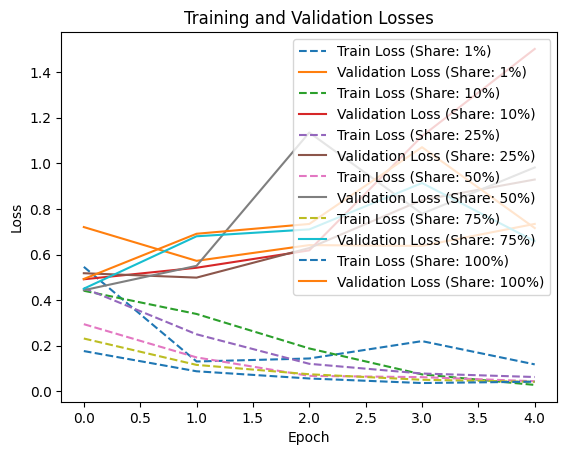

In [135]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot losses for all histories
for i, history in enumerate(all_histories):
    # Extract training and validation losses
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot training and validation losses
    ax.plot(train_loss, label=f'Train Loss (Share: {int(observation_shares[i] * 100)}%)', linestyle='--')
    ax.plot(val_loss, label=f'Validation Loss (Share: {int(observation_shares[i] * 100)}%)')

# Set title and labels
ax.set_title('Training and Validation Losses')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

# Show plot
plt.show()

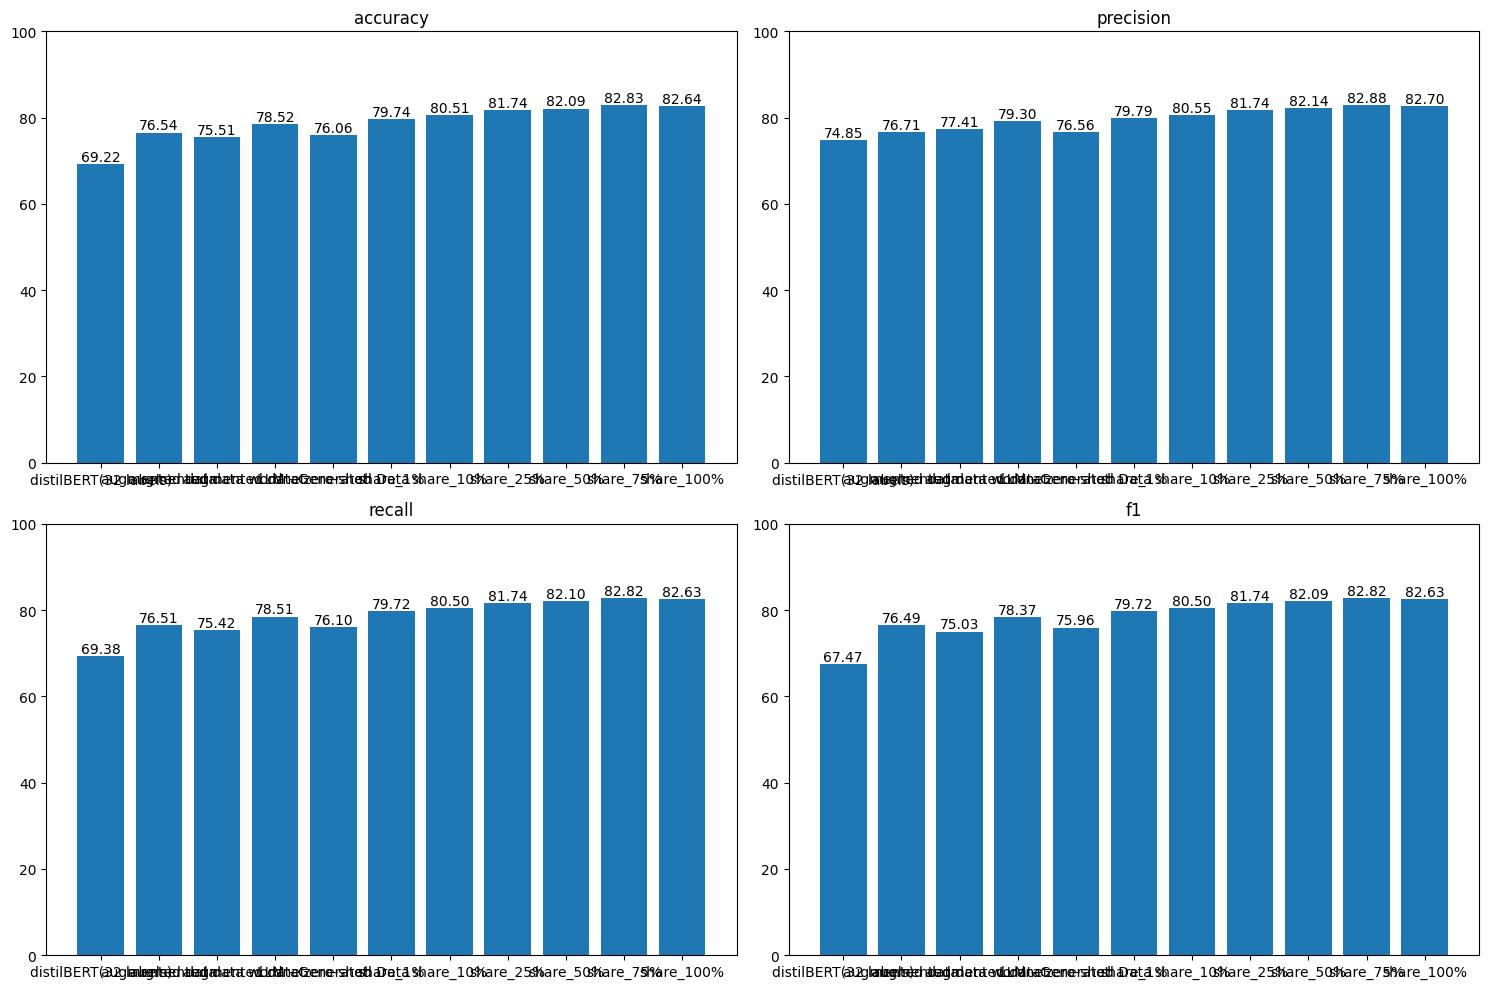

In [136]:
metrics_val.plot()

In [137]:
# Clear the Keras session
K.clear_session()

## Pre-train the (freezed) model with the different techniques explored before

In [138]:
# Apply the different techniques and compare their perfromance
techniques = [[train_data_32,train_labels_32], [augmented_df_data_wn,augmented_df_label_wn], [augmented_zero_df_data, augmented_zero_df_label], [train_data_generated,train_labels_generated]] # 1. 32 label, 2. Synonyms, 3. Zero Shot, 4. LLM Tweets

metrics_techniques = Metrics()

In [139]:
for data, labels in techniques:
    print(type(data))
    print(type(labels))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Model : 1
Fit Freezed layer...
Epoch 1/2
4/4 [==============================] - 15s 170ms/step - loss: 0.0088 - recall: 1.0000 - precision: 1.0000
Epoch 2/2
97/97 [==============================] - 39s 368ms/step
Fit unfreezd layer...
(5999,)
Epoch 1/2


749/749 [==============================] - 569s 721ms/step - loss: 0.0277 - recall_1: 0.9915 - precision_1: 0.9915
Epoch 2/2
97/97 [==============================] - 39s 373ms/step


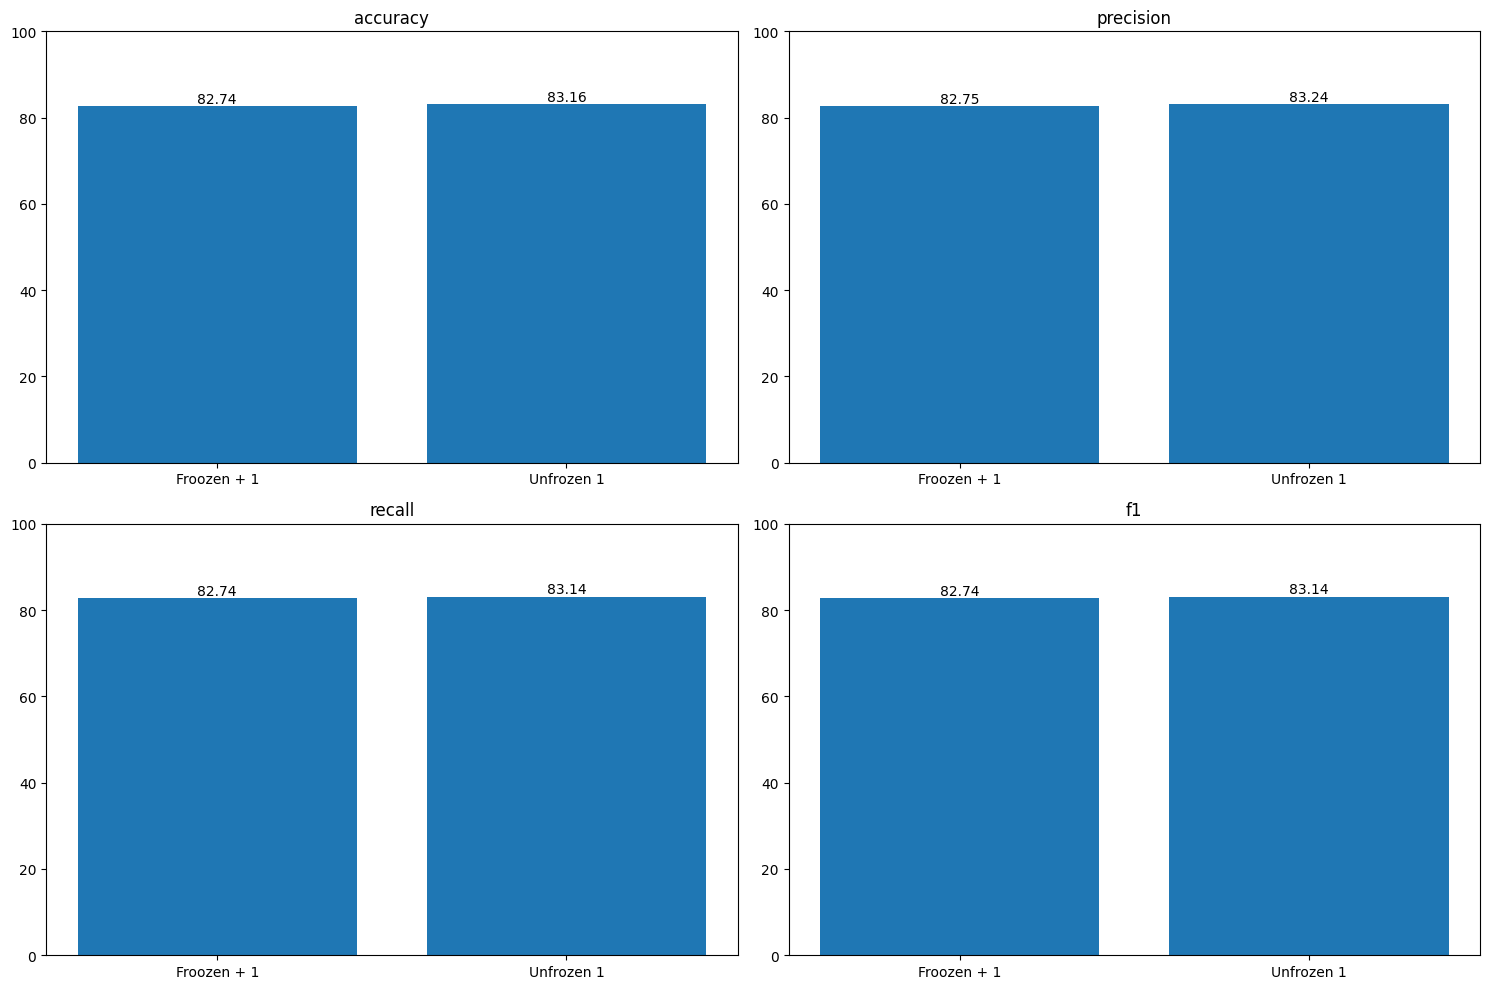

Model : 1
Fit Freezed layer...
Epoch 1/2
10/10 [==============================] - 20s 169ms/step - loss: 0.1064 - recall_2: 0.9750 - precision_2: 0.9750
Epoch 2/2
97/97 [==============================] - 40s 374ms/step
Fit unfreezd layer...
(5999,)
Epoch 1/2


749/749 [==============================] - 567s 718ms/step - loss: 0.0234 - recall_3: 0.9935 - precision_3: 0.9935
Epoch 2/2
97/97 [==============================] - 39s 369ms/step


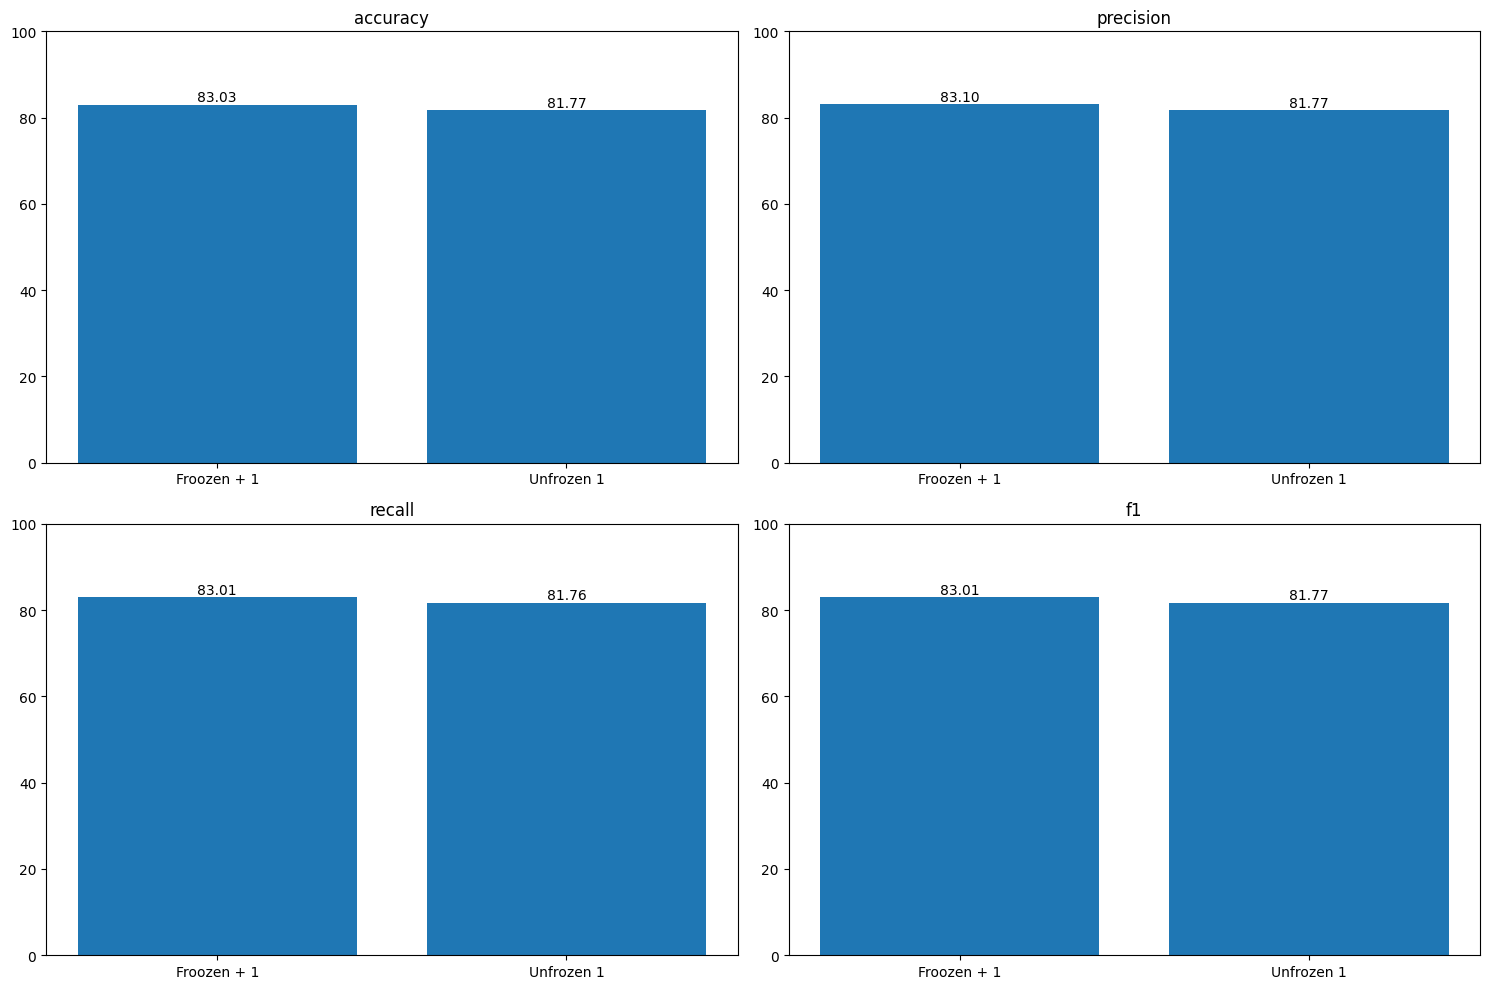

Model : 1
Fit Freezed layer...
Epoch 1/2
41/41 [==============================] - 20s 165ms/step - loss: 1.0526 - recall_4: 0.7927 - precision_4: 0.7927
Epoch 2/2
97/97 [==============================] - 39s 367ms/step
Fit unfreezd layer...
(5999,)
Epoch 1/2


749/749 [==============================] - 574s 727ms/step - loss: 0.0272 - recall_5: 0.9927 - precision_5: 0.9927
Epoch 2/2
97/97 [==============================] - 42s 396ms/step


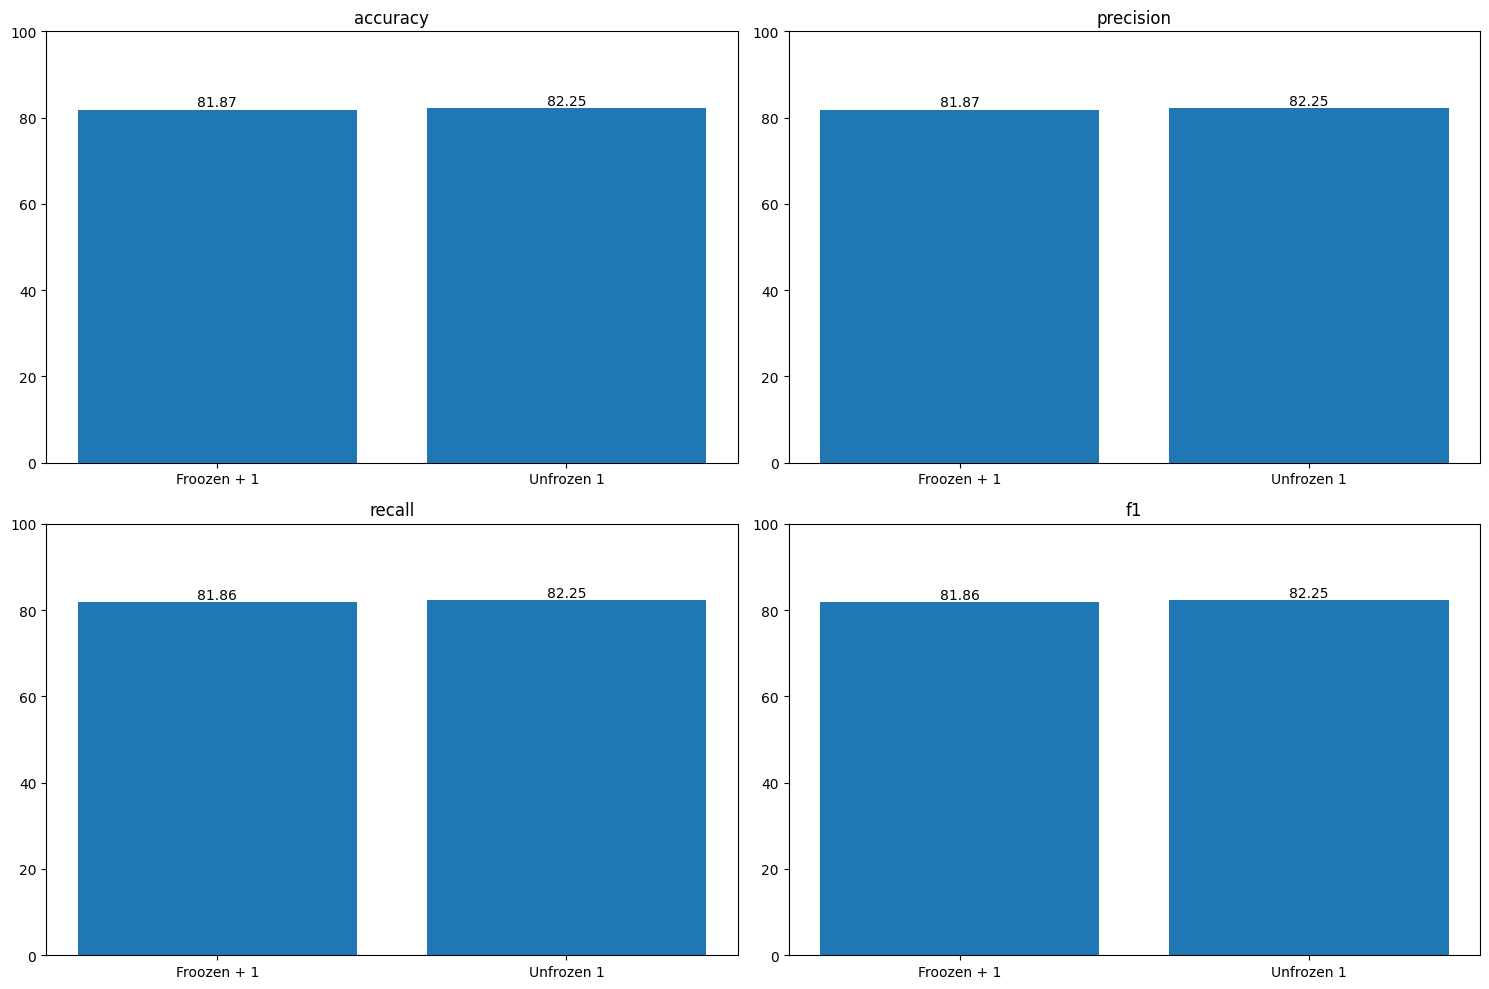

Model : 1
Fit Freezed layer...
Epoch 1/2
141/141 [==============================] - 44s 174ms/step - loss: 0.5002 - recall_6: 0.8661 - precision_6: 0.8661
Epoch 2/2
97/97 [==============================] - 41s 390ms/step
Fit unfreezd layer...
(5999,)
Epoch 1/2


749/749 [==============================] - 568s 719ms/step - loss: 0.0190 - recall_7: 0.9940 - precision_7: 0.9940
Epoch 2/2
97/97 [==============================] - 40s 378ms/step


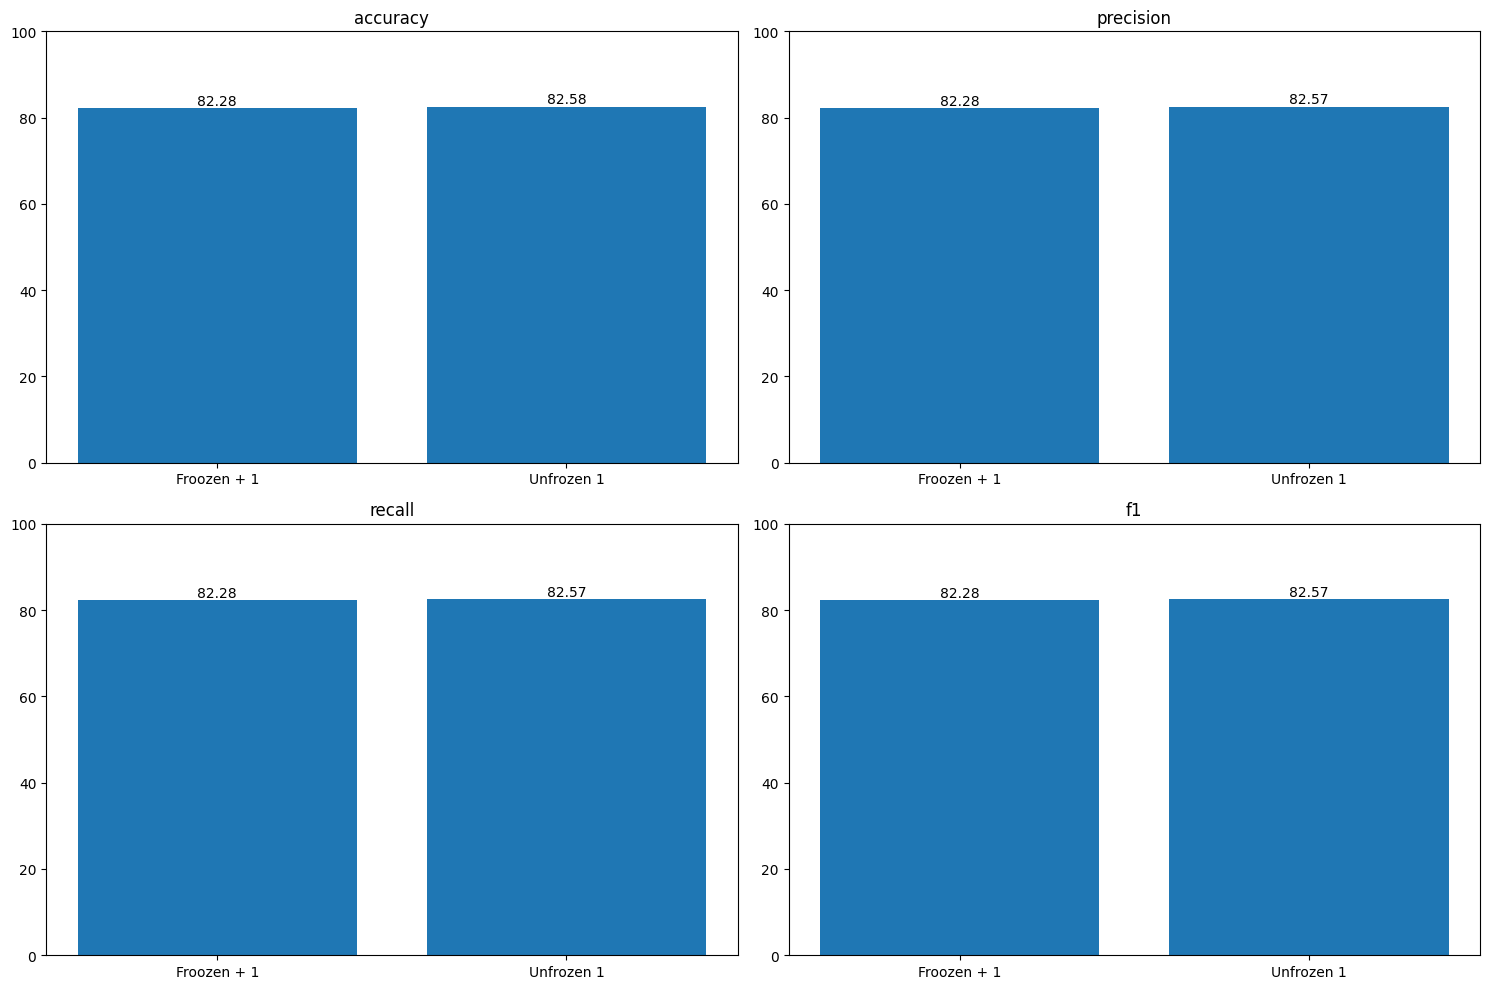

In [140]:
histories = []

for train_tec,y_tec in techniques:
    i = 1
    print("Model :",i)
    bert_model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = output)
    # To freeze BERT parameters (look at the trainable parameters below)
    bert_model.layers[2].trainable = False

    X_train = np.array(train_tec)

    enc = OneHotEncoder(handle_unknown='ignore')
    y_train = enc.fit_transform(np.array(y_tec).reshape(-1, 1)).toarray()

    steps_per_epoch = int(len(X_train)/batch_size)

    batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

    bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                   tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

    print("Fit Freezed layer...")
    bert_model.fit(batches, epochs=2, steps_per_epoch=steps_per_epoch)

    # Test the model
    inputs = tokenizer.batch_encode_plus(list(test_data_clean),
                                        add_special_tokens=True, max_length=max_length,
                                        padding='max_length',  return_attention_mask=True,
                                        return_token_type_ids=True, truncation=True)

    # Extract input_ids and attention mask
    inputs_test = [np.asarray(inputs['input_ids'], dtype='int32'),
                  np.asarray(inputs['attention_mask'], dtype='int32')]

    test_preds = bert_model.predict(inputs_test)
    test_preds = np.argmax(test_preds, axis=1)

    # get the final metrics
    metrics_techniques.run(test_labels, test_preds, f"Froozen + {i}")

    print("Fit unfreezd layer...")
    bert_model.layers[2].trainable = True

    steps_per_epoch = int(len(train_data)/batch_size)
    X_train = np.array(train_data_clean)
    print(X_train.shape)

    enc = OneHotEncoder(handle_unknown='ignore')
    y_train = enc.fit_transform(np.array(train_labels).reshape(-1, 1)).toarray()

    # Train on the whole NN
    batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

    bert_model.compile(optimizer=Adam(2e-5),
                      metrics=[tf.keras.metrics.Recall(),
                      tf.keras.metrics.Precision()],
                      loss=tf.keras.losses.CategoricalCrossentropy())

    bert_model.fit(batches, epochs=2, steps_per_epoch=steps_per_epoch)

    # Get the inputs tokenized from the test set
    inputs = tokenizer.batch_encode_plus(list(test_data_clean),
                                        add_special_tokens=True, max_length=max_length,
                                        padding='max_length',  return_attention_mask=True,
                                        return_token_type_ids=True, truncation=True)

    # Extract input_ids and attention mask
    inputs_test = [np.asarray(inputs['input_ids'], dtype='int32'),
                  np.asarray(inputs['attention_mask'], dtype='int32')]
    test_preds = bert_model.predict(inputs_test)
    test_preds = np.argmax(test_preds, axis=1)

    # get the final metrics
    metrics_techniques.run(test_labels, test_preds, f"Unfrozen {i}")

    metrics_techniques.plot()

---